In [1]:
# Midbootcamp Project - Financial Risk Analyst - Logistic Regression

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from statsmodels.graphics.mosaicplot import mosaic

In [3]:
from collections import Counter

In [4]:
from sklearn.model_selection import train_test_split
from scipy.stats import chi2_contingency
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [5]:
from sklearn.ensemble import RandomForestClassifier

In [6]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import AllKNN
from imblearn.over_sampling import RandomOverSampler

In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [8]:
%matplotlib inline

# Load Data

In [9]:
credit = pd.read_csv('../datasets/creditcardmarketing.csv')

In [10]:
credit

1  No  Air Miles    Letter    High  1.1 No.1  High.1  2  1.2  4  \
0          2  No  Air Miles    Letter  Medium    1   No  Medium  2    2  5   
1          3  No  Air Miles  Postcard    High    2   No  Medium  2    1  2   
2          4  No  Air Miles    Letter  Medium    2   No    High  1    1  4   
3          5  No  Air Miles    Letter  Medium    1   No  Medium  2    1  6   
4          6  No  Air Miles    Letter  Medium    1   No    High  3    1  4   
...      ...  ..        ...       ...     ...  ...  ...     ... ..  ... ..   
17994  17996  No  Cash Back    Letter    High    1   No     Low  1    1  5   
17995  17997  No  Cash Back    Letter    High    1   No     Low  3    1  3   
17996  17998  No  Cash Back    Letter    High    1   No     Low  2    1  4   
17997  17999  No  Cash Back    Letter  Medium    1   No  Medium  4    2  2   
17998  18000  No  Cash Back    Letter     Low    2   No  Medium  2    1  3   

      No.2  1160.75    1669     877    1095    1002  
0      Yes   147.25    39.0   106.0    78.0   366.0  
1      Yes   276.50   367.0   352.0   145.0   242.0  
2       No  1219.00  1578.0  1760.0  1119.0   419.0  
3      Yes  1211.00  2140.0  1357.0   982.0   365.0  
4       No  1114.75  1847.0  1365.0   750.0   497.0  
...    ...      ...     ...     ...     ...     ...  
17994  Yes   167.50   136.0    65.0    71.0   398.0  
17995  Yes   850.50   984.0   940.0   943.0   535.0  
17996   No  1087.25   918.0   767.0  1170.0  1494.0  
17997  Yes  1022.25   626.0   983.0   865.0  1615.0  
17998   No  1056.00   265.0  1378.0  1978.0   603.0  

[17999 rows x 17 columns]

In [9]:
# check target variable

In [11]:
credit.No.value_counts()

No     16976
Yes     1023
Name: No, dtype: int64

## rename columns

In [12]:
columns_mapper = {'1':'customer', 
                  'No':'accept', 
                  'Air Miles':'reward', 
                  'Letter':'m_type', 
                  'High':'income', 
                  '1.1':'accounts', 
                  'No.1':'overdraft',
                  'High.1': 'rating', 
                  '2': 'cards', 
                  '1.2': 'homes', 
                  '4':'family', 
                  'No.2': 'owner', 
                  '1160.75':'q1',
                  '1669':'q2',
                  '877':'q3',
                  '1095':'q4',
                  '1002':'balance'}

In [12]:
# The balance seems to be the average balance for each quarter in the last year

In [13]:
credit = credit.rename(columns=columns_mapper)
credit.head()

customer accept     reward    m_type  income  accounts overdraft  rating  \
0         2     No  Air Miles    Letter  Medium         1        No  Medium   
1         3     No  Air Miles  Postcard    High         2        No  Medium   
2         4     No  Air Miles    Letter  Medium         2        No    High   
3         5     No  Air Miles    Letter  Medium         1        No  Medium   
4         6     No  Air Miles    Letter  Medium         1        No    High   

   cards  homes  family owner       q1      q2      q3      q4  balance  
0      2      2       5   Yes   147.25    39.0   106.0    78.0    366.0  
1      2      1       2   Yes   276.50   367.0   352.0   145.0    242.0  
2      1      1       4    No  1219.00  1578.0  1760.0  1119.0    419.0  
3      2      1       6   Yes  1211.00  2140.0  1357.0   982.0    365.0  
4      3      1       4    No  1114.75  1847.0  1365.0   750.0    497.0

In [14]:
# Save customer column

In [14]:
customer = credit.customer

In [15]:
credit = credit.iloc[:,1:]

In [16]:
credit.head()

accept     reward    m_type  income  accounts overdraft  rating  cards  \
0     No  Air Miles    Letter  Medium         1        No  Medium      2   
1     No  Air Miles  Postcard    High         2        No  Medium      2   
2     No  Air Miles    Letter  Medium         2        No    High      1   
3     No  Air Miles    Letter  Medium         1        No  Medium      2   
4     No  Air Miles    Letter  Medium         1        No    High      3   

   homes  family owner       q1      q2      q3      q4  balance  
0      2       5   Yes   147.25    39.0   106.0    78.0    366.0  
1      1       2   Yes   276.50   367.0   352.0   145.0    242.0  
2      1       4    No  1219.00  1578.0  1760.0  1119.0    419.0  
3      1       6   Yes  1211.00  2140.0  1357.0   982.0    365.0  
4      1       4    No  1114.75  1847.0  1365.0   750.0    497.0

## Drop duplicates

In [20]:
credit.drop_duplicates()

accept     reward    m_type  income  accounts overdraft  rating  cards  \
0         No  Air Miles    Letter  Medium         1        No  Medium      2   
1         No  Air Miles  Postcard    High         2        No  Medium      2   
2         No  Air Miles    Letter  Medium         2        No    High      1   
3         No  Air Miles    Letter  Medium         1        No  Medium      2   
4         No  Air Miles    Letter  Medium         1        No    High      3   
...      ...        ...       ...     ...       ...       ...     ...    ...   
17994     No  Cash Back    Letter    High         1        No     Low      1   
17995     No  Cash Back    Letter    High         1        No     Low      3   
17996     No  Cash Back    Letter    High         1        No     Low      2   
17997     No  Cash Back    Letter  Medium         1        No  Medium      4   
17998     No  Cash Back    Letter     Low         2        No  Medium      2   

       homes  family owner       q1      q2      q3      q4  balance  
0          2       5   Yes   147.25    39.0   106.0    78.0    366.0  
1          1       2   Yes   276.50   367.0   352.0   145.0    242.0  
2          1       4    No  1219.00  1578.0  1760.0  1119.0    419.0  
3          1       6   Yes  1211.00  2140.0  1357.0   982.0    365.0  
4          1       4    No  1114.75  1847.0  1365.0   750.0    497.0  
...      ...     ...   ...      ...     ...     ...     ...      ...  
17994      1       5   Yes   167.50   136.0    65.0    71.0    398.0  
17995      1       3   Yes   850.50   984.0   940.0   943.0    535.0  
17996      1       4    No  1087.25   918.0   767.0  1170.0   1494.0  
17997      2       2   Yes  1022.25   626.0   983.0   865.0   1615.0  
17998      1       3    No  1056.00   265.0  1378.0  1978.0    603.0  

[17999 rows x 16 columns]

# EDA

In [18]:
# check data types

In [21]:
credit.dtypes

accept        object
reward        object
m_type        object
income        object
accounts       int64
overdraft     object
rating        object
cards          int64
homes          int64
family         int64
owner         object
q1           float64
q2           float64
q3           float64
q4           float64
balance      float64
dtype: object

In [20]:
# Appart from the balance columns all the other features could be considered categorical: nominal or ordinals

## General info

In [18]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17999 entries, 0 to 17998
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   accept     17999 non-null  object 
 1   reward     17999 non-null  object 
 2   m_type     17999 non-null  object 
 3   income     17999 non-null  object 
 4   accounts   17999 non-null  int64  
 5   overdraft  17999 non-null  object 
 6   rating     17999 non-null  object 
 7   cards      17999 non-null  int64  
 8   homes      17999 non-null  int64  
 9   family     17999 non-null  int64  
 10  owner      17999 non-null  object 
 11  q1         17975 non-null  float64
 12  q2         17975 non-null  float64
 13  q3         17975 non-null  float64
 14  q4         17975 non-null  float64
 15  balance    17975 non-null  float64
dtypes: float64(5), int64(4), object(7)
memory usage: 2.2+ MB


In [19]:
credit.describe()

accounts         cards         homes        family            q1  \
count  17999.000000  17999.000000  17999.000000  17999.000000  17975.000000   
mean       1.255792      1.903495      1.203456      3.499028    940.503310   
std        0.472510      0.797031      0.427350      1.114207    350.303729   
min        1.000000      1.000000      1.000000      1.000000     48.250000   
25%        1.000000      1.000000      1.000000      3.000000    787.500000   
50%        1.000000      2.000000      1.000000      3.000000   1007.000000   
75%        1.000000      2.000000      1.000000      4.000000   1153.125000   
max        3.000000      4.000000      3.000000      9.000000   3366.250000   

                 q2            q3            q4       balance  
count  17975.000000  17975.000000  17975.000000  17975.000000  
mean     910.408456    999.398999   1042.030654    810.175132  
std      620.068494    457.414081    553.467854    559.015084  
min        0.000000      0.000000      0.000000      0.000000  
25%      392.500000    663.000000    633.000000    363.000000  
50%      772.000000   1032.000000    945.000000    703.000000  
75%     1521.000000   1342.000000   1463.000000   1212.000000  
max     3450.000000   3421.000000   3823.000000   4215.000000

In [22]:
credit.describe(include=['object'])

accept     reward    m_type  income overdraft rating  owner
count   17999      17999     17999   17999     17999  17999  17999
unique      2          3         2       3         2      3      2
top        No  Air Miles  Postcard  Medium        No   High    Yes
freq    16976       6060      9147    9013     15321   6070  11655

In [23]:
credit.isna().sum()

accept        0
reward        0
m_type        0
income        0
accounts      0
overdraft     0
rating        0
cards         0
homes         0
family        0
owner         0
q1           24
q2           24
q3           24
q4           24
balance      24
dtype: int64

## Explore single variables

In [24]:
for c in credit.columns:
    print(credit[c].nunique(), c)

2 accept
3 reward
2 m_type
3 income
3 accounts
2 overdraft
3 rating
4 cards
3 homes
8 family
2 owner
4728 q1
2158 q2
1945 q3
2281 q4
2184 balance


In [25]:
credit.family.value_counts()

3    5712
4    5542
5    2853
2    2813
1     539
6     538
8       1
9       1
Name: family, dtype: int64

In [27]:
#%writefile my_functions.py

#a = 100

#from my_functions import continuous_discrete

## Discrete variables

In [26]:
def continuous_discrete(df,n=10):
    """divides a data frame into continuous and discrete variables
    based on n, the number of classes."""
    cont = []
    disc = []
    for c in df.columns:
        if df[c].nunique() >= n:
            cont.append(c)
        else:
            disc.append(c)
    
    continuous_df = df[cont]
    discret_df = df[disc]
    
    return continuous_df, discret_df

In [31]:
conti, disc = continuous_discrete(credit,10)

In [27]:
def plotDiscrete(df):
    """Countplots for a dataframe of discrete variables"""
    for c in df.columns:
        ax = sns.countplot(x=c,data=df)
        plt.title(c)
        plt.xlabel(None)
        plt.tick_params(axis='x', labelrotation=55)
        # annotate
        ax.bar_label(ax.containers[0], label_type='edge')

        # pad the spacing between the number and the edge of the figure
        ax.margins(y=0.1)
        
        plt.show()

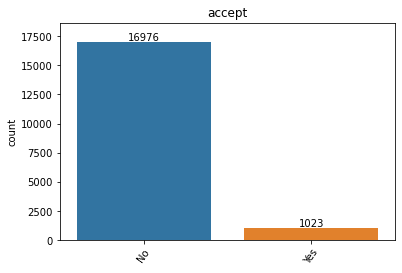

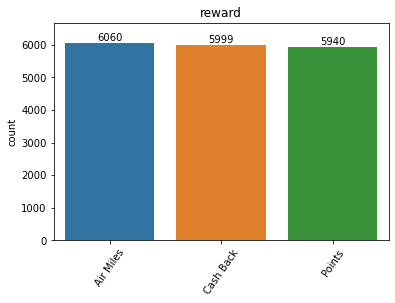

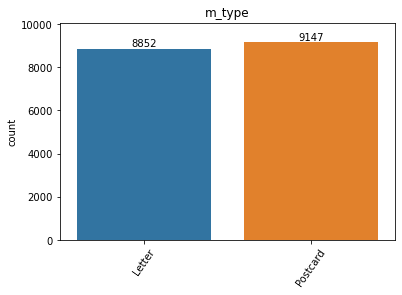

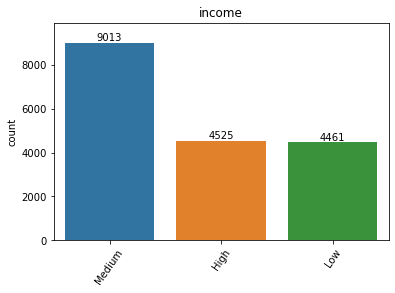

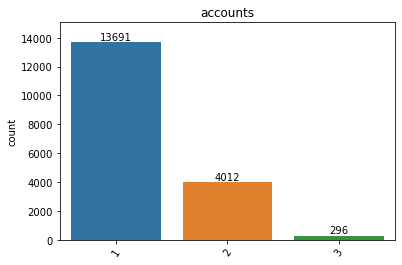

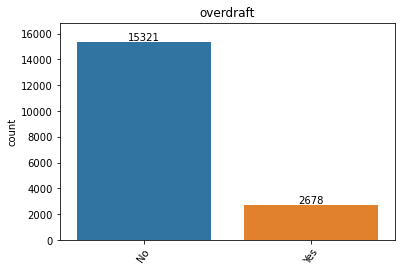

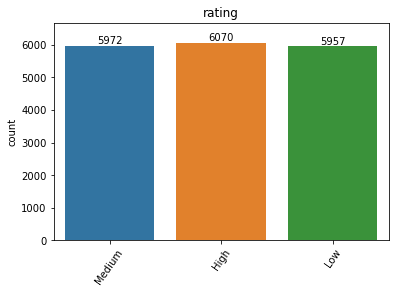

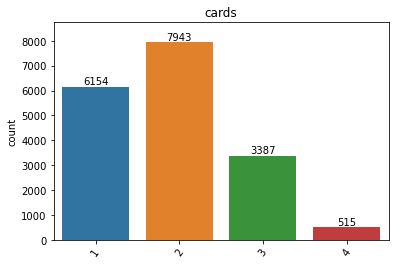

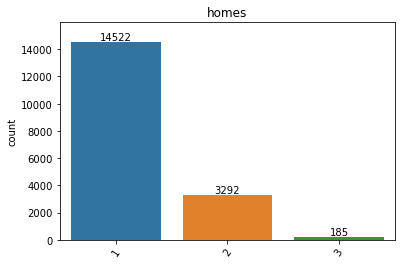

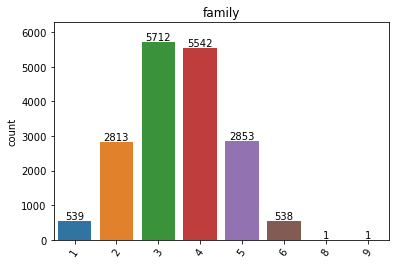

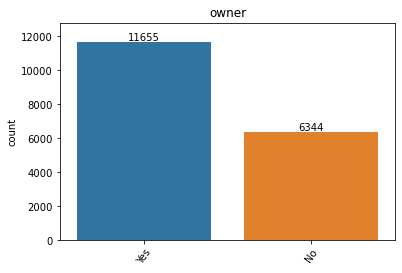

In [32]:
plotDiscrete(disc)

In [29]:
ordinals = ['family', 'homes', 'cards', 'rating', 'accounts', 'income']

In [33]:
nominals = []
for f in disc.columns:
    if f not in ordinals:
        nominals += [f]
nominals

['accept', 'reward', 'm_type', 'overdraft', 'owner']

## Continuous variables

### Histograms

In [34]:
def plotContinuous(df):
    """Histplots for a dataframe of continuous variables"""
    for c in df.columns:
        sns.histplot(x=c,data=df, kde=True)
        plt.title(c)
        plt.xlabel(None)
        plt.tick_params(axis='x', labelrotation=55)
        plt.show()

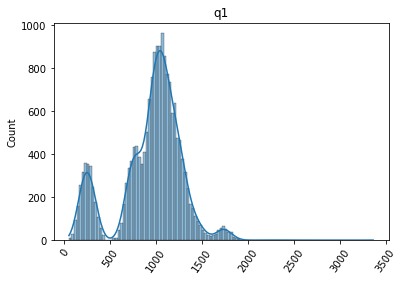

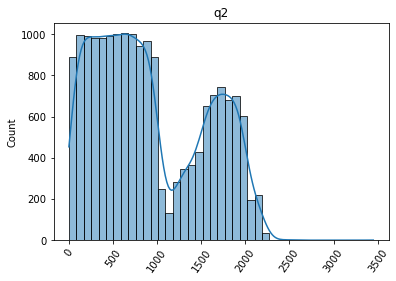

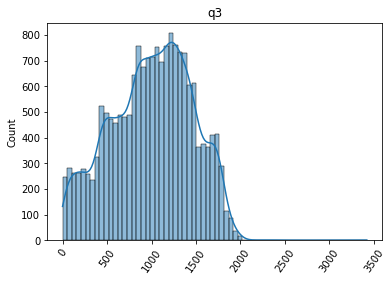

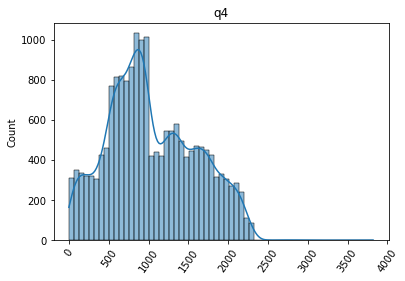

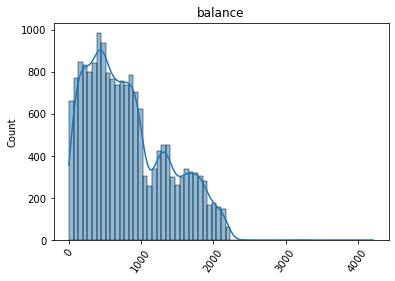

In [35]:
plotContinuous(conti)

In [36]:
conti.skew()

q1        -0.572253
q2         0.411053
q3        -0.183032
q4         0.289637
balance    0.641226
dtype: float64

__There is no relevant skewness__

In [37]:
conti.std()

q1         350.303729
q2         620.068494
q3         457.414081
q4         553.467854
balance    559.015084
dtype: float64

In [38]:
conti.mean()

q1          940.503310
q2          910.408456
q3          999.398999
q4         1042.030654
balance     810.175132
dtype: float64

### Outliers

In [39]:
def plotOutliers(df):
    """Boxplots for a dataframe of continuous variables"""
    for c in df.columns:
        sns.set_theme(style="whitegrid")
        ax = sns.boxplot(x=c, data=df, orient='h')
        plt.title(c)
        plt.xlabel(None)
        #plt.tick_params(axis='x', labelrotation=55)
        plt.show()

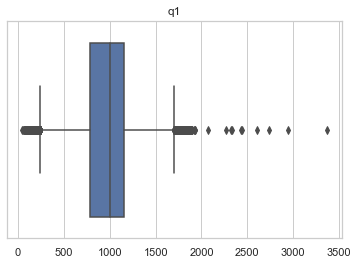

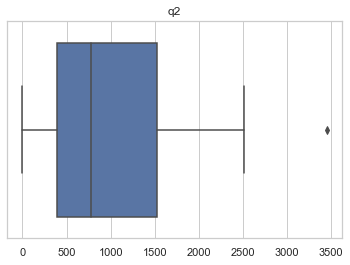

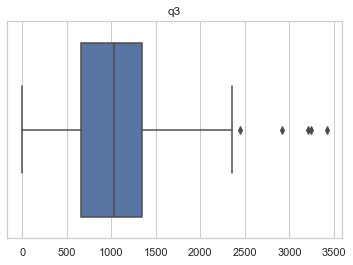

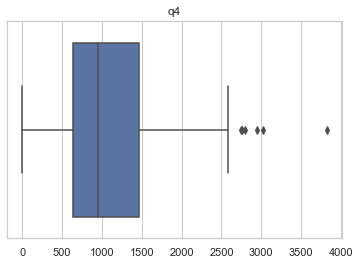

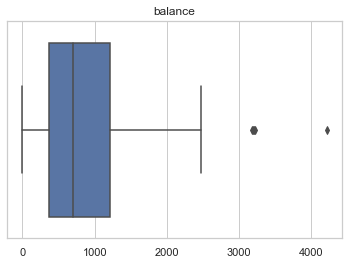

In [40]:
plotOutliers(conti)

There are some outliers.

### Correlations

In [40]:
def corrPlots(df):
    """ Plots correlation matrix, heatmap and pairplot"""
    display(df.corr())
    sns.heatmap(round(df.corr(),3), vmin = -1, vmax = 1, cmap = 'RdBu', annot=True)
    plt.show()
    sns.pairplot(df)
    plt.show()

q1        q2        q3        q4   balance
q1       1.000000  0.481490  0.800305  0.752746  0.572376
q2       0.481490  1.000000  0.483173 -0.060970 -0.237317
q3       0.800305  0.483173  1.000000  0.487712  0.168961
q4       0.752746 -0.060970  0.487712  1.000000  0.565298
balance  0.572376 -0.237317  0.168961  0.565298  1.000000

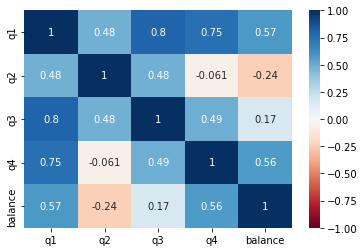

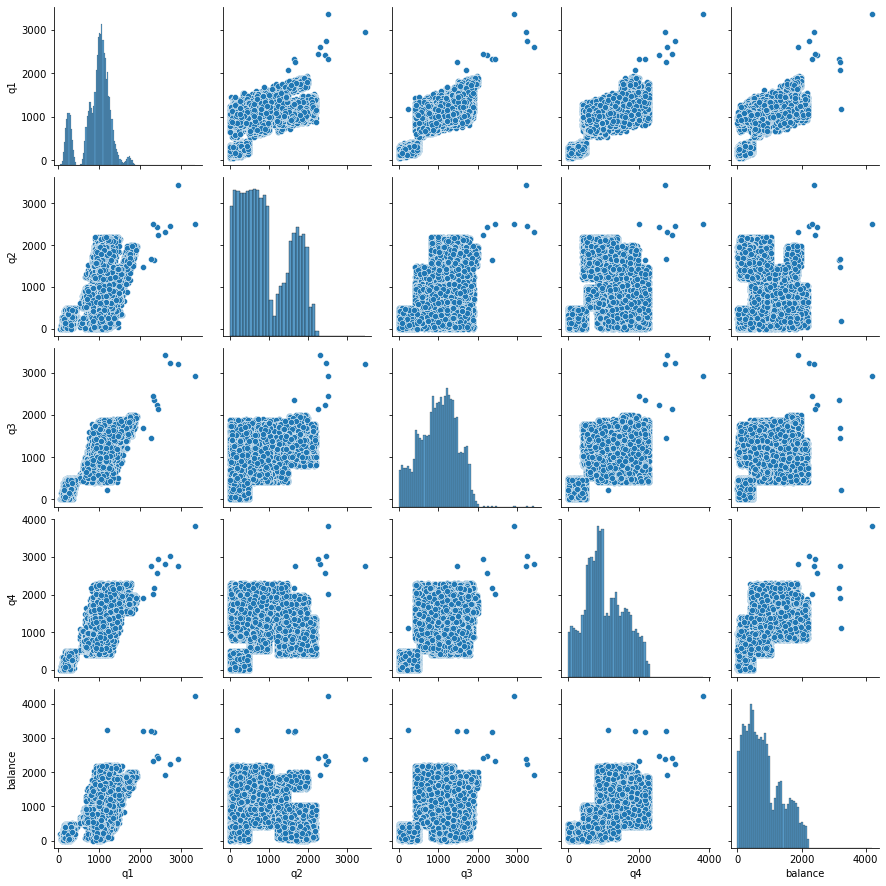

In [41]:
corrPlots(conti)

__There is multicollinearity!__  
q3 coulb be dropped

## Explore variables in pairs

### Compute class imbalance in accept

In [42]:
# Count acceptance
count_accept = disc.accept.value_counts()
count_accept

No     16976
Yes     1023
Name: accept, dtype: int64

In [43]:
# Percentage of acceptance
100*(count_accept/len(disc))

No     94.316351
Yes     5.683649
Name: accept, dtype: float64

In [44]:
print("The class imbalance ratio is: {:.2f}".format((count_accept[0]-count_accept[1])/(count_accept[0]+count_accept[1])))



The class imbalance ratio is: 0.89


### Filter accepted customers

In [45]:
disc_accepted = disc[disc.accept == 'Yes']

In [46]:
disc_rejected = disc[disc.accept == 'No']

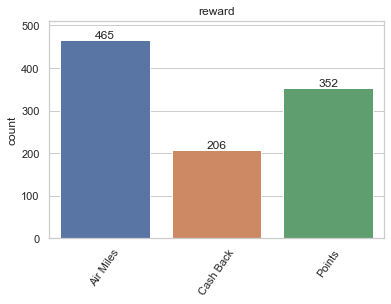

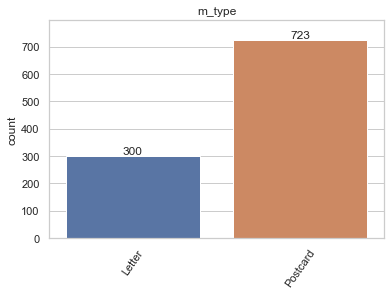

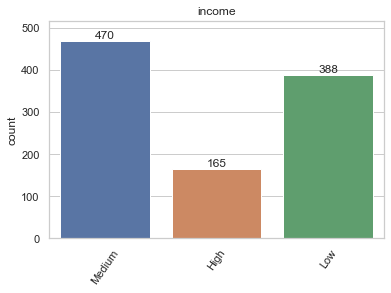

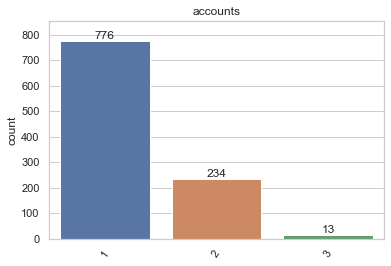

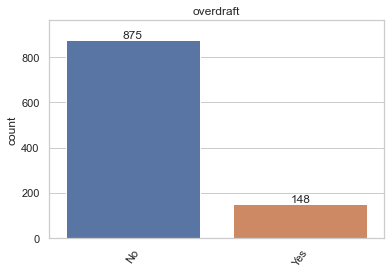

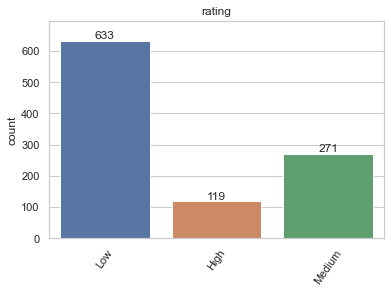

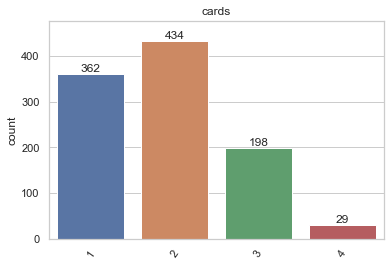

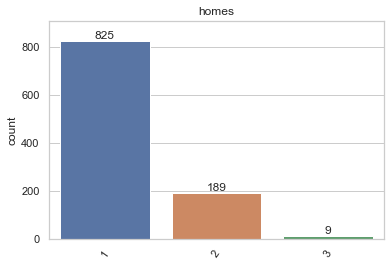

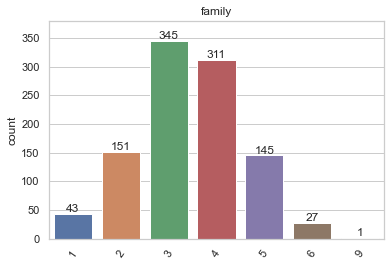

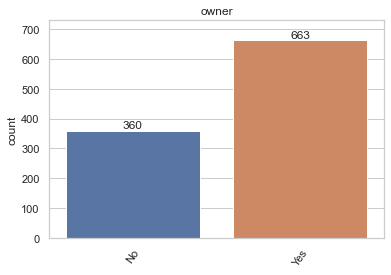

In [49]:
plotDiscrete(disc_accepted.iloc[:,1:])

### Plot discrete features against accepted.

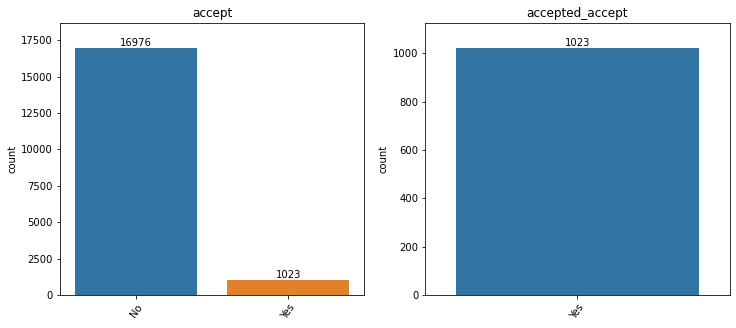

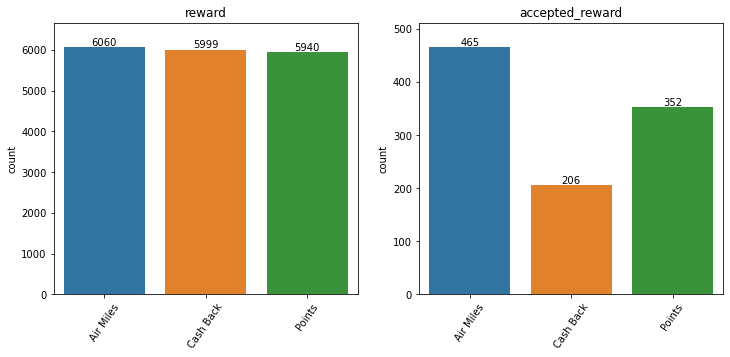

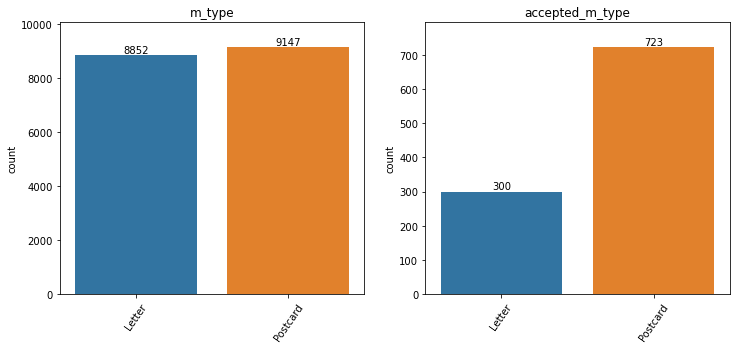

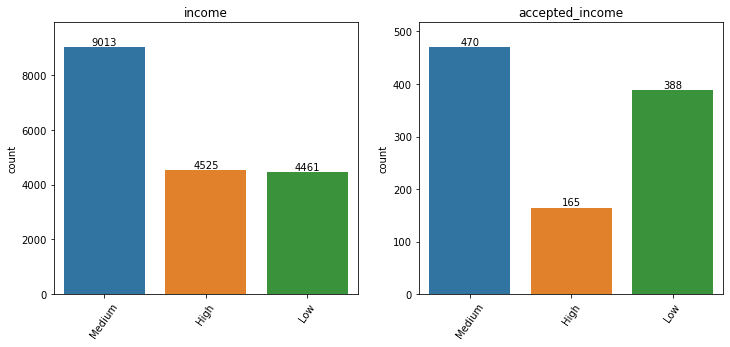

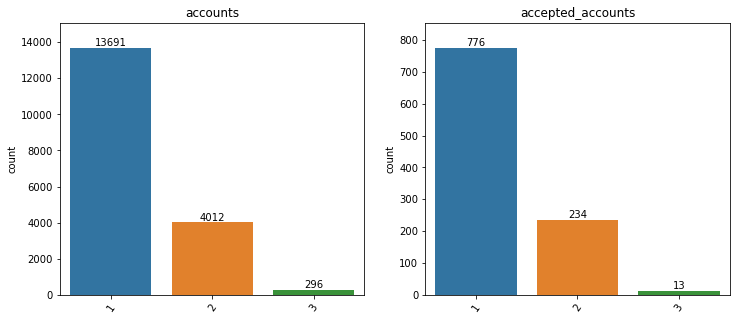

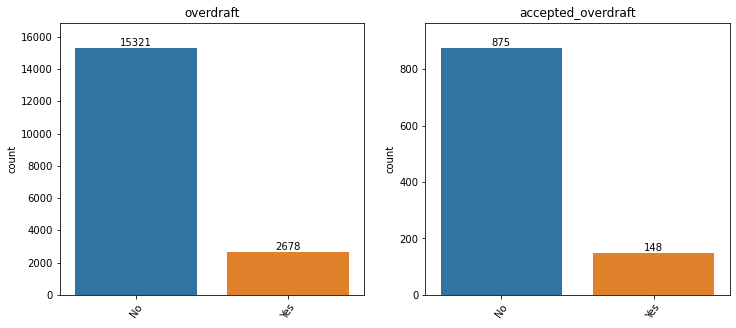

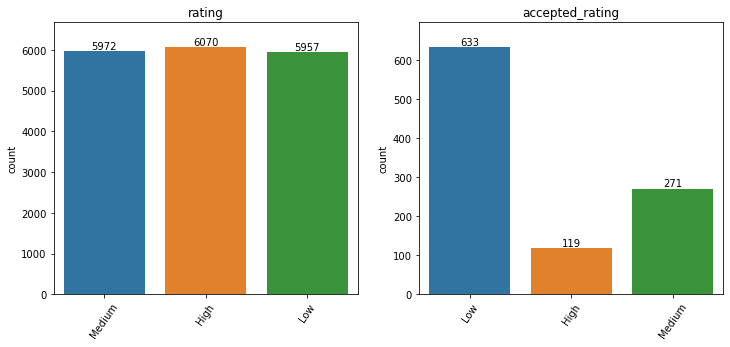

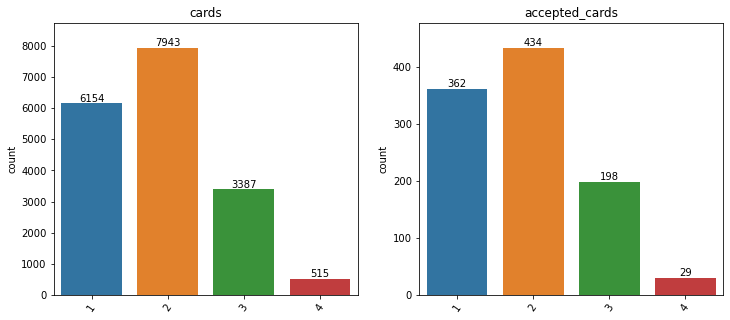

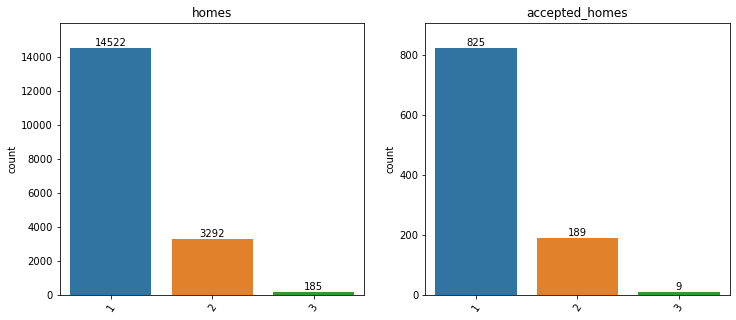

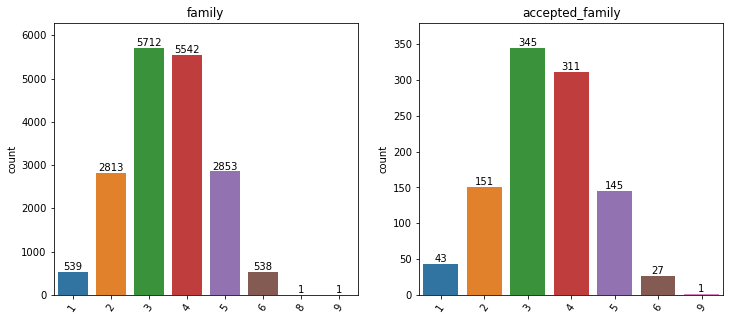

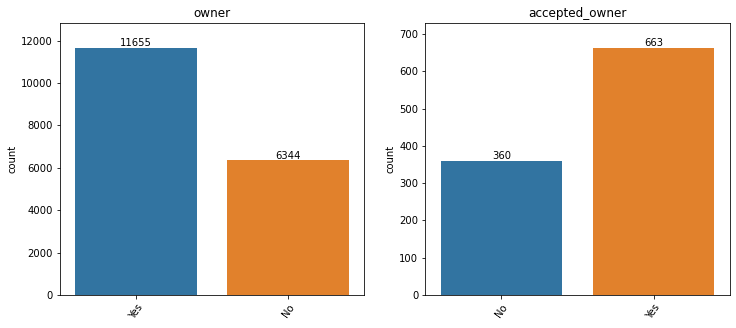

In [47]:

for i,c in enumerate(disc.columns):
    f, ax = plt.subplots(1,2, figsize=(12,5))
    #sns.countplot(x=c,data=disc_rejected,ax=ax[0])
    sns.countplot(x=c,data=disc, ax=ax[0])
    sns.countplot(x=c,data=disc_accepted,ax=ax[1])
    
    # plt.title(c)
    #ax[0].set_title('rejected_%s' %(c))
    #ax[0].set_xlabel(None)
    #ax[0].tick_params(axis='x', labelrotation=55)
    
    ax[0].set_title(c)
    ax[0].set_xlabel(None)
    ax[0].tick_params(axis='x', labelrotation=55)
    
    ax[1].set_title('accepted_%s' %(c))
    ax[1].set_xlabel(None)
    ax[1].tick_params(axis='x', labelrotation=55)
    
        # annotate
    #ax[0].bar_label(ax[0].containers[0], label_type='edge')
    ax[0].bar_label(ax[0].containers[0], label_type='edge')
    ax[1].bar_label(ax[1].containers[0], label_type='edge')

        # pad the spacing between the number and the edge of the figure
    #ax[0].margins(y=0.1)
    ax[0].margins(y=0.1)
    ax[1].margins(y=0.1)
    
    
    plt.show()
        


There is a significant preference to Air Miles and Postcards.  
Also low (and medium) income and (low and medium) rating accept easier.  
  
In the other hand, the variables which maintain a similar relationship will be good to predict the results. For instance: overdraft and owner.   
  
What does the class imbalance has to do here?

In [51]:
# function compare discrete distributions

In [48]:
def plotCompareDiscrete(disc, sub_disc):
    """Compare the distributions of classes of two dataframes with the same discrete variables"""
    
    for i,c in enumerate(disc.columns):
        f, ax = plt.subplots(1,2, figsize=(12,5))
        sns.countplot(x=c,data=disc, ax=ax[0])
        sns.countplot(x=c,data=sub_disc,ax=ax[1])


        ax[0].set_title('original_%s' %(c))
        ax[0].set_xlabel(None)
        ax[0].tick_params(axis='x', labelrotation=55)

        ax[1].set_title('compared_%s' %(c))
        ax[1].set_xlabel(None)
        ax[1].tick_params(axis='x', labelrotation=55)

            # annotate
        ax[0].bar_label(ax[0].containers[0], label_type='edge')
        ax[1].bar_label(ax[1].containers[0], label_type='edge')

            # pad the spacing between the number and the edge of the figure
        ax[0].margins(y=0.1)
        ax[1].margins(y=0.1)


        plt.show()


### Violin plot continuous

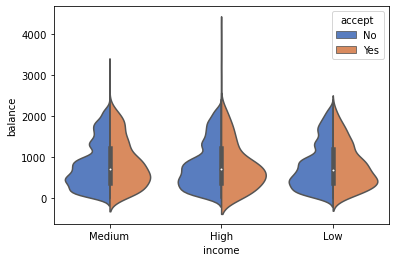

In [49]:
sns.violinplot(y='balance', x= 'income', hue='accept', data = credit, scale = "area", split=True, palette='muted', aplha =.2);
# plt.show()
# It does not work

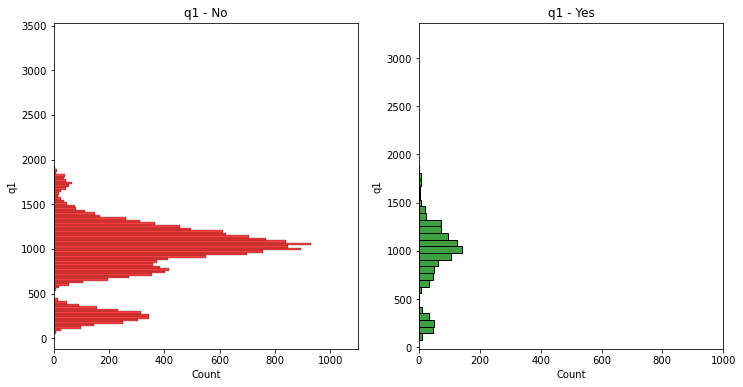

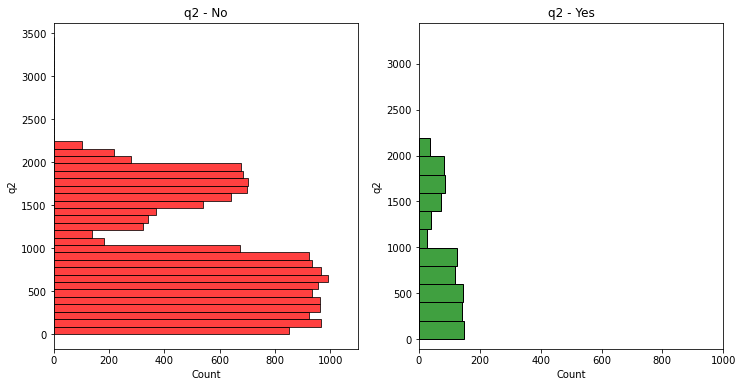

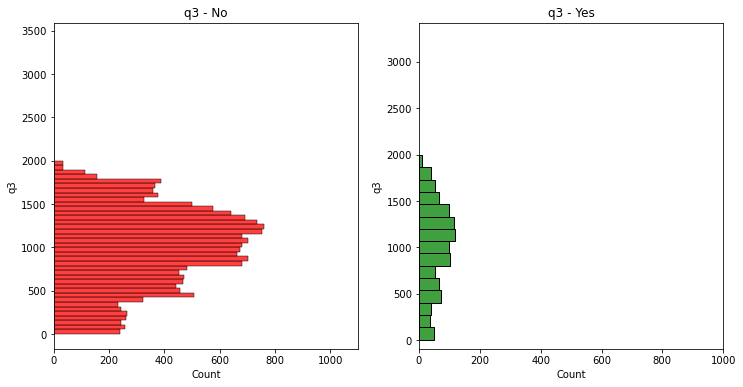

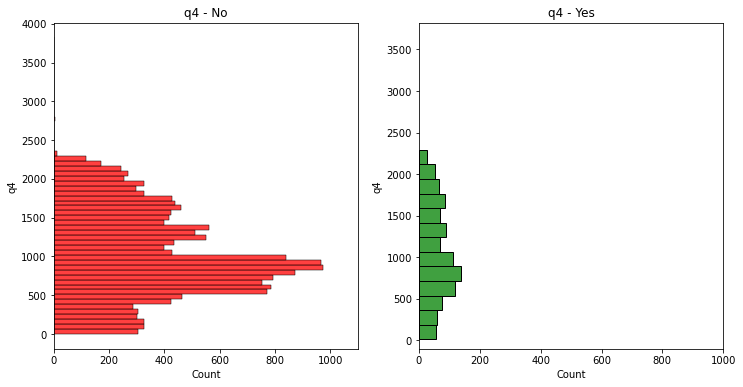

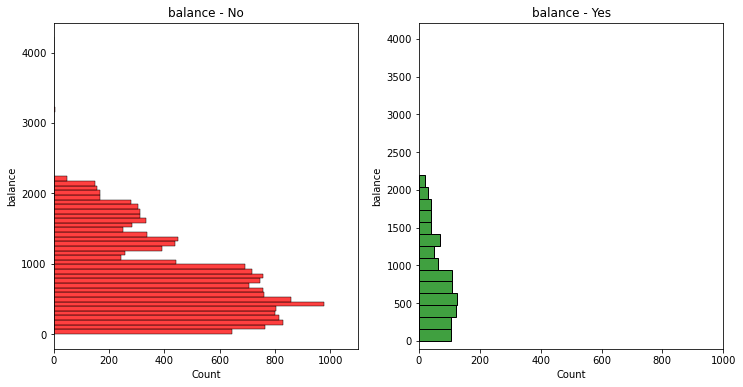

In [50]:
for f in conti.columns:
    fig, ax = plt.subplots(1,2, figsize=(12,6))
    sns.histplot(y=credit[f][credit.accept == 'No'], ax=ax[0], color ='r')
    sns.histplot(y=credit[f][credit.accept == 'Yes'], ax=ax[1], color='g')
    ax[0].set_title('%s - No'%(f))
    ax[0].set_xlim(0,1100)
    ax[1].set_ylim(ymax=max(credit[f][credit.accept == 'No']))
    ax[1].set_title('%s - Yes'%(f))
    ax[1].set_xlim(0,1000)
    plt.show()

# Project Questions

## Arrange the data in a decreasing order  
by the `average_balance` of the house. Return only the `customer_number` of the top 10 customers with the highest `average_balances` in your data.


In [408]:
customer[list(credit.sort_values('balance', ascending=False).head(10).index)]

2295      2297
12632    12634
8776      8778
15607    15609
2654      2656
10474    10476
14002    14004
12634    12636
15258    15260
8886      8888
Name: customer, dtype: int64

## What is the average balance  
of all the customers in your data?

In [409]:
credit.balance.mean()

810.1751321279555

## What is the average balance of the customers grouped by `Income Level`?  
The returned result should have only two columns, income level and `Average balance` of the customers. Use an alias to change the name of the second column.


In [416]:
pd.DataFrame(credit.groupby('income')['balance'].agg('mean').sort_values(ascending=False), columns=['balance'])\
.reset_index()
             

income     balance
0    High  814.704515
1  Medium  814.138080
2     Low  797.573962

## What is the average balance of the customers grouped by `number_of_bank_accounts_open`?  
The returned result should have only two columns, `number_of_bank_accounts_open` and `Average balance` of the customers. Use an alias to change the name of the second column.


In [417]:
pd.DataFrame(credit.groupby('accounts')['balance'].agg('mean').sort_values(ascending=False), columns=['balance'])\
.reset_index()

accounts     balance
0         2  815.614175
1         1  809.438090
2         3  770.457627

## What is the average number of credit cards held by customers for each of the credit card ratings? 
The returned result should have only two columns, rating and average number of credit cards held. Use an alias to change the name of the second column.


In [421]:
pd.DataFrame(credit.groupby('rating')['cards'].agg('mean').sort_values(ascending=False), columns=['cards'])\
.reset_index()

rating     cards
0  Medium  1.911133
1     Low  1.904001
2    High  1.895266

## Is there any correlation between the columns `credit_cards_held` and `number_of_bank_accounts_open`?  
You can analyse this by grouping the data by one of the variables and then aggregating the results of the other column. Visually check if there is a positive correlation or negative correlation or no correlation between the variables.


In [428]:
credit.groupby('accounts')['cards'].agg('mean')

accounts
1    1.904922
2    1.895932
3    1.935593
Name: cards, dtype: float64

accounts     cards
accounts  1.000000 -0.001629
cards    -0.001629  1.000000

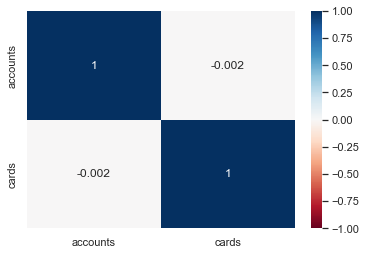

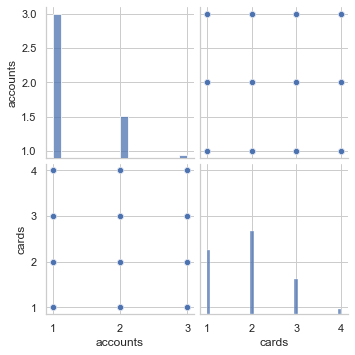

In [430]:
corrPlots(credit[['accounts','cards']])

## check the number of customers in each category

In [ ]:
# to assess if that category is well represented in the dataset to include it in your analysis.
# If the category is under-represented as compared to other categories, ignore that category in this analysis

In [432]:
credit.groupby('cards')['cards'].agg('count').sort_values(ascending=False)

cards
2    7932
1    6147
3    3381
4     515
Name: cards, dtype: int64

In [433]:
credit.cards.value_counts()

2    7932
1    6147
3    3381
4     515
Name: cards, dtype: int64

### Credit rating medium or high

In [448]:
pd.DataFrame(credit.groupby('rating')['cards'].agg('count').filter(['Medium','High']).sort_values(ascending=False), 
             columns=['cards']).reset_index()

rating  cards
0    High   6063
1  Medium   5964

### Credit cards held 2 or less

In [458]:
pd.DataFrame(credit.cards.value_counts()[[2,1]]).reset_index().rename(columns={'index':'cards','cards':'n'})

cards     n
0      2  7932
1      1  6147

### Owns their own home

In [460]:
credit.owner.value_counts()['Yes']

11636

### Family size 3 or more

In [465]:
credit.family.value_counts().filter(regex=r'[3-9]')

3    5705
4    5531
5    2851
6     538
8       1
9       1
Name: family, dtype: int64

### Target customers

In [471]:
target_customers = credit[(credit.rating != 'Low') & (credit.cards <= 2) & (credit.owner == 'Yes') & (credit.family >= 3)]


In [472]:
target_customers

accept     reward    m_type  income  accounts overdraft  rating  cards  \
0         No  Air Miles    Letter  Medium         1        No  Medium      2   
3         No  Air Miles    Letter  Medium         1        No  Medium      2   
15        No     Points  Postcard     Low         2        No  Medium      1   
16        No  Air Miles  Postcard     Low         2        No    High      2   
18        No  Cash Back    Letter  Medium         1        No    High      2   
...      ...        ...       ...     ...       ...       ...     ...    ...   
17982     No  Cash Back    Letter  Medium         1        No    High      1   
17984     No     Points  Postcard  Medium         1        No  Medium      1   
17985     No     Points    Letter    High         1        No    High      2   
17986     No     Points    Letter    High         1        No  Medium      1   
17989     No  Air Miles    Letter  Medium         1        No    High      1   

       homes  family owner       q1      q2      q3      q4  balance  
0          2       5   Yes   147.25    39.0   106.0    78.0    366.0  
3          1       6   Yes  1211.00  2140.0  1357.0   982.0    365.0  
15         1       4   Yes  1217.00   567.0  1161.0   966.0   2174.0  
16         1       4   Yes  1185.25   272.0  1523.0  2042.0    904.0  
18         1       5   Yes  1086.75   764.0   997.0   921.0   1665.0  
...      ...     ...   ...      ...     ...     ...     ...      ...  
17982      1       4   Yes   262.75   468.0   163.0   380.0     40.0  
17984      1       5   Yes  1022.75  1391.0  1660.0   647.0    393.0  
17985      1       3   Yes   943.25  1583.0  1001.0   818.0    371.0  
17986      1       5   Yes   943.00  1845.0  1015.0   684.0    228.0  
17989      1       3   Yes   335.75   447.0   378.0   274.0    244.0  

[4949 rows x 16 columns]

In [477]:
target_customers_yes = target_customers[target_customers.accept == 'Yes']
target_customers_yes

accept     reward    m_type  income  accounts overdraft  rating  cards  \
111      Yes  Air Miles    Letter    High         1       Yes    High      2   
130      Yes  Air Miles  Postcard    High         2        No  Medium      2   
249      Yes  Air Miles    Letter    High         1        No  Medium      1   
476      Yes  Air Miles  Postcard  Medium         2        No    High      2   
604      Yes  Air Miles    Letter    High         2       Yes  Medium      1   
...      ...        ...       ...     ...       ...       ...     ...    ...   
17840    Yes  Air Miles  Postcard     Low         1        No    High      2   
17902    Yes     Points  Postcard     Low         2        No  Medium      1   
17930    Yes     Points    Letter  Medium         1        No    High      2   
17941    Yes  Air Miles  Postcard     Low         1        No  Medium      1   
17970    Yes  Cash Back  Postcard     Low         1        No    High      2   

       homes  family owner       q1      q2      q3      q4  balance  
111        1       5   Yes  1082.50  1890.0  1405.0   996.0     39.0  
130        2       3   Yes   811.50   820.0   958.0   564.0    904.0  
249        1       5   Yes  1047.75   438.0   762.0  1014.0   1977.0  
476        1       3   Yes  1054.75  1364.0  1360.0   446.0   1049.0  
604        1       4   Yes   175.75   389.0    16.0    94.0    204.0  
...      ...     ...   ...      ...     ...     ...     ...      ...  
17840      1       3   Yes   881.25   878.0   871.0   808.0    968.0  
17902      1       4   Yes  1038.00   275.0   510.0  1493.0   1874.0  
17930      1       5   Yes  1539.00  1423.0  1864.0  1527.0   1342.0  
17941      1       3   Yes  1026.25   297.0  1672.0  1569.0    567.0  
17970      2       4   Yes  1221.75  2118.0  1632.0  1029.0    108.0  

[167 rows x 16 columns]

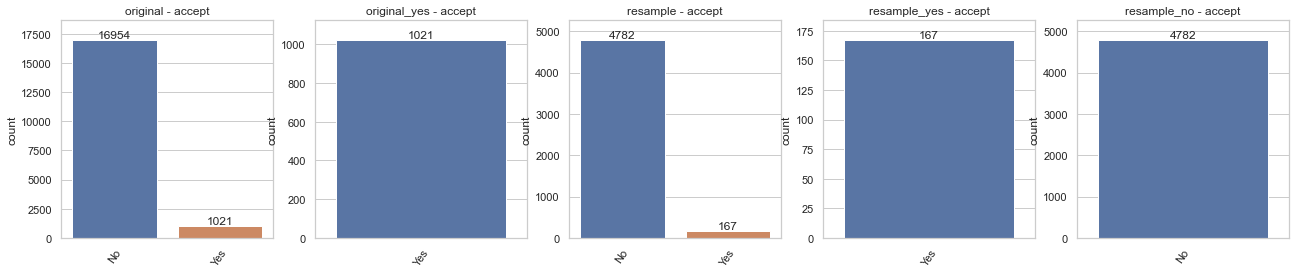

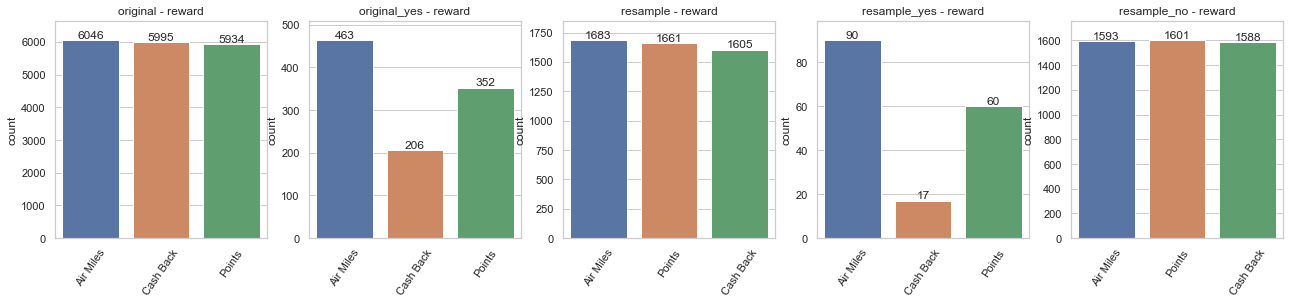

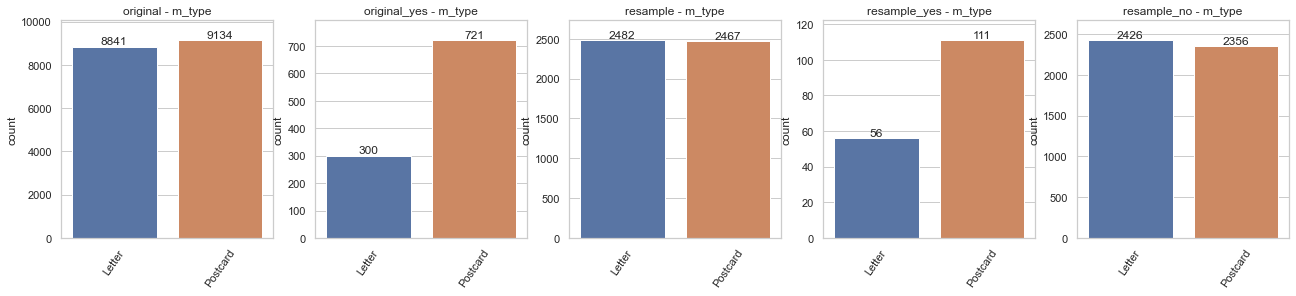

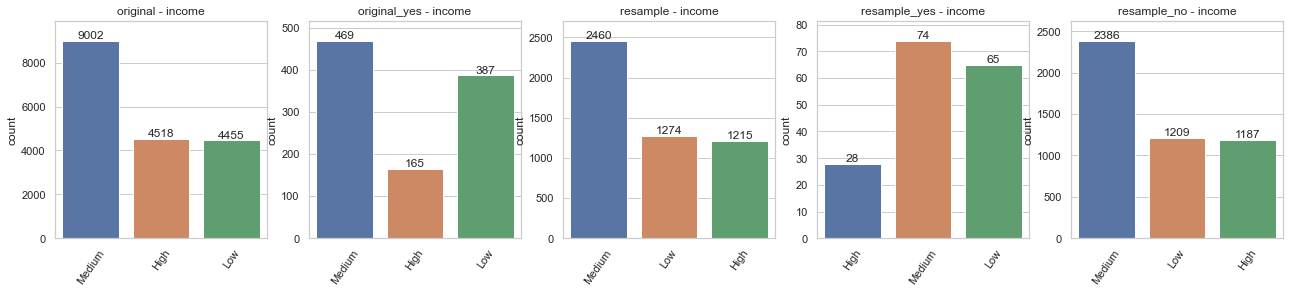

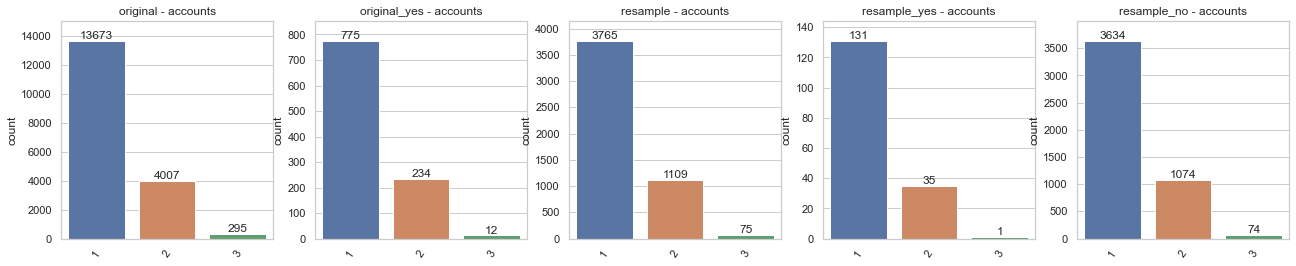

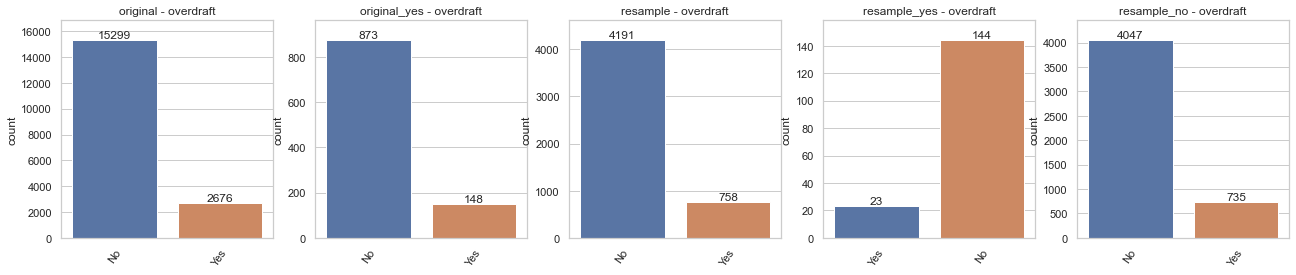

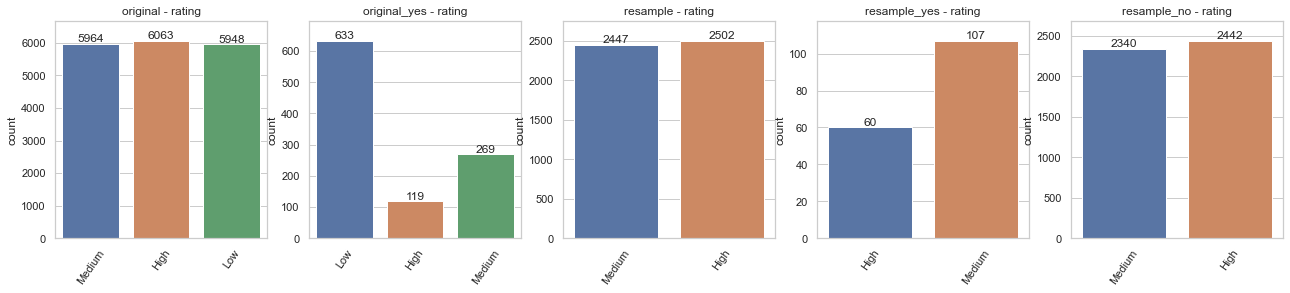

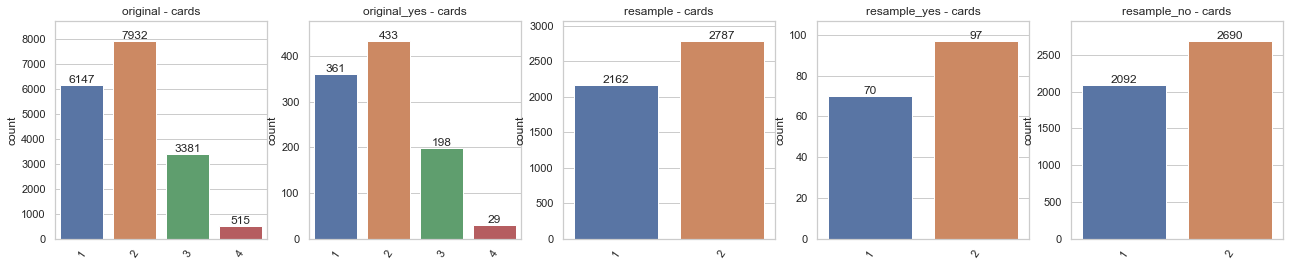

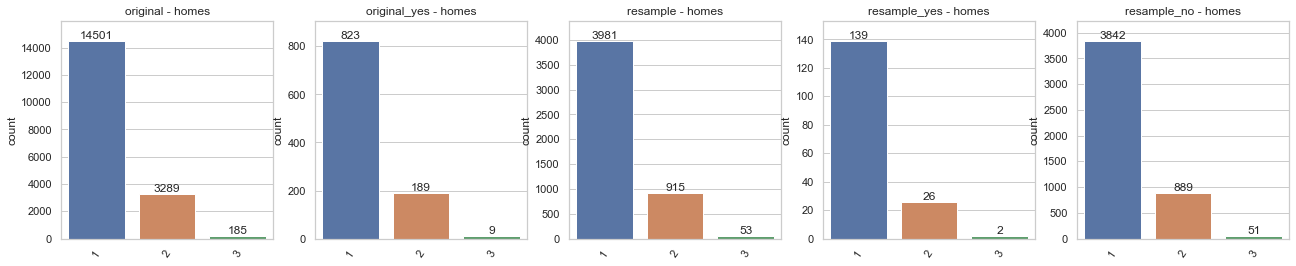

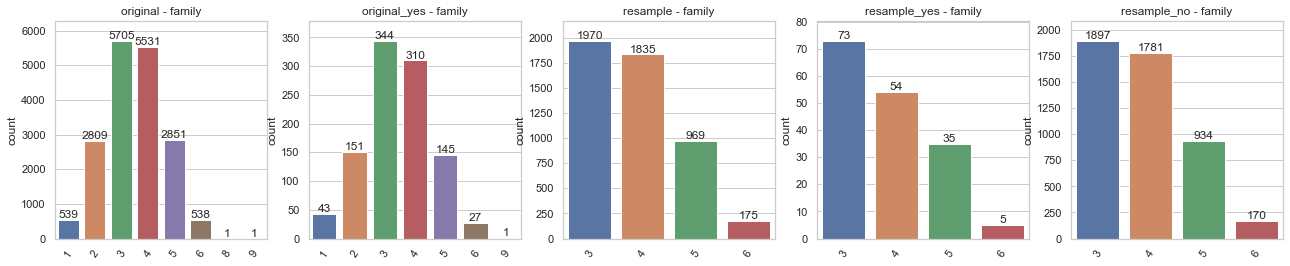

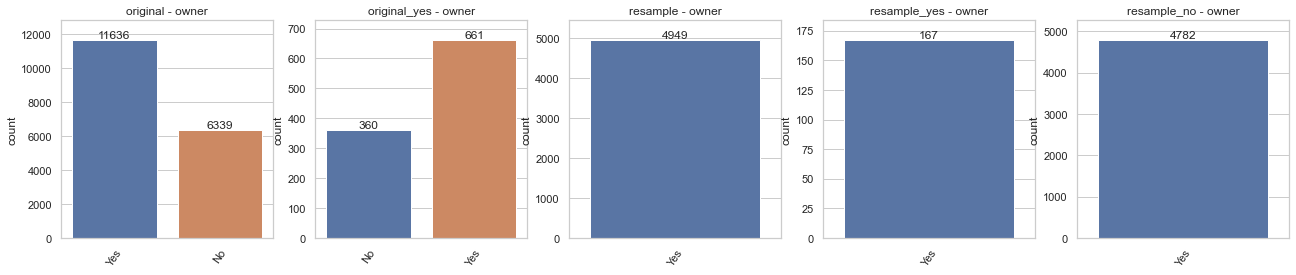

In [479]:
plotCompareResample(disc, target_customers.drop(columns=['q1','q2','q3','q4','balance']), 'accept', pos_label = 'Yes')

## list of customers whose average balance  
is less than the average balance of all the customers in the database. Write a query to show them the list of such customers.


In [486]:
customer[list(credit[credit.balance < credit.balance.mean()].index)]

0            2
1            3
2            4
3            5
4            6
         ...  
17990    17992
17992    17994
17994    17996
17995    17997
17998    18000
Name: customer, Length: 10259, dtype: int64

## What is the number of people who accepted the offer vs number of people who did not?

In [487]:
credit.accept.value_counts()

No     16954
Yes     1021
Name: accept, dtype: int64

## What is the difference in average balances  
of the customers with high credit card rating and low credit card rating?

In [489]:
credit.groupby('rating')['balance'].agg('mean').filter(['High','Low'])

rating
High    804.802078
Low     798.144418
Name: balance, dtype: float64

## which all types of communication  
(`mailer_type`) were used and with how many customers?

In [490]:
credit.m_type.value_counts()

Postcard    9134
Letter      8841
Name: m_type, dtype: int64

## Provide the details of the customer  
that is the 11th least `Q1_balance` in your database.

In [504]:
credit.loc[credit.q1.sort_values().index[10]]

accept              No
reward       Cash Back
m_type        Postcard
income             Low
accounts             1
overdraft           No
rating          Medium
cards                1
homes                1
family               3
owner              Yes
q1                79.5
q2                 1.0
q3                38.0
q4                83.0
balance          196.0
Name: 4170, dtype: object

# Data Cleaning

## Ordinals mappers

In [51]:
ordinals

['family', 'homes', 'cards', 'rating', 'accounts', 'income']

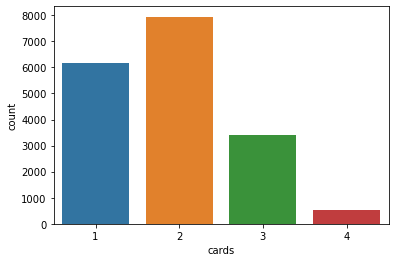

In [52]:
sns.countplot(x = disc.cards)
plt.show()

In [53]:
credit.rating.value_counts()

High      6070
Medium    5972
Low       5957
Name: rating, dtype: int64

In [54]:
family_mapper = {1:1,2:2,3:3,4:4,5:5,6:5,8:5,9:5}

In [55]:
homes_mapper = {1:1,2:2,3:2}

In [56]:
cards_mapper = {1:1,2:2,3:3,4:3}

In [57]:
rating_mapper = {'Low':1,'Medium':2,'High':3}

In [58]:
account_mapper = {1:1,2:2,3:2}

In [59]:
income_mapper = {'Low':1,'Medium':2,'High':3}

In [60]:
mappers = {}
mappers['family'] = family_mapper
mappers['homes'] = homes_mapper
mappers['cards'] = cards_mapper
mappers['rating'] = rating_mapper
mappers['accounts'] = account_mapper
mappers['income'] = income_mapper

## Treat NaN

In [61]:
100*credit.isna().sum()/len(credit)

accept       0.000000
reward       0.000000
m_type       0.000000
income       0.000000
accounts     0.000000
overdraft    0.000000
rating       0.000000
cards        0.000000
homes        0.000000
family       0.000000
owner        0.000000
q1           0.133341
q2           0.133341
q3           0.133341
q4           0.133341
balance      0.133341
dtype: float64

In [62]:
credit[credit.balance.isna()]

accept     reward    m_type  income  accounts overdraft  rating  cards  \
322       No     Points  Postcard  Medium         1        No    High      1   
3069     Yes  Air Miles  Postcard     Low         3        No  Medium      2   
3107      No  Air Miles    Letter     Low         1        No    High      3   
3788      No  Air Miles    Letter  Medium         2        No    High      3   
5082      No     Points    Letter  Medium         1        No    High      1   
5676      No  Air Miles  Postcard     Low         1        No     Low      2   
5688      No  Air Miles  Postcard  Medium         1        No  Medium      3   
6931      No  Air Miles  Postcard  Medium         1        No  Medium      2   
7786      No  Air Miles    Letter     Low         2        No     Low      1   
7863      No  Cash Back  Postcard    High         2       Yes     Low      2   
8150      No  Cash Back    Letter     Low         2        No  Medium      2   
8633      No  Air Miles  Postcard    High         1        No    High      2   
10038     No  Cash Back  Postcard  Medium         1        No     Low      2   
10859     No     Points    Letter  Medium         1       Yes     Low      1   
12478     No     Points    Letter  Medium         1        No  Medium      3   
12558     No  Air Miles    Letter    High         1        No     Low      2   
12944     No     Points    Letter    High         1        No     Low      2   
13312    Yes  Air Miles  Postcard  Medium         1        No  Medium      1   
13469     No  Air Miles  Postcard  Medium         1        No  Medium      2   
14665     No  Air Miles  Postcard    High         1        No  Medium      3   
14697     No     Points  Postcard    High         1        No     Low      3   
15706     No  Cash Back    Letter    High         2        No    High      1   
15932     No  Air Miles  Postcard     Low         1        No    High      2   
17103     No  Air Miles    Letter  Medium         1        No     Low      1   

       homes  family owner  q1  q2  q3  q4  balance  
322        1       4    No NaN NaN NaN NaN      NaN  
3069       1       4   Yes NaN NaN NaN NaN      NaN  
3107       1       4   Yes NaN NaN NaN NaN      NaN  
3788       1       3    No NaN NaN NaN NaN      NaN  
5082       1       3   Yes NaN NaN NaN NaN      NaN  
5676       1       4   Yes NaN NaN NaN NaN      NaN  
5688       1       5    No NaN NaN NaN NaN      NaN  
6931       2       4   Yes NaN NaN NaN NaN      NaN  
7786       1       4   Yes NaN NaN NaN NaN      NaN  
7863       1       3    No NaN NaN NaN NaN      NaN  
8150       2       3   Yes NaN NaN NaN NaN      NaN  
8633       1       3   Yes NaN NaN NaN NaN      NaN  
10038      1       4   Yes NaN NaN NaN NaN      NaN  
10859      2       4   Yes NaN NaN NaN NaN      NaN  
12478      1       4   Yes NaN NaN NaN NaN      NaN  
12558      1       5   Yes NaN NaN NaN NaN      NaN  
12944      1       4   Yes NaN NaN NaN NaN      NaN  
13312      1       3   Yes NaN NaN NaN NaN      NaN  
13469      1       3   Yes NaN NaN NaN NaN      NaN  
14665      1       2   Yes NaN NaN NaN NaN      NaN  
14697      1       2   Yes NaN NaN NaN NaN      NaN  
15706      1       2   Yes NaN NaN NaN NaN      NaN  
15932      1       2   Yes NaN NaN NaN NaN      NaN  
17103      1       4    No NaN NaN NaN NaN      NaN

In [63]:
100*(credit.accept[credit.balance.isna()].value_counts())/len(credit[credit.balance.isna()])

No     91.666667
Yes     8.333333
Name: accept, dtype: float64

If only there were no Yes in accept.  
Anyway, the amount is really small.  
I am dropping them

In [64]:
credit.accept[credit.balance.isna()].value_counts()

No     22
Yes     2
Name: accept, dtype: int64

In [65]:
credit.dropna(inplace=True)

In [66]:
credit.shape

(17975, 16)

### Drop them in the other data frames

In [67]:
conti.dropna(inplace=True)

/Users/albertomengual/opt/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [68]:
conti.shape

(17975, 5)

In [69]:
disc = disc.iloc[credit.index,:]
disc.shape

(17975, 11)

## Remove outliers

### Count Outliers

In [70]:
def countOutliers(df):
    """Counts the outliers in every column of a continuous data frame.
    Returns a data frame with the information of the outliers including its actual sub-dataframes.
    It is just done for the UPPER limit. Not yet for the lower"""
    
    out_data = {'feature':[], 'iqr':[], 'upper':[], 'n_outliers':[], 'outliers_df':[] } #'lower':[], 
    
    for c in df.columns:
        iqr = np.nanpercentile(df[c] ,75) - np.nanpercentile(df[c],25)
        
        upper_limit = np.nanpercentile(df[c],75) + 1.5*iqr
        if upper_limit < df[c].max():
            out_data['feature'].append(c)
            out_data['iqr'].append(iqr)
            out_data['upper'].append(upper_limit)
            
            outliers = df[df[c] > upper_limit]
            out_data['outliers_df'].append(outliers)
            out_data['n_outliers'].append(len(outliers))
            
            print('The variable {} has {} outliers.'.format(c,len(outliers)))
        
        else:
            # out_data['upper'].append(df[c].max())
            print('The variable {} does not have upper outliers.'.format(c))
    out_data = pd.DataFrame(out_data)
    
    return out_data


In [71]:
outliers_data = countOutliers(conti)

The variable q1 has 278 outliers.
The variable q2 has 1 outliers.
The variable q3 has 5 outliers.
The variable q4 has 6 outliers.
The variable balance has 5 outliers.


In [72]:
outliers_data

feature       iqr      upper  n_outliers  \
0       q1   365.625  1701.5625         278   
1       q2  1128.500  3213.7500           1   
2       q3   679.000  2360.5000           5   
3       q4   830.000  2708.0000           6   
4  balance   849.000  2485.5000           5   

                                         outliers_df  
0              q1      q2      q3      q4  balanc...  
1             q1      q2      q3      q4  balance...  
2              q1      q2      q3      q4  balanc...  
3              q1      q2      q3      q4  balanc...  
4              q1      q2      q3      q4  balanc...

### Treat outliers

#### q1

In [449]:
q1_outliers = outliers_data.loc[0,'outliers_df']

In [450]:
q1_outliers.head()

q1      q2      q3      q4  balance
21   1754.00  1876.0  1717.0  1507.0   1916.0
78   1735.50  1610.0  1746.0  1972.0   1614.0
97   1791.25  1790.0  1994.0  1616.0   1765.0
133  1791.75  1735.0  1950.0  1500.0   1982.0
148  1809.00  1968.0  1762.0  1534.0   1972.0

In [451]:
credit.accept[q1_outliers.index].value_counts()

No     264
Yes     14
Name: accept, dtype: int64

As some of the outliers in q1 have the value Yes in accept I will not remove them but equal them to the upper limit.

In [452]:
q1_upper = outliers_data.loc[0,'upper']
q1_upper

1701.5625

In [453]:
conti.q1[q1_outliers.index] = q1_upper

/Users/albertomengual/opt/anaconda3/lib/python3.9/site-packages/pandas/core/series.py:1135: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_values(indexer, value)
/var/folders/wh/b1t7_x71343d359xkfyw5n2m0000gn/T/ipykernel_15660/881233036.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conti.q1[q1_outliers.index] = q1_upper


In [454]:
# Also in credit

In [455]:
credit.q1[q1_outliers.index] = q1_upper

/var/folders/wh/b1t7_x71343d359xkfyw5n2m0000gn/T/ipykernel_15660/3948003616.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  credit.q1[q1_outliers.index] = q1_upper


#### q2

In [456]:
q2_outliers = outliers_data.loc[1,'outliers_df']

In [457]:
credit.accept[q2_outliers.index]

12634    No
Name: accept, dtype: object

This one I can just drop it.

In [458]:
conti.drop(index=q2_outliers.index, inplace=True)

/Users/albertomengual/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [459]:
credit.drop(index=q2_outliers.index, inplace=True)

In [460]:
credit.shape

(17974, 16)

#### q3

In [461]:
# There were common outliers, recount

In [462]:
outliers_data2 = countOutliers(conti)

The variable q1 has 277 outliers.
The variable q2 does not have upper outliers.
The variable q3 has 4 outliers.
The variable q4 has 5 outliers.
The variable balance has 5 outliers.


In [463]:
outliers_data2

feature    iqr    upper  n_outliers  \
0       q1  365.5  1701.25         277   
1       q3  679.0  2360.50           4   
2       q4  830.0  2708.00           5   
3  balance  849.0  2485.50           5   

                                         outliers_df  
0                q1      q2      q3      q4  bala...  
1                q1      q2      q3      q4  bala...  
2                q1      q2      q3      q4  bala...  
3                q1      q2      q3      q4  bala...

In [464]:
q3_outliers = outliers_data2.loc[1,'outliers_df']

In [465]:
credit.accept[q3_outliers.index]

2295     No
8886     No
10575    No
15258    No
Name: accept, dtype: object

I will drop them too.

In [466]:
credit.drop(index=q3_outliers.index, inplace=True)

In [467]:
conti.drop(index=q3_outliers.index, inplace=True)

/Users/albertomengual/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


#### q4

In [468]:
outliers_data2 = countOutliers(conti)

The variable q1 has 274 outliers.
The variable q2 does not have upper outliers.
The variable q3 does not have upper outliers.
The variable q4 has 2 outliers.
The variable balance has 4 outliers.


In [469]:
outliers_data2

feature     iqr     upper  n_outliers  \
0       q1  365.25  1700.625         274   
1       q4  829.00  2705.500           2   
2  balance  848.75  2484.875           4   

                                         outliers_df  
0                q1      q2      q3      q4  bala...  
1                q1      q2      q3      q4  bala...  
2                q1      q2      q3      q4  bala...

#### balance

In [470]:
balance_outliers = outliers_data2.loc[2,'outliers_df']

In [471]:
credit.accept[balance_outliers.index]

2654     No
8776     No
12632    No
15607    No
Name: accept, dtype: object

I will drop them too.

In [472]:
credit.drop(index=balance_outliers.index, inplace = True)

In [473]:
conti.drop(index=balance_outliers.index, inplace = True)

/Users/albertomengual/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [474]:
outliers_data2=countOutliers(conti)

The variable q1 has 273 outliers.
The variable q2 does not have upper outliers.
The variable q3 does not have upper outliers.
The variable q4 has 1 outliers.
The variable balance does not have upper outliers.


In [475]:
outliers_data2

feature    iqr   upper  n_outliers  \
0      q1  365.0  1700.0         273   
1      q4  829.0  2705.5           1   

                                         outliers_df  
0                q1      q2      q3      q4  bala...  
1                q1      q2      q3      q4  bala...

In [476]:
q4_outliers = outliers_data2.loc[1,'outliers_df']

In [477]:
credit.accept[q4_outliers.index]

14002    No
Name: accept, dtype: object

I am dropping it too...

In [478]:
credit.drop(index=q4_outliers.index, inplace=True)

In [479]:
conti.drop(index=q4_outliers.index, inplace=True)

/Users/albertomengual/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [480]:
# I have been working over credit and conti. disc has still more rows.

In [481]:
print(credit.shape)
print(conti.shape)
print(disc.shape)

(17965, 16)
(17965, 5)
(17975, 11)


# Data Preprocessing

# Check linear model in conti

In [482]:
# Split X-y

In [73]:
conti.head()

q1      q2      q3      q4  balance
0   147.25    39.0   106.0    78.0    366.0
1   276.50   367.0   352.0   145.0    242.0
2  1219.00  1578.0  1760.0  1119.0    419.0
3  1211.00  2140.0  1357.0   982.0    365.0
4  1114.75  1847.0  1365.0   750.0    497.0

In [74]:
y_conti = conti.balance
X_conti = conti.iloc[:,:-1]

In [75]:
lm_conti = LinearRegression().fit(X_conti,y_conti)

In [76]:
lm_conti.score(X_conti,y_conti)

1.0

In [77]:
lm_conti.coef_

array([ 4., -1., -1., -1.])

In [78]:
lm_conti.intercept_

-1.1368683772161603e-12

As I understand balance contains all the information in the other qn variables.

I can just keep balance and drop q1, q2, q3, q4. Or keep q's and drop balance.

# Prepare dataframes for preprocessing

In [489]:
# Create a copy of credit

In [79]:
df = credit.copy()

In [80]:
df.shape

(17975, 16)

In [81]:
credit.isna().sum()

accept       0
reward       0
m_type       0
income       0
accounts     0
overdraft    0
rating       0
cards        0
homes        0
family       0
owner        0
q1           0
q2           0
q3           0
q4           0
balance      0
dtype: int64

In [82]:
df.isna().sum()

accept       0
reward       0
m_type       0
income       0
accounts     0
overdraft    0
rating       0
cards        0
homes        0
family       0
owner        0
q1           0
q2           0
q3           0
q4           0
balance      0
dtype: int64

In [494]:
# Check previous split

In [83]:
disc.dtypes

accept       object
reward       object
m_type       object
income       object
accounts      int64
overdraft    object
rating       object
cards         int64
homes         int64
family        int64
owner        object
dtype: object

In [84]:
conti.dtypes

q1         float64
q2         float64
q3         float64
q4         float64
balance    float64
dtype: object

## Mapping Ordinals

In [85]:
def defOrdinals(df_cat, mappers_dic):
    """Defines as Categoricals Ordered all the features inside a mapper dictionary of mappers 
    returns a dataframe with the ordinal features transformed"""
    for feat in mappers_dic.keys():
        df_cat[feat] = df_cat[feat].map(mappers_dic[feat])
        df_cat[feat] = pd.Categorical(df_cat[feat], ordered = True)
    
    return df_cat

In [ ]:
# Remember

In [86]:
# df = defOrdinals(df, mappers)
df.head()

accept     reward    m_type income accounts overdraft rating cards homes  \
0     No  Air Miles    Letter      2        1        No      2     2     2   
1     No  Air Miles  Postcard      3        2        No      2     2     1   
2     No  Air Miles    Letter      2        2        No      3     1     1   
3     No  Air Miles    Letter      2        1        No      2     2     1   
4     No  Air Miles    Letter      2        1        No      3     3     1   

  family owner       q1      q2      q3      q4  balance  
0      5   Yes   147.25    39.0   106.0    78.0    366.0  
1      2   Yes   276.50   367.0   352.0   145.0    242.0  
2      4    No  1219.00  1578.0  1760.0  1119.0    419.0  
3      5   Yes  1211.00  2140.0  1357.0   982.0    365.0  
4      4    No  1114.75  1847.0  1365.0   750.0    497.0

In [499]:
# Drop q1, q2, q3, q4

In [87]:
df.drop(columns=['q1','q2','q3','q4'], inplace=True)
df.head()

accept     reward    m_type income accounts overdraft rating cards homes  \
0     No  Air Miles    Letter      2        1        No      2     2     2   
1     No  Air Miles  Postcard      3        2        No      2     2     1   
2     No  Air Miles    Letter      2        2        No      3     1     1   
3     No  Air Miles    Letter      2        1        No      2     2     1   
4     No  Air Miles    Letter      2        1        No      3     3     1   

  family owner  balance  
0      5   Yes    366.0  
1      2   Yes    242.0  
2      4    No    419.0  
3      5   Yes    365.0  
4      4    No    497.0

In [88]:
df.dtypes

accept         object
reward         object
m_type         object
income       category
accounts     category
overdraft      object
rating       category
cards        category
homes        category
family       category
owner          object
balance       float64
dtype: object

## Split numerical and categorical

In [89]:
def numericCategorical(df):
    """Split a dataframe into numeric or categorical according to the data types
    (If it is passaed after continuousDiscrete all numeric should be CONTINUOUS)"""
    
    df_numeric = df._get_numeric_data()
    df_categorical = df.select_dtypes(include=['object','category'])
    
    return df_numeric, df_categorical


In [90]:
numeric, categorical = numericCategorical(df)

In [91]:
numeric.shape

(17975, 1)

In [92]:
categorical.shape

(17975, 11)

## Save to csv

In [506]:
# Save df as credit clean

In [507]:
#df.to_csv('../datasets/credit_clean.csv')

# try feature selection over clean df

In [508]:
# nominal and ordinal

In [93]:
# Split nominal and ordinal out of a list
nominal_df = pd.DataFrame(index=df.index)
ordinal_df = pd.DataFrame(index= df.index)
for n in nominals:
    nominal_df[n] = categorical[n]
for o in ordinals:
    ordinal_df[o] = categorical[o]
display(nominal_df.tail())
ordinal_df.tail()

accept     reward  m_type overdraft owner
17994     No  Cash Back  Letter        No   Yes
17995     No  Cash Back  Letter        No   Yes
17996     No  Cash Back  Letter        No    No
17997     No  Cash Back  Letter        No   Yes
17998     No  Cash Back  Letter        No    No

family homes cards rating accounts income
17994      5     1     1      1        1      3
17995      3     1     3      1        1      3
17996      4     1     2      1        1      3
17997      2     2     3      2        1      2
17998      3     1     2      2        2      1

## Chi-Square Test of Independence

Chi-Square Test of Independence.  
__Null Hypothesis H0:__ There is no relationship between the variables  
__Alternative Hypothesis H1:__ There is a relationship between variables

If the p-value is significant (in the rejection area) we can reject the null hypothesis. The two variables are related, non independent.

In [94]:
alpha = 0.05

In [95]:
chi_res = chi2_contingency(pd.crosstab(nominal_df.accept, nominal_df.accept))
chi_res

(17956.339334927867,
 0.0,
 1,
 array([[15990.99393602,   963.00606398],
        [  963.00606398,    57.99393602]]))

In [96]:
print('Chi2 Statistic: {}, p-value: {}'.format(chi_res[0], chi_res[1]))

Chi2 Statistic: 17956.339334927867, p-value: 0.0


In [98]:
chi2_data = {'nominal':[],'test_result':[], 'significance':[]}
related_categories = []
independent_categories = []

for c in nominal_df.iloc[:,1:].columns:
    p_value = chi2_contingency(pd.crosstab(nominal_df['accept'], nominal_df[c]))[1]

    chi2_data['nominal'].append(c)
    chi2_data['significance'].append(p_value)
    
    if p_value <= 0.05:        
        chi2_data['test_result'].append('Reject Null Hypothesis')
        related_categories.append(c)
    
    else:
        chi2_data['test_result'].append('Fail to Reject Null Hypothesis')
        independent_categories.append(c)
        

chi2_data = pd.DataFrame(chi2_data)

print('Related categories: ',related_categories)
print('Independent categories: ',independent_categories)
chi2_data

Related categories:  ['reward', 'm_type']
Independent categories:  ['overdraft', 'owner']


nominal                     test_result  significance
0     reward          Reject Null Hypothesis  1.062971e-22
1     m_type          Reject Null Hypothesis  1.228358e-38
2  overdraft  Fail to Reject Null Hypothesis  7.513760e-01
3      owner  Fail to Reject Null Hypothesis  1.000000e+00

It is interesting that the related variables does not provide relevant information for the yes.  
Let's try and fix the class imbalance.

## chi2 function

In [99]:
def independencyTest(df,target,alpha=0.05):
    """Checks if the nominal categorical variables are related (reject the null hypothesis) or are indepedent 
    (accept the null hypothesis) to the target (response) variable.
    Inputs:
        df - nominal variables dataframe (the target is the first column)
        target - dependent variable
    Outputs:
        chi2_data - dataframe with the results of the chi2 test
        related_categories - a list of the categories related to the target
        independent_categories - a list of the categories without relation to the target"""
    
    chi2_data = {'nominal':[],'test_result':[], 'significance':[], 'chi2_st':[]}
    related_categories = []
    independent_categories = []

    for c in df.iloc[:,1:].columns:
        p_value = chi2_contingency(pd.crosstab(df[target], df[c]))[1]
        chi2 = chi2_contingency(pd.crosstab(df[target], df[c]))[0]

        chi2_data['nominal'].append(c)
        chi2_data['significance'].append(p_value)
        chi2_data['chi2_st'].append(chi2)

        if p_value <= 0.05:        
            chi2_data['test_result'].append('Reject Null Hypothesis')
            related_categories.append(c)

        else:
            chi2_data['test_result'].append('Fail to Reject Null Hypothesis')
            independent_categories.append(c)

    chi2_data = pd.DataFrame(chi2_data)
    
    return related_categories, independent_categories, chi2_data
    

# Split X - y

In [100]:
df.head()

accept     reward    m_type income accounts overdraft rating cards homes  \
0     No  Air Miles    Letter      2        1        No      2     2     2   
1     No  Air Miles  Postcard      3        2        No      2     2     1   
2     No  Air Miles    Letter      2        2        No      3     1     1   
3     No  Air Miles    Letter      2        1        No      2     2     1   
4     No  Air Miles    Letter      2        1        No      3     3     1   

  family owner  balance  
0      5   Yes    366.0  
1      2   Yes    242.0  
2      4    No    419.0  
3      5   Yes    365.0  
4      4    No    497.0

In [101]:
y = df.accept

In [102]:
X = df.iloc[:,1:]
X.head()

reward    m_type income accounts overdraft rating cards homes family  \
0  Air Miles    Letter      2        1        No      2     2     2      5   
1  Air Miles  Postcard      3        2        No      2     2     1      2   
2  Air Miles    Letter      2        2        No      3     1     1      4   
3  Air Miles    Letter      2        1        No      2     2     1      5   
4  Air Miles    Letter      2        1        No      3     3     1      4   

  owner  balance  
0   Yes    366.0  
1   Yes    242.0  
2    No    419.0  
3   Yes    365.0  
4    No    497.0

## Train - test split

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 0)

# Remove outliers from train

In [ ]:
# I am doing it in the function ??

In [104]:
X_train.head()

reward    m_type income accounts overdraft rating cards homes  \
7175   Air Miles  Postcard      1        1        No      2     1     1   
6165   Cash Back  Postcard      1        1        No      3     1     1   
11252     Points  Postcard      2        1        No      1     2     1   
11893  Cash Back  Postcard      2        2        No      2     2     1   
13645     Points    Letter      2        1        No      1     2     1   

      family owner  balance  
7175       4   Yes   1282.0  
6165       4    No   1221.0  
11252      5    No    327.0  
11893      4   Yes   1454.0  
13645      3   Yes    435.0

In [105]:
out_data = countOutliers(X_train[['balance']])
out_data

The variable balance has 2 outliers.


feature    iqr   upper  n_outliers  \
0  balance  847.0  2477.5           2   

                                 outliers_df  
0        balance
8776   3201.0
2654   3178.0

In [106]:
# Get the indices of the outliers
indices = pd.Index([])
for i in out_data.index:
    indices = indices.append(out_data.loc[i,'outliers_df'].index)
indices = indices.drop_duplicates()

# Drop the outliers
X_train.drop(index=indices, inplace=True)
y_train.drop(index=indices, inplace=True)

In [107]:
X_train.shape

(13479, 11)

In [108]:
y_train.shape

(13479,)

In [109]:
X_test.shape

(4494, 11)

In [110]:
y_test.shape

(4494,)

# Pre-processing 

## preprocessing functions

Copied and adapted from lab compare regressions and my functions

In [106]:
def preprocess(X_train, X_test, y_train, y_test, drop_feat=[], add_feat=[], categories = 'auto'):
    """Based on processData.Preprocess Data after resampling.
    Inputs: 
        X_train, X_test, y_train, y_test
        drop_feat: list of features to be dropped
        add_feat: (time-like feature to be merged after logTransform and normalize)
        categories
    Sub-functions:
        numericCategorical
        removeOutliers
        logTransform
        normalize
        encodeCategoricals
    Returns: 
        X_train (without outliers) (normalized, encoded and scaled) 
        X_test (normalized, encoded and scaled)
        y_train (without outliers)
        y_test
    """
    
    # Train test split
    #X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)
    
    
    # Drop some features
    if len(drop_feat)>0:
        X_train.drop(columns=drop_feat, inplace=True, errors='ignore')
        X_test.drop(columns=drop_feat, inplace=True, errors='ignore')
    
    # Split X_train and X_test into continuous and categorical
    X_train_continuous, X_train_categorical = numericCategorical(X_train)
    X_test_continuous, X_test_categorical = numericCategorical(X_test)
    
    # Remove outliers from train set (reduce skewness - logTransform)
    #X_train_continuous, X_train_categorical, y_train = removeOutliers(X_train_continuous, X_train_categorical, y_train)
    
    # LogTransform X_test
    X_train_continuous = logTransform(X_train_continuous) # !!! This transformation was include in removeOutliers
    X_test_continuous = logTransform(X_test_continuous)
    
    # Normalize continuos train and test
    X_train_continuous = normalize(X_train_continuous)
    X_test_continuous = normalize(X_test_continuous)
    
    
    # Encode X_train_categorical
    X_train_categorical = encodeCategoricals(X_train_categorical, fit=True, categories=categories)
    # Encode X_test_categorical
    X_test_categorical = encodeCategoricals(X_test_categorical)
    
    
    # Concat continuous and categorical
    X_train = pd.concat([X_train_continuous,X_train_categorical], axis=1)
    X_test = pd.concat([X_test_continuous,X_test_categorical], axis=1)
    
    # Merge Additional Features
    if len(add_feat)>0:
        X_train = pd.merge(X_train, add_feat,how='left',left_index=True, right_index=True)
        X_test = pd.merge(X_test, add_feat, how='left',left_index=True, right_index=True)
    
    # MinMax Scale
    scaler = MinMaxScaler()
    scaler.fit(X_train)
    features = scaler.get_feature_names_out()
    X_train = scaler.transform(X_train)
    X_train = pd.DataFrame(X_train, columns=features)
    X_test = scaler.transform(X_test)
    X_test = pd.DataFrame(X_test, columns = features)
    
    return X_train, X_test, y_train, y_test
    
    

In [107]:
def removeOutliers(X_train_continuous, X_train_categorical, y_train):
    """This function remove the outliers in the training set:
    X_train_continuous
    X_train_categorical
    y_train"""
    
    # LogTransform: check skewness in the continuous features and logTransform them
    X_train_continuous = logTransform(X_train_continuous)
    
    # Plots outliers
    plotOutliers(X_train_continuous)
    
    # Counts outliers and gets its info
    outliers_data = countOutliers(X_train_continuous)
    
    
    # Removing the outliers
    if len(outliers_data) > 0:
        # Get the indices of the outliers
        indices = pd.Index([])
        for i in outliers_data.index:
            indices = indices.append(out_data.loc[i,'outliers_df'].index)
        indices = indices.drop_duplicates()
        
        # Drop the outliers
        X_train_continuous.drop(index=indices, inplace=True)
        X_train_categorical.drop(index=indices, inplace=True)
        y_train.drop(index=indices, inplace=True)
    
    else:
        print('There was not found any outlier.')
    
    return X_train_continuous, X_train_categorical, y_train
    

In [108]:
def logTransform(df):
    """Checks skewness higher than 2 and apply log transform on those variables"""
    skewed = df.skew()[df.skew()>2]
    if len(skewed) > 0:
        for c in skewed.index:
            df[c] = df[c].apply(lambda x: np.log10(x) if x != 0 else x)
                
    return df

In [111]:
def normalize(df):
    """This function normalizes, std = 1, the features of a continuous df"""
    for f in df.columns:
        s = df[f].std()
        df[f] = df[f].apply(lambda x: x/s)
    return df

In [113]:
def encodeCategoricals(df, encode = False, fit=False, categories='auto'): #ord_mapper, 
    """Encodes a dataframe of categorical variables
    Inputs:
        df - dataframe of categorical variables
        * ord_mapper: for ordinal categories
        - Set fit to True if model OneHotEncoder not yet fitted
        - requires encoder as fitted OneHotEncoder if fit=False
        - categories only required if 
    Subfunctions:
        defOrdinals
    
    returns a dataframe of encoded categorical variables"""
    
    # Define encoder as global to avoid UnboundLocalError
    global encoder
    
    # Defines and encode ordinal variables
    if encode:
        df = defOrdinals(df, mappers_dic = ord_mapper)
    
    # Split Nominal and ordinals
    df_ordinal = df.select_dtypes('category')
    df_nominal = df.select_dtypes('object')
    
    #Save the indices
    indices = df_nominal.index
    
    # OneHotEncoder
    if fit: 
        # Fit
        encoder = OneHotEncoder(categories=categories, sparse=False, drop='first')
        encoder.fit(df_nominal)
    # Transform
    df_nominal_encoded = encoder.transform(df_nominal)
    df_nominal_encoded = pd.DataFrame(df_nominal_encoded, columns = encoder.get_feature_names_out())
    
    # restore indices
    df_nominal_encoded.index = indices
    
    # concat nominal and ordinal into de categorical
    df = pd.concat([df_ordinal,df_nominal_encoded], axis=1)
    
    return df


In [135]:
def plotCompareResample(disc, resample, target, pos_label = 'Yes'):
    """Plot a comparision among the original categorical variables with the resampled
    dataframe and the subsets of the resample with positve and non positive label"""

    disc_pos = disc[disc[target] == pos_label]
    
    resample_pos = resample[resample[target] == pos_label]
    resample_neg = resample[resample[target] != pos_label]


    for i,c in enumerate(disc.columns):
            f, ax = plt.subplots(1,5, figsize=(22,4))

            sns.countplot(x=c,data=disc, ax=ax[0])
            sns.countplot(x=c,data=disc_pos, ax=ax[1])
            sns.countplot(x=c,data=resample,ax=ax[2])
            sns.countplot(x=c,data=resample_pos,ax=ax[3])
            sns.countplot(x=c,data=resample_neg,ax=ax[4])


            ax[0].set_title('original - %s' %(c))
            ax[0].set_xlabel(None)
            ax[0].tick_params(axis='x', labelrotation=55)
            
            ax[1].set_title('original_yes - %s' %(c))
            ax[1].set_xlabel(None)
            ax[1].tick_params(axis='x', labelrotation=55)

            ax[2].set_title('resample - %s' %(c))
            ax[2].set_xlabel(None)
            ax[2].tick_params(axis='x', labelrotation=55)

            ax[3].set_title('resample_yes - %s' %(c))
            ax[3].set_xlabel(None)
            ax[3].tick_params(axis='x', labelrotation=55)

            ax[4].set_title('resample_no - %s' %(c))
            ax[4].set_xlabel(None)
            ax[4].tick_params(axis='x', labelrotation=55)

                # annotate
            ax[0].bar_label(ax[0].containers[0], label_type='edge')
            ax[1].bar_label(ax[1].containers[0], label_type='edge')
            ax[2].bar_label(ax[2].containers[0], label_type='edge')
            ax[3].bar_label(ax[3].containers[0], label_type='edge')
            ax[4].bar_label(ax[4].containers[0], label_type='edge')

                # pad the spacing between the number and the edge of the figure
            ax[0].margins(y=0.1)
            ax[1].margins(y=0.1)
            ax[2].margins(y=0.1)
            ax[3].margins(y=0.1)
            ax[4].margins(y=0.1)


            plt.show()

    return None

## Modeling functions

In [109]:
def evaluateLogistic(X_train, X_test, y_train, y_test, pos_label = 'Yes', class_weight=None):
    """Creates a Logistic Regression and evaluates it
    Inputs:
        preprocessed data
        positive label for the metrics
    returns:
        lr - fitted logistic regression"""
    
    # Create the model and predition
    lr = LogisticRegression(max_iter=1000, random_state=0, class_weight=class_weight)
    lr.fit(X_train, y_train)
    y_pred_train = lr.predict(X_train)
    y_pred_test = lr.predict(X_test)
    
    # Compute train score
    train_score = lr.score(X_train,y_train)
    
    # Print the Train Metrics
    print("The accuracy in the TRAIN set is: {:.1f}".format(100*train_score))
    print("The precision in the TRAIN set is: {:.2f}".format(100*precision_score(y_train,y_pred_train, pos_label = pos_label)))
    print("The recall in the TRAIN set is: {:.2f}".format(100*recall_score(y_train,y_pred_train, pos_label = pos_label)))
    print("The F1 in the TRAIN set is: {:.2f}".format(100*f1_score(y_train,y_pred_train, pos_label = pos_label)))
    print("The Kappa in the TRAIN set is: {:.2f}".format(100*cohen_kappa_score(y_train,y_pred_train)))
    
    # Print the Test Metrics
    print()
    print("The accuracy in the TEST set is: {:.2f}".format(100*accuracy_score(y_test,y_pred_test)))
    print("The precision in the TEST set is: {:.2f}".format(100*precision_score(y_test,y_pred_test, pos_label = pos_label)))
    print("The recall in the TEST set is: {:.2f}".format(100*recall_score(y_test,y_pred_test, pos_label = pos_label)))
    print("The F1 in the TEST set is: {:.2f}".format(100*f1_score(y_test,y_pred_test, pos_label = pos_label)))
    print("The Kappa in the TEST set is: {:.2f}".format(100*cohen_kappa_score(y_test,y_pred_test)))
    
    # Display the two confussion matrices
    f, ax = plt.subplots(1,2, figsize=(12,5))
    cm_train = confusion_matrix(y_train,y_pred_train)
    cm_test = confusion_matrix(y_test,y_pred_test)
    disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=lr.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=lr.classes_)
    disp_train.plot(ax = ax[0])
    disp_train.ax_.set_title('Train')
    disp.plot(ax = ax[1])
    disp.ax_.set_title('Test')
    disp.ax_.set_ylabel(None)
    plt.show()

    
    return lr
    
    

## preprocessing

In [114]:
X_train_p, X_test_p, y_train_p, y_test_p = preprocess(X_train, X_test, y_train, y_test)

# Evaluate Logistic Regression 0

The accuracy in the TRAIN set is: 94.4
The precision in the TRAIN set is: 0.00
The recall in the TRAIN set is: 0.00


/Users/albertomengual/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The F1 in the TRAIN set is: 0.00
The Kappa in the TRAIN set is: 0.00

The accuracy in the TEST set is: 94.08
The precision in the TEST set is: 0.00
The recall in the TEST set is: 0.00
The F1 in the TEST set is: 0.00
The Kappa in the TEST set is: 0.00


/Users/albertomengual/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


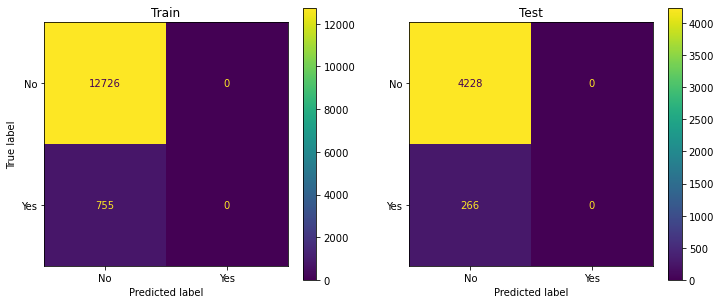

In [115]:
lr0 = evaluateLogistic(X_train_p, X_test_p, y_train_p, y_test_p, pos_label = 'Yes', class_weight=None)

## Evaluate lr0_balanced

The accuracy in the TRAIN set is: 66.5
The precision in the TRAIN set is: 11.33
The recall in the TRAIN set is: 73.11
The F1 in the TRAIN set is: 19.62
The Kappa in the TRAIN set is: 10.99

The accuracy in the TEST set is: 64.86
The precision in the TEST set is: 11.13
The recall in the TEST set is: 70.68
The F1 in the TEST set is: 19.23
The Kappa in the TEST set is: 10.03


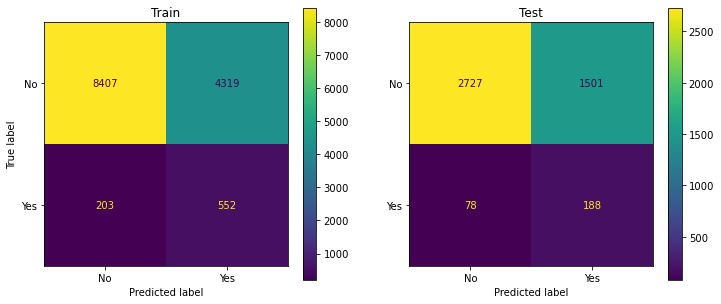

In [116]:
lr0_balanced = evaluateLogistic(X_train_p, X_test_p, y_train_p, y_test_p, class_weight='balanced')

# KNeighbors Classifier

## Elbow classifier - function

In [118]:
def elbowClassifier(X_train, X_test, y_train, y_test, metrics, weights):
    """Elbow test for Classfier
    Inputs: 
        weights: possible distances for the KNN classifier: 'uniform' (default), 'distance'
        metrics: metric to be displayed in y axis: 'precision', 'recal', 'accuracy'
        """
    
    knn_models = []
    scores = []
    
    for k in range(2,15):
        cls = KNeighborsClassifier(n_neighbors=k, weights = weights)
        # print("Training the k-NN model with {} neihgbours...".format(k))
        cls.fit(X_train, y_train)
        y_pred_test = cls.predict(X_test)
        #knn_models.append(cls)

        if metrics.lower() == 'precision':
            test_precision = 100*precision_score(y_test,y_pred_test, pos_label = 'Yes')
            scores.append(test_precision)
            
        elif metrics.lower() == 'recall':
            test_recall = 100*recall_score(y_test,y_pred_test, pos_label = 'Yes')
            scores.append(test_recall)
            
        else: # Accuracy
            scores.append(cls.score(X_test, y_test))
        #print()
    
    
    plt.figure(figsize=(10,6))
    plt.plot(range(2,15),scores,color = 'blue', linestyle='dashed',
             marker='o', markerfacecolor='red', markersize=10)
    plt.title('%s vs. K Value' %(metrics))
    plt.xticks(range(1,16))
    plt.gca().invert_yaxis()
    plt.xlabel('K')
    # plt.ylabel('Accuracy')
    # plt.ylabel('Precision')
    plt.ylabel('Recall')
    plt.show()
    

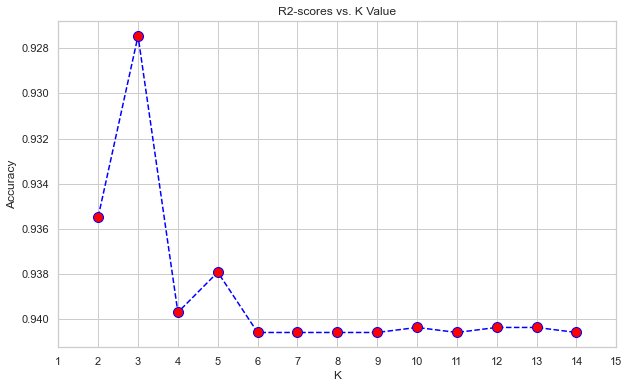

In [366]:
elbowClassifier(X_train_p, X_test_p, y_train_p, y_test_p) # Accuracy

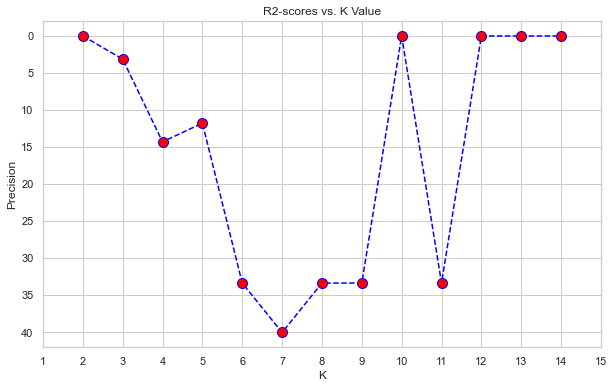

In [371]:
elbowClassifier(X_train_p, X_test_p, y_train_p, y_test_p) # Precision

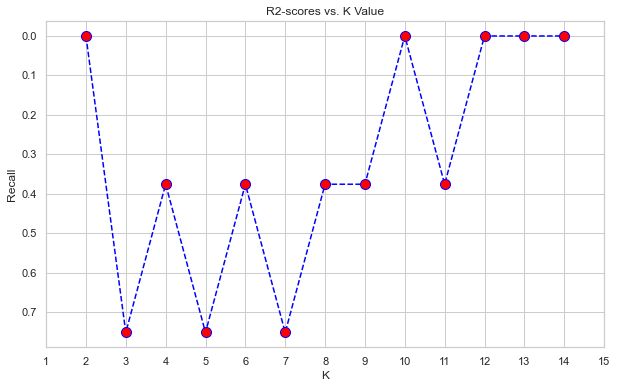

In [375]:
elbowClassifier(X_train_p, X_test_p, y_train_p, y_test_p) # Recall

In [119]:
cls = KNeighborsClassifier(n_neighbors=7)
cls.fit(X_train_p, y_train_p)
y_pred_train_cls = cls.predict(X_train_p)
y_pred_test_cls = cls.predict(X_test_p)
train_score_cls = cls.score(X_train_p, y_train_p)

The accuracy in the TRAIN set is: 94.4
The precision in the TRAIN set is: 50.00
The recall in the TRAIN set is: 1.46
The F1 in the TRAIN set is: 2.83
The Kappa in the TRAIN set is: 2.52

The accuracy in the TEST set is: 94.04
The precision in the TEST set is: 25.00
The recall in the TEST set is: 0.38
The F1 in the TEST set is: 0.74
The Kappa in the TEST set is: 0.57


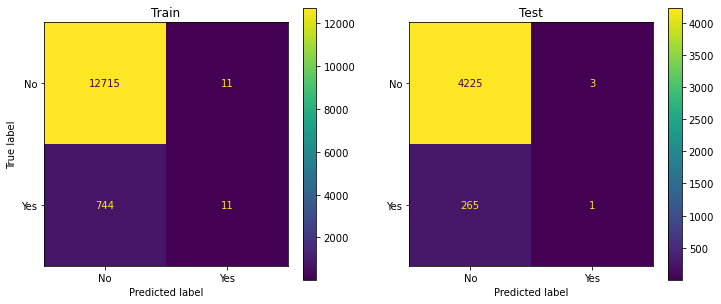

In [120]:
# Print the Train Metrics
train_precision_cls = 100*precision_score(y_train_p,y_pred_train_cls, pos_label = 'Yes')
train_recall_cls = 100*recall_score(y_train_p,y_pred_train_cls, pos_label = 'Yes')
train_f1_cls = 100*f1_score(y_train_p,y_pred_train_cls, pos_label = 'Yes')
train_kappa_cls = 100*cohen_kappa_score(y_train_p,y_pred_train_cls)
print("The accuracy in the TRAIN set is: {:.1f}".format(100*train_score_cls))
print("The precision in the TRAIN set is: {:.2f}".format(train_precision_cls))
print("The recall in the TRAIN set is: {:.2f}".format(train_recall_cls))
print("The F1 in the TRAIN set is: {:.2f}".format(train_f1_cls))
print("The Kappa in the TRAIN set is: {:.2f}".format(train_kappa_cls))

# Print the Test Metrics
print()
test_score_cls = 100*accuracy_score(y_test_p,y_pred_test_cls)
test_precision_cls = 100*precision_score(y_test_p,y_pred_test_cls, pos_label = 'Yes')
test_recall_cls = 100*recall_score(y_test_p,y_pred_test_cls, pos_label = 'Yes')
test_f1_cls = 100*f1_score(y_test_p,y_pred_test_cls, pos_label = 'Yes')
test_kappa_cls = 100*cohen_kappa_score(y_test_p,y_pred_test_cls)
print("The accuracy in the TEST set is: {:.2f}".format(test_score_cls))
print("The precision in the TEST set is: {:.2f}".format(test_precision_cls))
print("The recall in the TEST set is: {:.2f}".format(test_recall_cls))
print("The F1 in the TEST set is: {:.2f}".format(test_f1_cls))
print("The Kappa in the TEST set is: {:.2f}".format(test_kappa_cls))

      
# Display the two confussion matrices
f, ax = plt.subplots(1,2, figsize=(12,5))
cm_train_cls = confusion_matrix(y_train_p,y_pred_train_cls)
cm_test_cls = confusion_matrix(y_test_p,y_pred_test_cls)
disp_train_cls = ConfusionMatrixDisplay(confusion_matrix=cm_train_cls, display_labels=cls.classes_)
disp_cls = ConfusionMatrixDisplay(confusion_matrix=cm_test_cls, display_labels=cls.classes_)
disp_train_cls.plot(ax = ax[0])
disp_train_cls.ax_.set_title('Train')
disp_cls.plot(ax = ax[1])
disp_cls.ax_.set_title('Test')
disp_cls.ax_.set_ylabel(None)
plt.show()

## classifierMetrics function

In [121]:
def classifierMetrics(cls, y_train_p, y_test_p, y_pred_train_cls, y_pred_test_cls, pos_label='Yes'):
    """plots the metrics of a classifier model"""
    
    # Print the Train Metrics
    train_precision_cls = 100*precision_score(y_train_p,y_pred_train_cls, pos_label = pos_label)
    train_recall_cls = 100*recall_score(y_train_p,y_pred_train_cls, pos_label = pos_label)
    train_f1_cls = 100*f1_score(y_train_p,y_pred_train_cls, pos_label = pos_label)
    train_kappa_cls = 100*cohen_kappa_score(y_train_p,y_pred_train_cls)
    print("The accuracy in the TRAIN set is: {:.1f}".format(100*train_score_cls))
    print("The precision in the TRAIN set is: {:.2f}".format(train_precision_cls))
    print("The recall in the TRAIN set is: {:.2f}".format(train_recall_cls))
    print("The F1 in the TRAIN set is: {:.2f}".format(train_f1_cls))
    print("The Kappa in the TRAIN set is: {:.2f}".format(train_kappa_cls))

    # Print the Test Metrics
    print()
    test_score_cls = 100*accuracy_score(y_test_p,y_pred_test_cls)
    test_precision_cls = 100*precision_score(y_test_p,y_pred_test_cls, pos_label = pos_label)
    test_recall_cls = 100*recall_score(y_test_p,y_pred_test_cls, pos_label = pos_label)
    test_f1_cls = 100*f1_score(y_test_p,y_pred_test_cls, pos_label = pos_label)
    test_kappa_cls = 100*cohen_kappa_score(y_test_p,y_pred_test_cls)
    print("The accuracy in the TEST set is: {:.2f}".format(test_score_cls))
    print("The precision in the TEST set is: {:.2f}".format(test_precision_cls))
    print("The recall in the TEST set is: {:.2f}".format(test_recall_cls))
    print("The F1 in the TEST set is: {:.2f}".format(test_f1_cls))
    print("The Kappa in the TEST set is: {:.2f}".format(test_kappa_cls))


    # Display the two confussion matrices
    f, ax = plt.subplots(1,2, figsize=(12,5))
    cm_train_cls = confusion_matrix(y_train_p,y_pred_train_cls)
    cm_test_cls = confusion_matrix(y_test_p,y_pred_test_cls)
    disp_train_cls = ConfusionMatrixDisplay(confusion_matrix=cm_train_cls, display_labels=cls.classes_)
    disp_cls = ConfusionMatrixDisplay(confusion_matrix=cm_test_cls, display_labels=cls.classes_)
    disp_train_cls.plot(ax = ax[0])
    disp_train_cls.ax_.set_title('Train')
    disp_cls.plot(ax = ax[1])
    disp_cls.ax_.set_title('Test')
    disp_cls.ax_.set_ylabel(None)
    plt.show()
    

# Random Undersampling

In [ ]:
# Try random undersampler

In [111]:
rus = RandomUnderSampler(random_state=0)
X_train_rus, y_train_rus = rus.fit_resample(X_train,y_train)

In [112]:
X_train_rus.shape

(1510, 11)

In [113]:
y_train_rus.shape

(1510,)

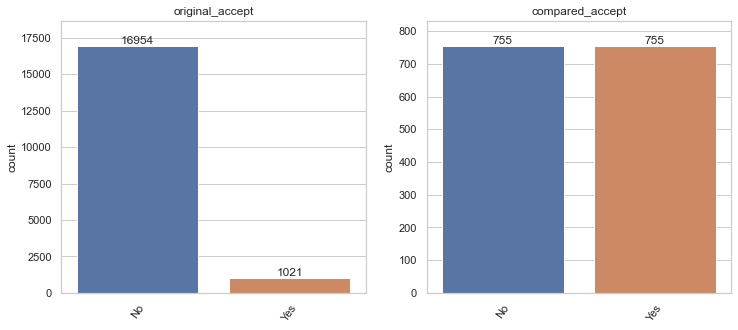

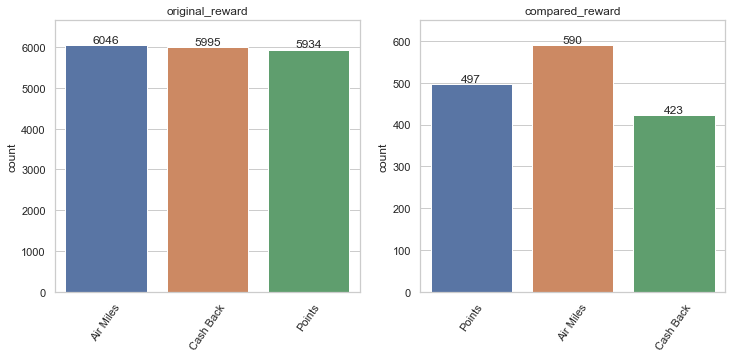

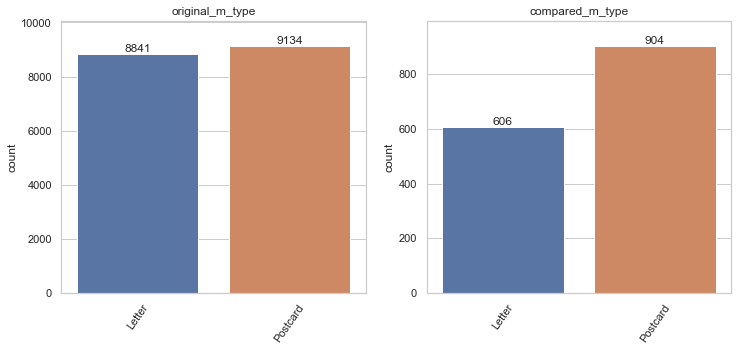

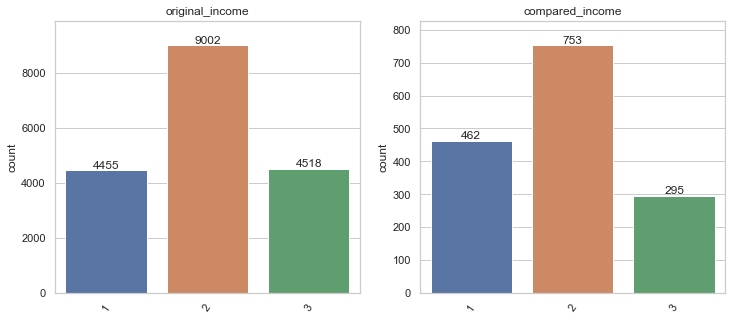

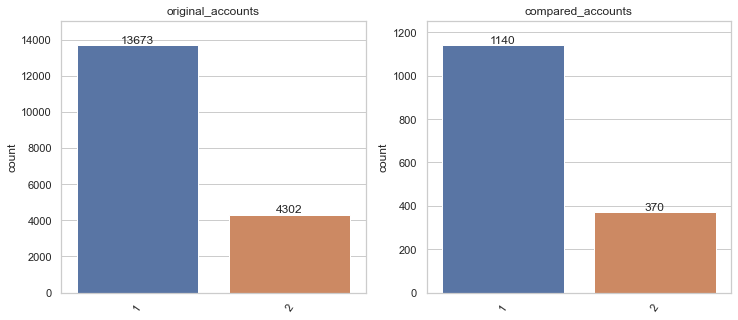

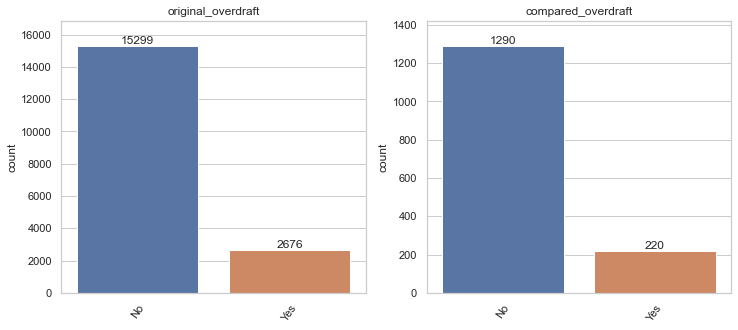

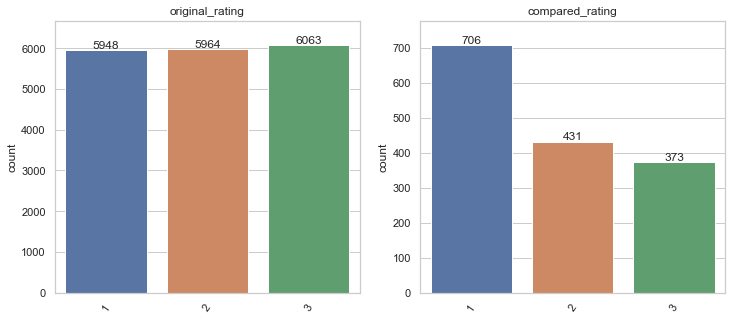

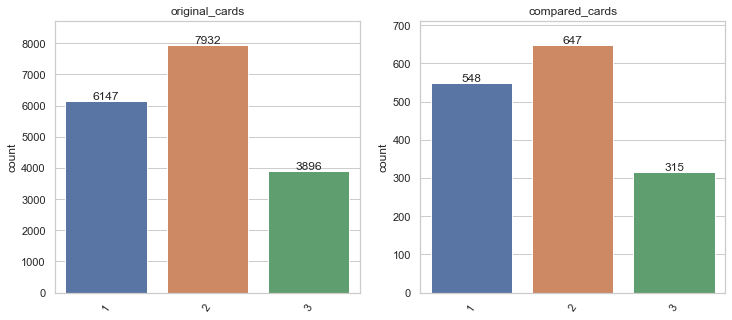

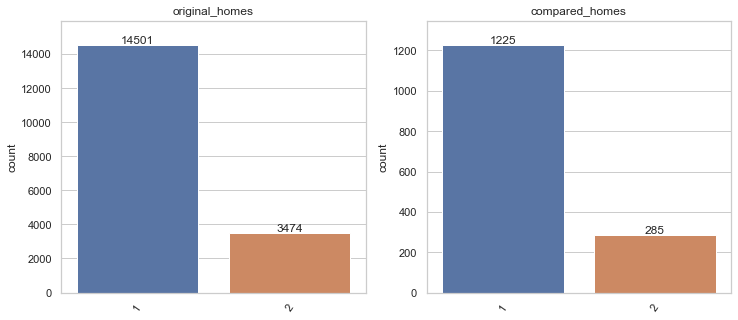

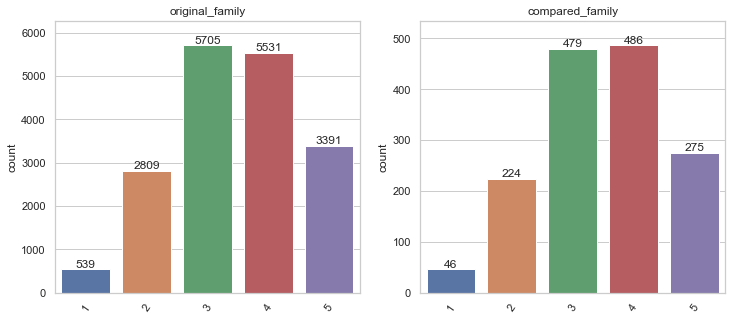

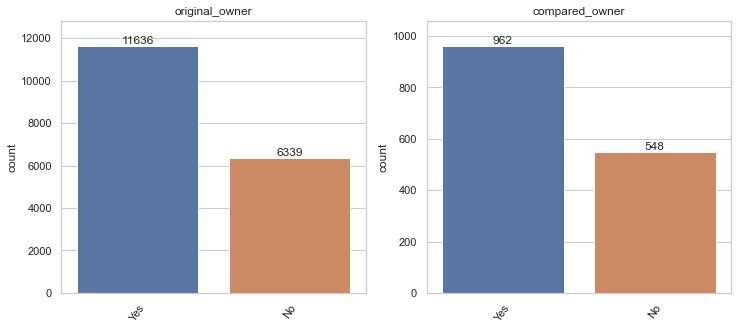

In [114]:
plotCompareDiscrete(categorical, pd.concat([y_train_rus,X_train_rus], axis=1))

There are some features which change its distribution:
* Obviously accept
* reward
* m_type
* rating
  
How could I solve that?  

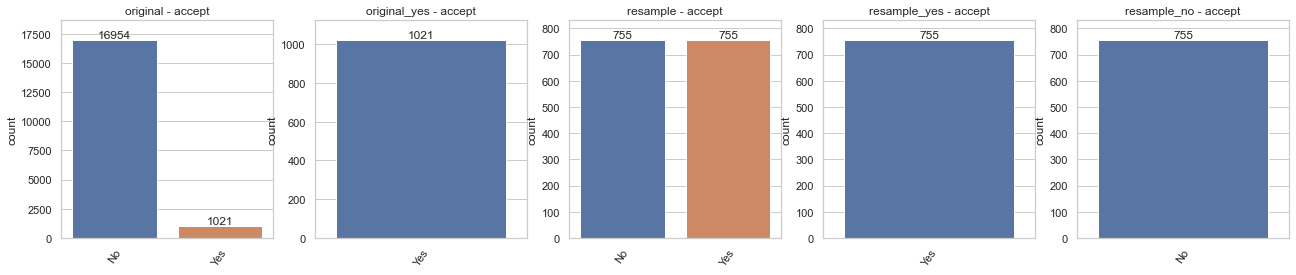

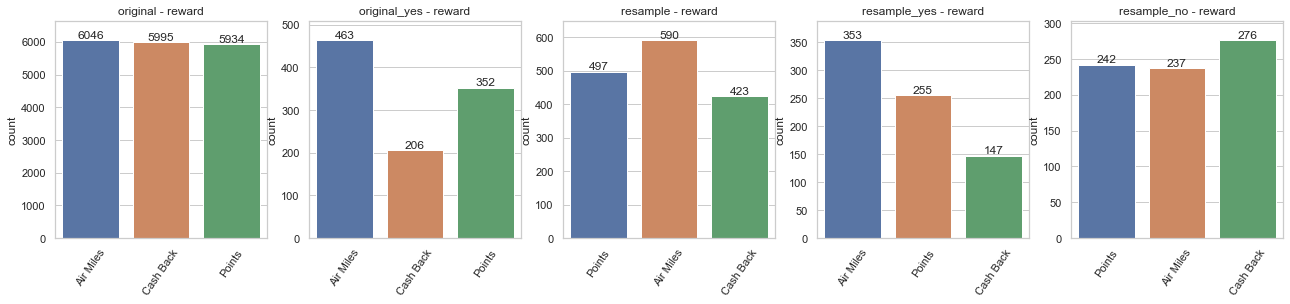

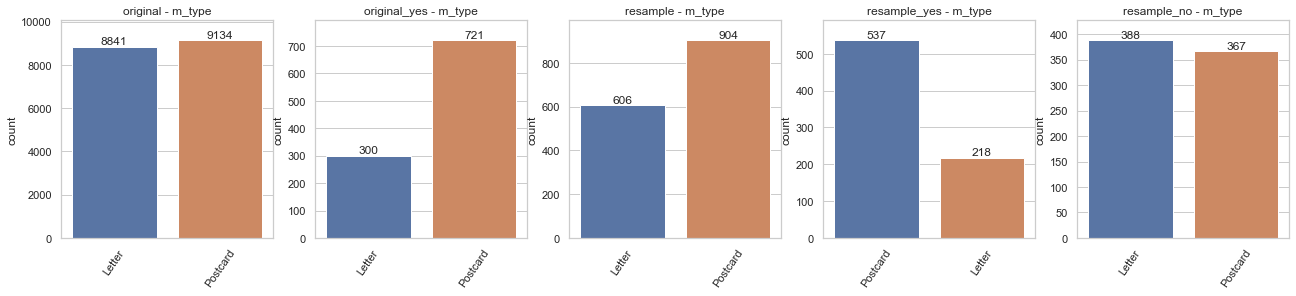

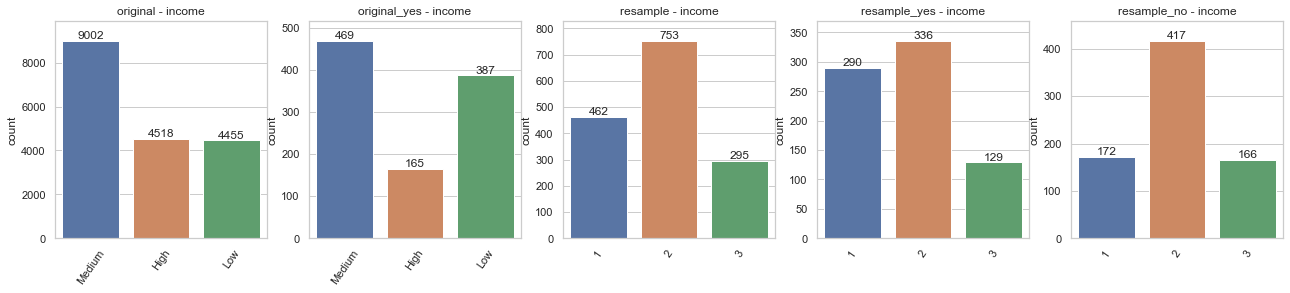

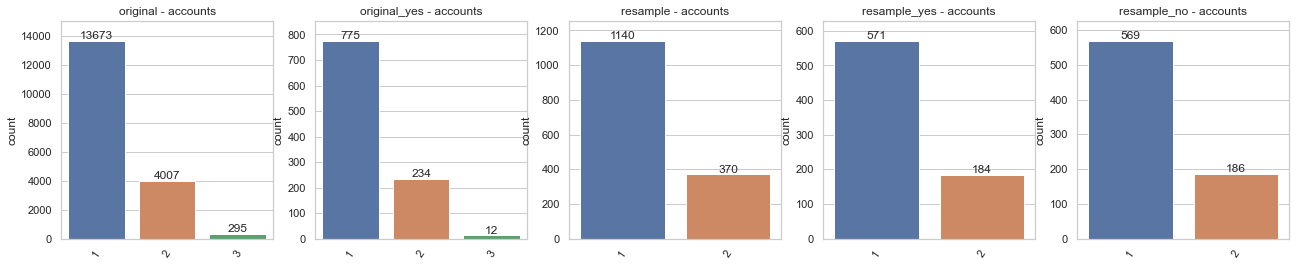

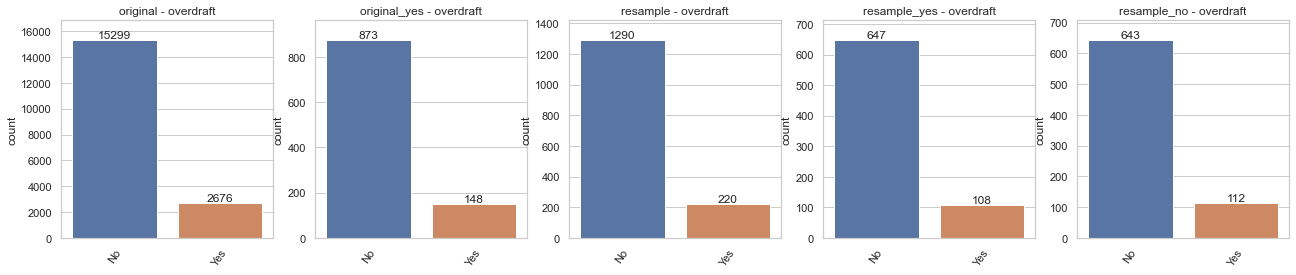

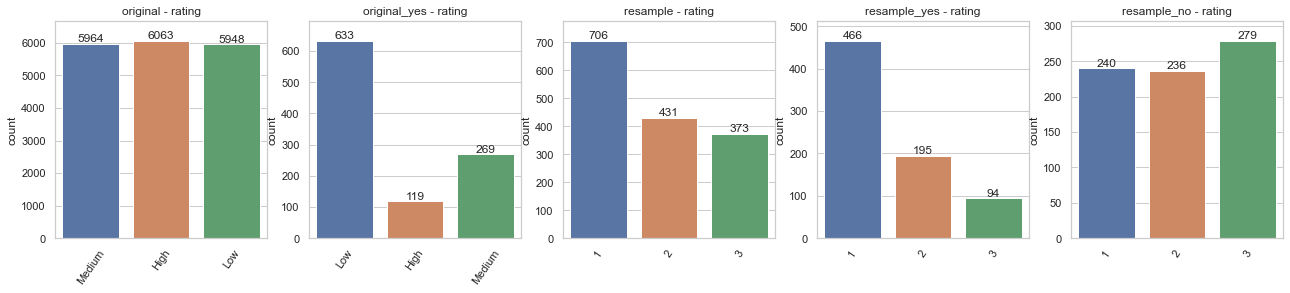

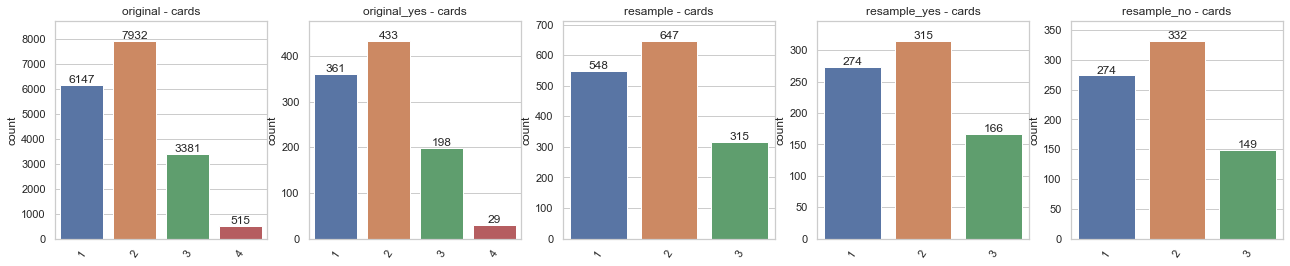

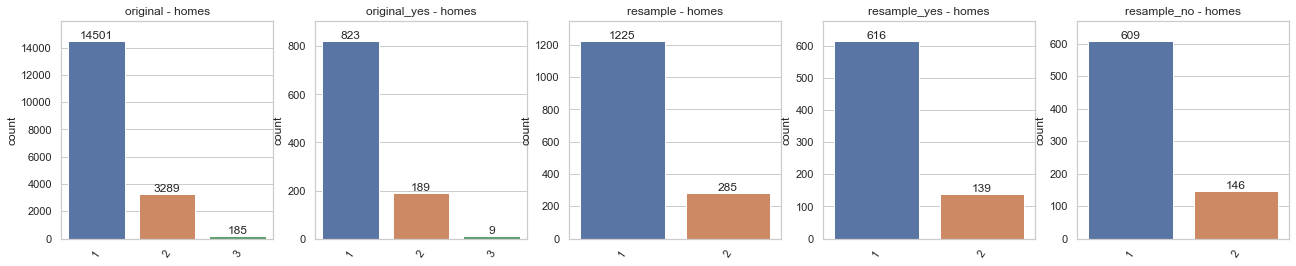

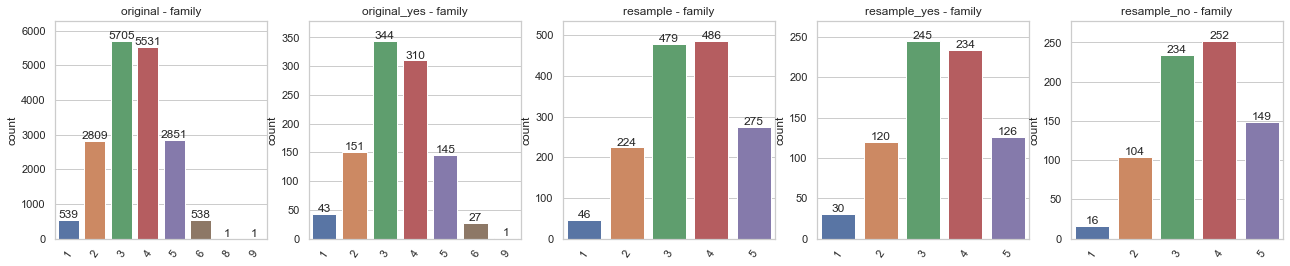

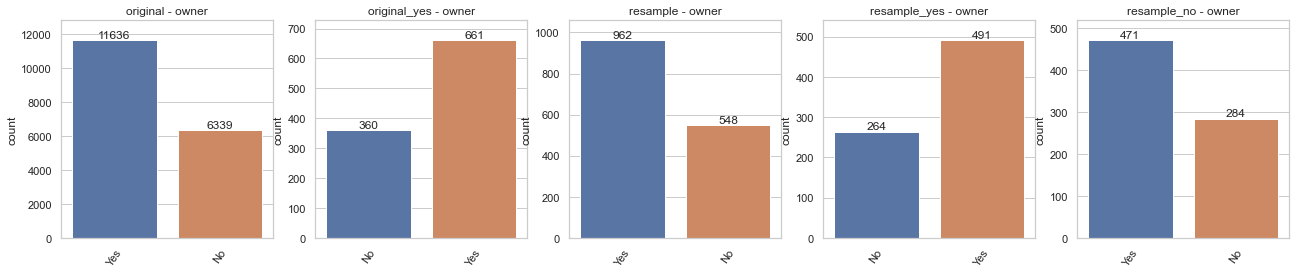

In [122]:
plotCompareResample(disc, pd.concat([y_train_rus,X_train_rus], axis=1), 'accept', pos_label = 'Yes')

## Encode categorical

In [123]:
X_train_rus.dtypes

reward         object
m_type         object
income       category
accounts     category
overdraft      object
rating       category
cards        category
homes        category
family       category
owner          object
balance       float64
dtype: object

In [124]:
# Split numeric categorical
numeric_rus, categorical_rus = numericCategorical(X_train_rus)

In [125]:
numeric_rus_test, categorical_rus_test = numericCategorical(X_test)

I have already encoded the ordinal categories, there was no need indeed. But it is already donde.

In [127]:
categorical_rus = encodeCategoricals(categorical_rus, fit=True)

In [128]:
categorical_rus_test = encodeCategoricals(categorical_rus_test, fit=False)

In [129]:
categorical_rus_test

income accounts rating cards homes family  reward_Cash Back  \
10162      3        1      1     1     1      2               0.0   
14730      1        1      1     2     1      5               0.0   
15798      3        1      3     2     2      2               0.0   
6200       2        1      3     2     1      4               0.0   
12510      1        1      3     2     1      5               1.0   
...      ...      ...    ...   ...   ...    ...               ...   
15592      3        1      2     2     1      5               0.0   
7865       2        1      3     2     2      2               0.0   
2916       2        1      3     2     1      5               0.0   
2228       1        1      3     2     1      5               0.0   
6537       1        1      1     3     1      5               1.0   

       reward_Points  m_type_Postcard  overdraft_Yes  owner_Yes  
10162            0.0              0.0            0.0        0.0  
14730            1.0              1.0            0.0        0.0  
15798            1.0              1.0            0.0        0.0  
6200             1.0              0.0            0.0        1.0  
12510            0.0              0.0            0.0        1.0  
...              ...              ...            ...        ...  
15592            1.0              1.0            0.0        1.0  
7865             1.0              0.0            0.0        1.0  
2916             0.0              1.0            0.0        1.0  
2228             0.0              0.0            0.0        1.0  
6537             0.0              1.0            0.0        1.0  

[4494 rows x 11 columns]

## Normalize numeric

In [130]:
numeric_rus.std()

balance    554.588053
dtype: float64

In [132]:
numeric_rus = normalize(numeric_rus)
numeric_rus.std()

balance    1.0
dtype: float64

In [133]:
numeric_rus_test = normalize(numeric_rus_test)
numeric_rus_test.std()

balance    1.0
dtype: float64

## Concat and scale

In [134]:
X_train_rus = pd.concat([categorical_rus, numeric_rus], axis=1)
X_train_rus.shape

(1510, 12)

In [135]:
X_test_rus = pd.concat([categorical_rus_test, numeric_rus_test], axis=1)
X_test_rus.shape

(4494, 12)

In [ ]:
# MinMax Scale

In [136]:
scaler_rus = MinMaxScaler()
scaler_rus.fit(X_train_rus)
features = scaler_rus.get_feature_names_out()
X_train_rus = scaler_rus.transform(X_train_rus)
X_train_rus = pd.DataFrame(X_train_rus, columns=features)
X_test_rus = scaler_rus.transform(X_test_rus)
X_test_rus = pd.DataFrame(X_test_rus, columns = features)

In [137]:
X_train_rus.shape

(1510, 12)

In [138]:
y_train_rus.shape

(1510,)

In [139]:
X_train_rus.isna().sum()

income              0
accounts            0
rating              0
cards               0
homes               0
family              0
reward_Cash Back    0
reward_Points       0
m_type_Postcard     0
overdraft_Yes       0
owner_Yes           0
balance             0
dtype: int64

In [140]:
X_test_rus.shape

(4494, 12)

## Logistic Regression Model

In [141]:
lr_rus = LogisticRegression(max_iter=1000, random_state=0)
lr_rus.fit(X_train_rus, y_train_rus)
y_pred_test_rus = lr_rus.predict(X_test_rus)

In [144]:
y_pred_train_rus = lr_rus.predict(X_train_rus)

In [142]:
lr_rus.score(X_train_rus,y_train_rus)

0.704635761589404

In [143]:
lr_rus.score(X_test_rus,y_test)

0.6588785046728972

## Evaluate Logistic Regression RUS

In [145]:
# Train Metrics
print("The accuracy in the TRAIN set is: {:.2f}".format(accuracy_score(y_train_rus,y_pred_train_rus)))
print("The precision in the TRAIN set is: {:.2f}".format(precision_score(y_train_rus,y_pred_train_rus, pos_label = 'Yes')))
print("The recall in the TRAIN set is: {:.2f}".format(recall_score(y_train_rus,y_pred_train_rus, pos_label = 'Yes')))
print("The F1 in the TRAIN set is: {:.2f}".format(f1_score(y_train_rus,y_pred_train_rus, pos_label = 'Yes')))
print("The Kappa in the TRAIN set is: {:.2f}".format(cohen_kappa_score(y_train_rus,y_pred_train_rus)))


The accuracy in the TRAIN set is: 0.70
The precision in the TRAIN set is: 0.70
The recall in the TRAIN set is: 0.72
The F1 in the TRAIN set is: 0.71
The Kappa in the TRAIN set is: 0.41


In [146]:
# Test Metrics
print("The accuracy in the TEST set is: {:.2f}".format(accuracy_score(y_test,y_pred_test_rus)))
print("The precision in the TEST set is: {:.2f}".format(precision_score(y_test,y_pred_test_rus, pos_label = 'Yes')))
print("The recall in the TEST set is: {:.2f}".format(recall_score(y_test,y_pred_test_rus, pos_label = 'Yes')))
print("The F1 in the TEST set is: {:.2f}".format(f1_score(y_test,y_pred_test_rus, pos_label = 'Yes')))
print("The Kappa in the TEST set is: {:.2f}".format(cohen_kappa_score(y_test,y_pred_test_rus)))

The accuracy in the TEST set is: 0.66
The precision in the TEST set is: 0.12
The recall in the TEST set is: 0.72
The F1 in the TEST set is: 0.20
The Kappa in the TEST set is: 0.11


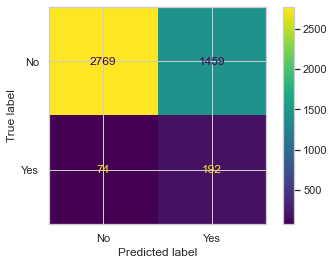

In [147]:
cm_test_rus = confusion_matrix(y_test,y_pred_test_rus)
disp_rus = ConfusionMatrixDisplay(confusion_matrix=cm_test_rus, display_labels=lr_rus.classes_)
disp_rus.plot()
plt.show()

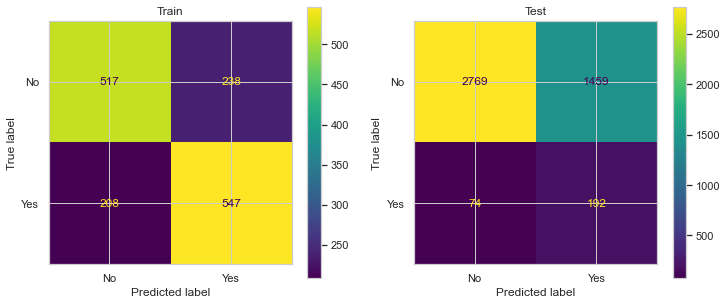

In [151]:
f, ax = plt.subplots(1,2, figsize=(12,5))
cm_train_rus = confusion_matrix(y_train_rus,y_pred_train_rus)
cm_test_rus = confusion_matrix(y_test,y_pred_test_rus)
disp_rus_train = ConfusionMatrixDisplay(confusion_matrix=cm_train_rus, display_labels=lr_rus.classes_)
disp_rus = ConfusionMatrixDisplay(confusion_matrix=cm_test_rus, display_labels=lr_rus.classes_)
disp_rus_train.plot(ax = ax[0])
disp_rus_train.ax_.set_title('Train')
disp_rus.plot(ax = ax[1])
disp_rus.ax_.set_title('Test')
plt.show()

## Evaluate rus_balanced

The accuracy in the TRAIN set is: 70.5
The precision in the TRAIN set is: 69.68
The recall in the TRAIN set is: 72.45
The F1 in the TRAIN set is: 71.04
The Kappa in the TRAIN set is: 40.93

The accuracy in the TEST set is: 65.89
The precision in the TEST set is: 11.63
The recall in the TEST set is: 72.18
The F1 in the TEST set is: 20.03
The Kappa in the TEST set is: 10.95


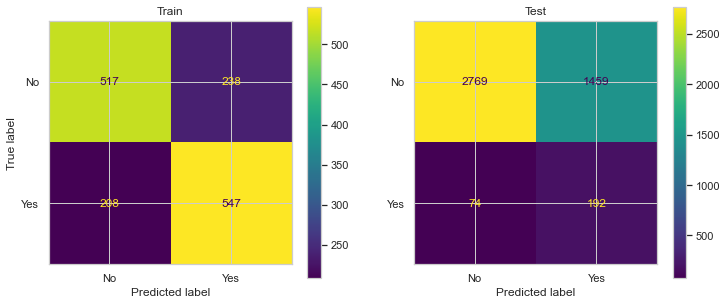

In [286]:
lr_rus_balanced = evaluateLogistic(X_train_rus, X_test_rus, y_train_rus, y_test, class_weight='balanced')

## Logits

In [265]:
logits_rus = np.log(lr_rus.predict_proba(X_train_rus)[:,1]/(1-lr_rus.predict_proba(X_train_rus)[:,1]))

In [266]:
logits_rus = pd.Series(logits_rus)

In [267]:
X_logits_rus = pd.concat([X_train_rus,logits_rus], axis =1)
X_logits_rus

income  accounts  rating  cards  homes  family  reward_Cash Back  \
0        0.0       0.0     0.0    0.5    0.0    1.00               0.0   
1        0.5       1.0     1.0    0.0    0.0    0.50               0.0   
2        0.5       1.0     0.0    0.0    0.0    0.25               0.0   
3        0.5       0.0     0.5    0.5    1.0    1.00               0.0   
4        0.5       0.0     0.0    0.5    1.0    1.00               0.0   
...      ...       ...     ...    ...    ...     ...               ...   
1505     0.5       1.0     0.5    0.0    0.0    0.75               0.0   
1506     0.5       0.0     0.0    0.5    1.0    0.50               0.0   
1507     0.0       1.0     0.0    0.5    1.0    0.75               0.0   
1508     0.0       0.0     0.0    0.0    1.0    1.00               1.0   
1509     0.5       0.0     0.5    0.5    0.0    0.75               0.0   

      reward_Points  m_type_Postcard  overdraft_Yes  Owner_Yes   balance  \
0               1.0              0.0            0.0        1.0  0.401094   
1               0.0              0.0            0.0        1.0  0.284933   
2               0.0              1.0            0.0        1.0  0.224747   
3               1.0              0.0            0.0        0.0  0.533670   
4               1.0              1.0            0.0        1.0  0.153199   
...             ...              ...            ...        ...       ...   
1505            0.0              0.0            0.0        1.0  0.270202   
1506            0.0              0.0            0.0        1.0  0.223064   
1507            0.0              1.0            0.0        1.0  0.287879   
1508            0.0              0.0            0.0        0.0  0.564394   
1509            1.0              1.0            0.0        0.0  0.665404   

             0  
0     0.395691  
1    -1.266904  
2     1.692268  
3    -1.062720  
4     1.079361  
...        ...  
1505 -0.458568  
1506  0.722738  
1507  2.034470  
1508 -0.504458  
1509 -0.043381  

[1510 rows x 13 columns]

income  accounts    rating     cards     homes    family  \
income            1.000000 -0.015587  0.045455  0.004134  0.030298  0.005098   
accounts         -0.015587  1.000000  0.029427 -0.031015 -0.015088 -0.016823   
rating            0.045455  0.029427  1.000000  0.012738  0.007987  0.043296   
cards             0.004134 -0.031015  0.012738  1.000000 -0.011487 -0.024735   
homes             0.030298 -0.015088  0.007987 -0.011487  1.000000  0.074632   
family            0.005098 -0.016823  0.043296 -0.024735  0.074632  1.000000   
reward_Cash Back  0.024845 -0.019369  0.009549  0.026445  0.026993  0.011714   
reward_Points    -0.018205  0.000716 -0.040407 -0.015826 -0.002898 -0.029628   
m_type_Postcard   0.005755  0.020387 -0.067287  0.020979 -0.026319 -0.031073   
overdraft_Yes     0.006257 -0.025781 -0.001112 -0.033108 -0.016901  0.021723   
Owner_Yes        -0.028766  0.042519  0.008691 -0.010345 -0.044241 -0.019367   
balance          -0.004545  0.009989  0.009372  0.032169  0.017226  0.049115   
0                -0.321292 -0.004255 -0.710410  0.031152 -0.027222 -0.149041   

                  reward_Cash Back  reward_Points  m_type_Postcard  \
income                    0.024845      -0.018205         0.005755   
accounts                 -0.019369       0.000716         0.020387   
rating                    0.009549      -0.040407        -0.067287   
cards                     0.026445      -0.015826         0.020979   
homes                     0.026993      -0.002898        -0.026319   
family                    0.011714      -0.029628        -0.031073   
reward_Cash Back          1.000000      -0.436947        -0.021782   
reward_Points            -0.436947       1.000000        -0.024559   
m_type_Postcard          -0.021782      -0.024559         1.000000   
overdraft_Yes            -0.002630      -0.001640         0.004945   
Owner_Yes                -0.029098      -0.004783         0.008638   
balance                  -0.011008      -0.014368         0.079034   
0                        -0.419346       0.042863         0.499836   

                  overdraft_Yes  Owner_Yes   balance         0  
income                 0.006257  -0.028766 -0.004545 -0.321292  
accounts              -0.025781   0.042519  0.009989 -0.004255  
rating                -0.001112   0.008691  0.009372 -0.710410  
cards                 -0.033108  -0.010345  0.032169  0.031152  
homes                 -0.016901  -0.044241  0.017226 -0.027222  
family                 0.021723  -0.019367  0.049115 -0.149041  
reward_Cash Back      -0.002630  -0.029098 -0.011008 -0.419346  
reward_Points         -0.001640  -0.004783 -0.014368  0.042863  
m_type_Postcard        0.004945   0.008638  0.079034  0.499836  
overdraft_Yes          1.000000  -0.004524 -0.011413 -0.018515  
Owner_Yes             -0.004524   1.000000  0.019134  0.070486  
balance               -0.011413   0.019134  1.000000 -0.021373  
0                     -0.018515   0.070486 -0.021373  1.000000

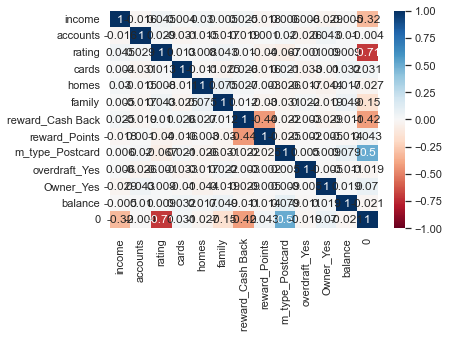

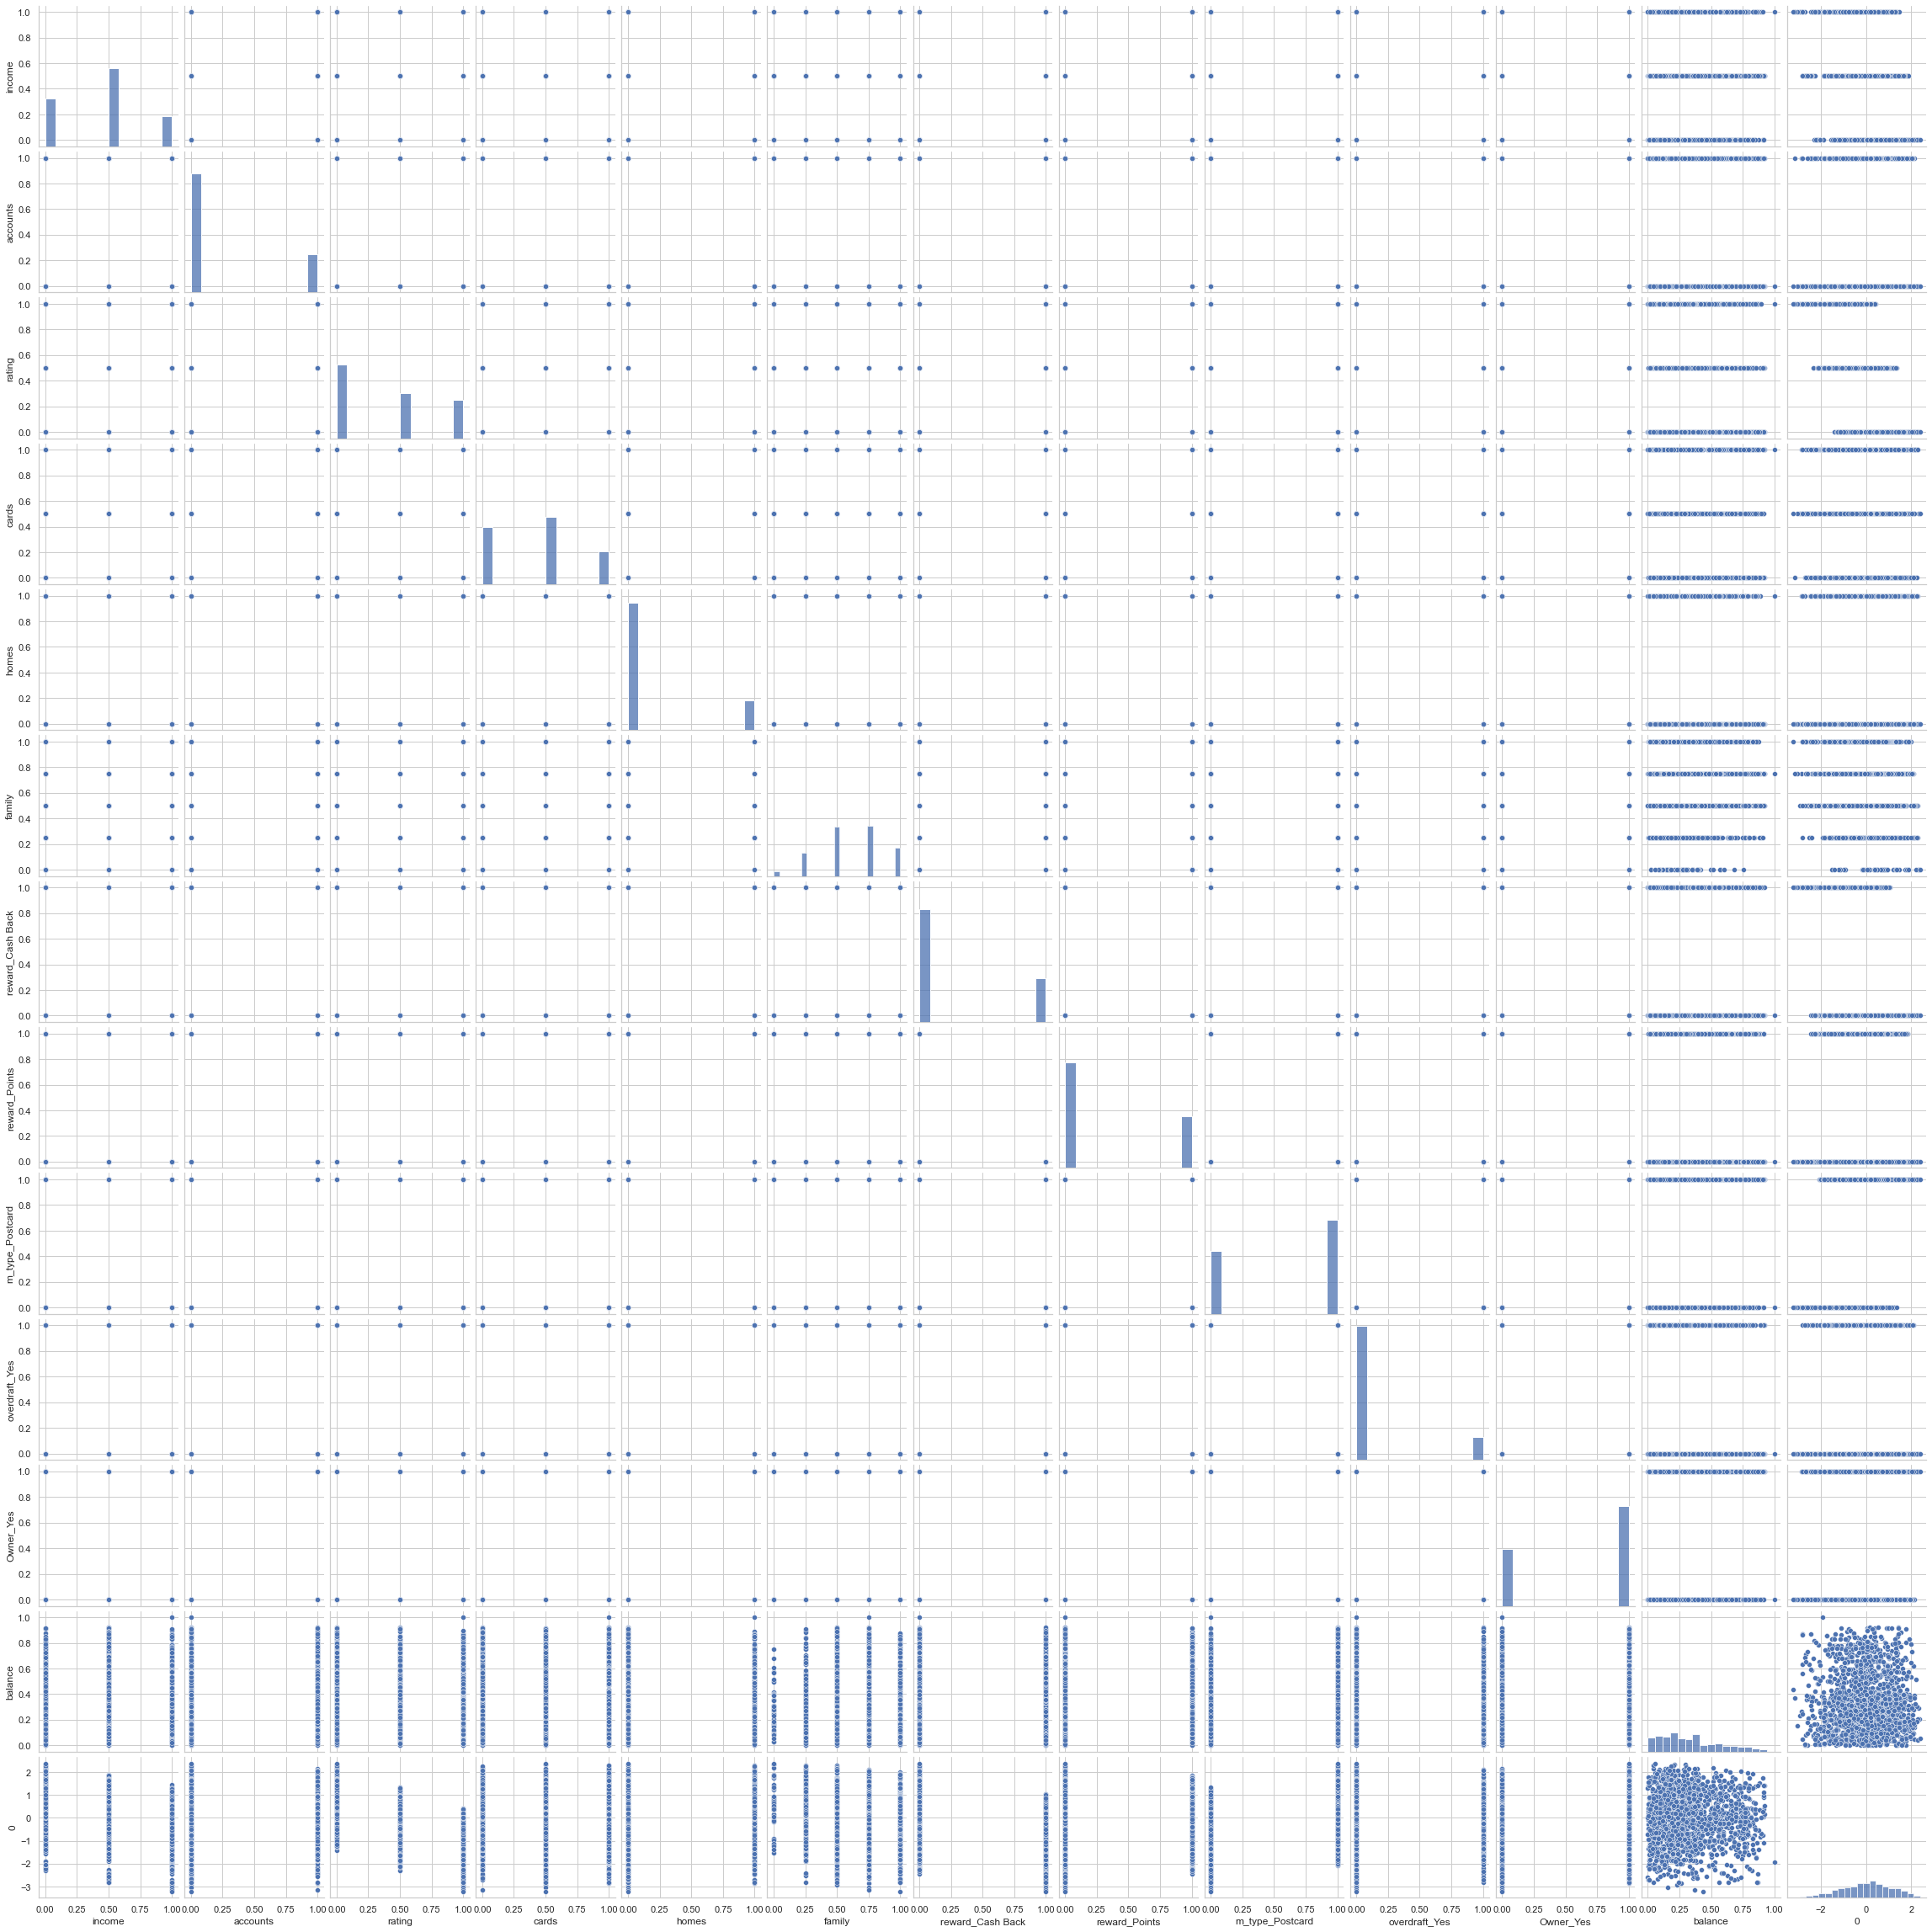

In [268]:
corrPlots(X_logits_rus)

# Up and Down sampling manual

## Manual Sampling

In [153]:
# Sample size
majority_class = y_train[y_train == 'No']
minority_class = y_train[y_train == 'Yes']

In [154]:
len(majority_class)

12724

In [155]:
len(minority_class)

755

In [156]:
size = int((len(majority_class)+len(minority_class))/2)
size

6739

In [157]:
len(X_train)

13479

In [158]:
majority_indices = majority_class.index
minority_indices = minority_class.index

In [ ]:
# Resample based on indices

In [159]:
major_new_indices = np.random.choice(majority_indices, size = int(size/2), replace = False)
minor_new_indices = np.random.choice(minority_indices, size = int(size/2), replace = True)

In [160]:
len(major_new_indices)

3369

In [161]:
new_indices = list(np.concatenate((major_new_indices,minor_new_indices)))
len(new_indices)

6738

In [162]:
new_indices

[15076,
 7205,
 7904,
 5810,
 8145,
 7121,
 1292,
 11706,
 3431,
 15226,
 13280,
 13441,
 8794,
 2272,
 8470,
 7435,
 4860,
 1583,
 10413,
 11341,
 17664,
 6602,
 10586,
 4961,
 12594,
 6026,
 17485,
 15489,
 17890,
 9931,
 10058,
 8728,
 9711,
 7001,
 6240,
 8813,
 5772,
 3449,
 6987,
 12988,
 9946,
 2962,
 7268,
 10226,
 9434,
 4162,
 1600,
 11372,
 2196,
 8741,
 2801,
 12344,
 10376,
 11227,
 3298,
 14196,
 6970,
 16220,
 6253,
 195,
 8043,
 10417,
 6904,
 10354,
 6772,
 17718,
 9726,
 2359,
 778,
 12559,
 12634,
 2452,
 17034,
 5841,
 14516,
 17491,
 98,
 4057,
 1927,
 17379,
 5248,
 7847,
 8962,
 4937,
 12595,
 6087,
 7881,
 15338,
 9708,
 2765,
 17199,
 3139,
 15739,
 16534,
 2954,
 16529,
 17791,
 13748,
 6431,
 16205,
 1601,
 16509,
 13092,
 9954,
 4933,
 3540,
 15545,
 16571,
 13144,
 2399,
 10240,
 15123,
 1889,
 11038,
 17464,
 13221,
 14487,
 6336,
 2042,
 1526,
 9707,
 14868,
 3273,
 894,
 8243,
 9339,
 3028,
 1722,
 297,
 7831,
 15994,
 9999,
 13037,
 9276,
 11522,
 17232

In [163]:
X_train_man = X_train.loc[new_indices,:] 
X_train_man.shape

(6738, 11)

In [164]:
y_train_man = y_train[new_indices]
y_train_man.shape

(6738,)

## Plot discrete comparision

In [165]:
X_train_man.head()

reward    m_type income accounts overdraft rating cards homes  \
15076  Air Miles  Postcard      1        2        No      3     3     1   
7205      Points  Postcard      2        1        No      2     3     1   
7904   Air Miles  Postcard      2        1        No      2     1     2   
5810      Points    Letter      3        1        No      1     3     1   
8145   Cash Back    Letter      3        1        No      2     1     1   

      family owner  balance  
15076      3   Yes    567.0  
7205       5   Yes    394.0  
7904       3   Yes    390.0  
5810       3   Yes    139.0  
8145       4    No   1028.0

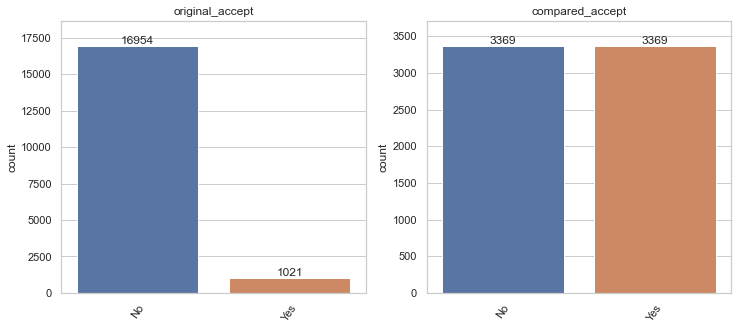

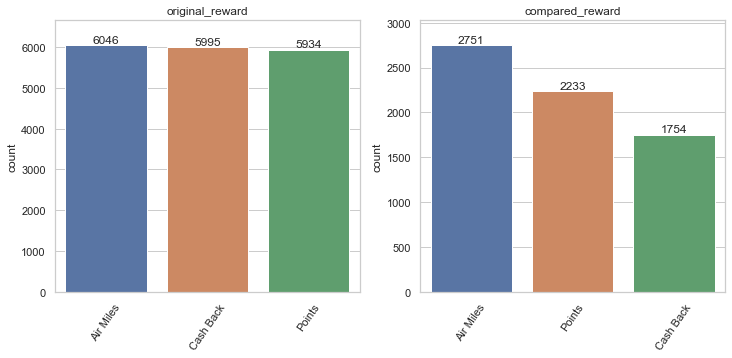

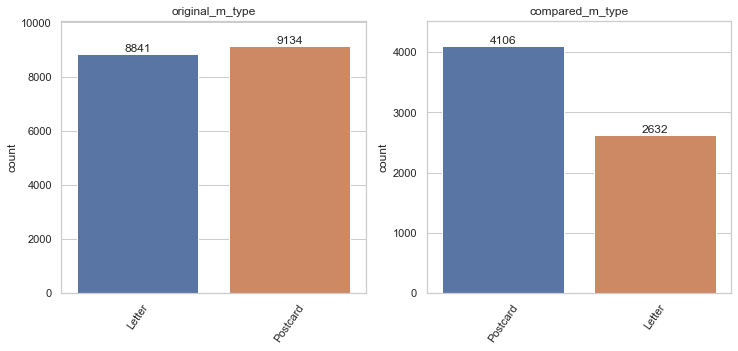

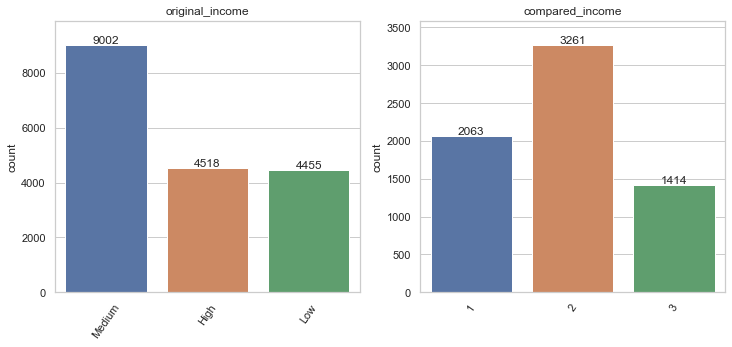

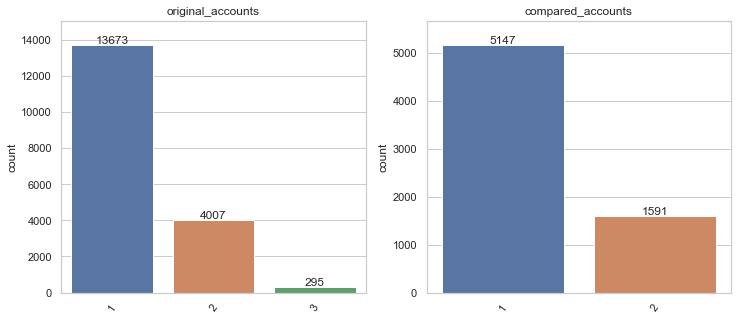

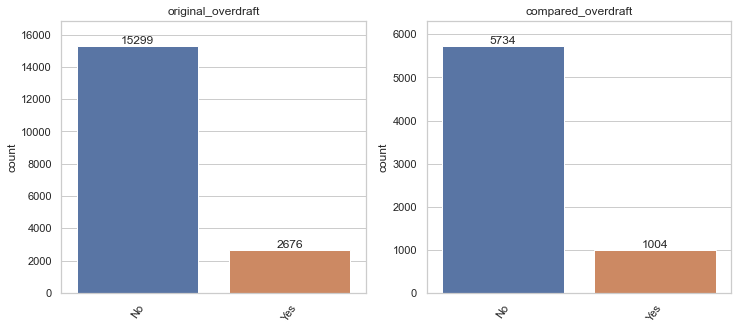

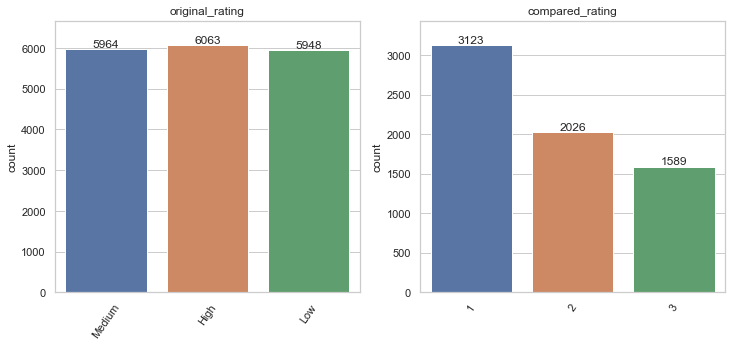

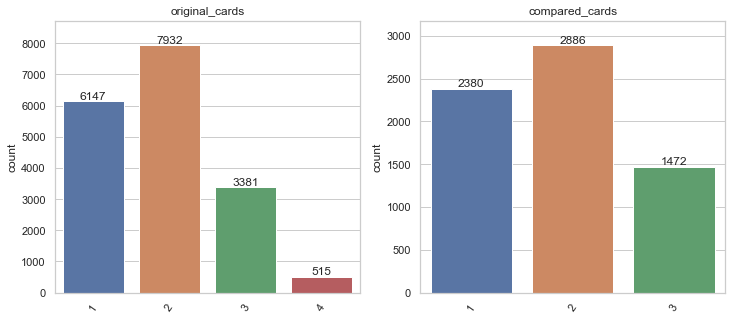

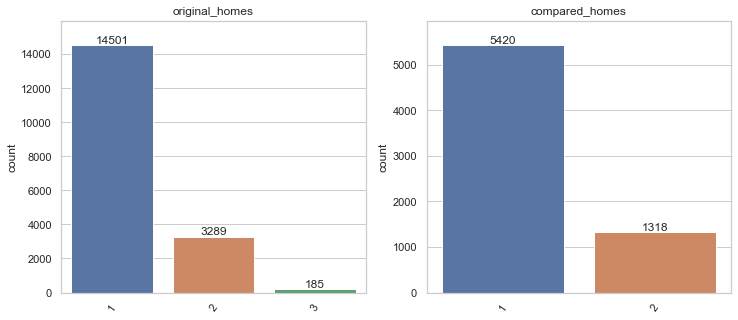

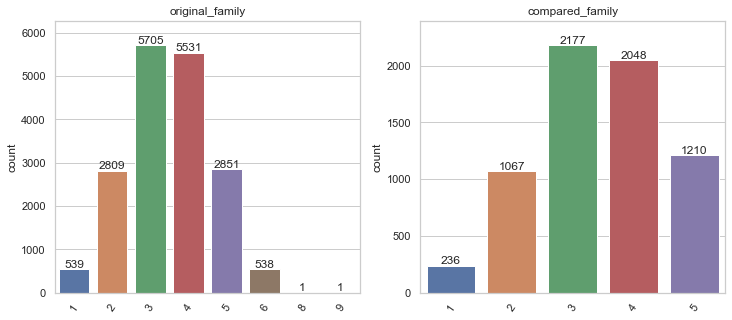

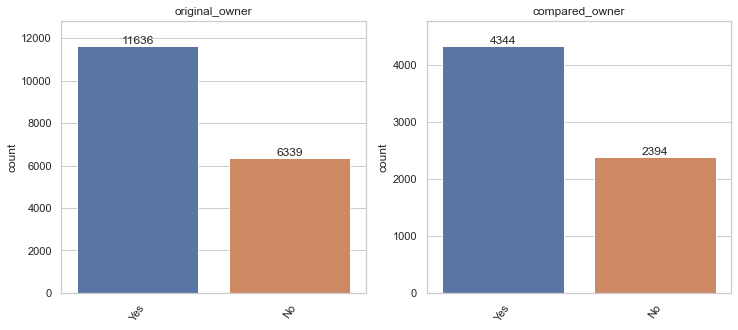

In [166]:
plotCompareDiscrete(disc, pd.concat([y_train_man,X_train_man.iloc[:,:-1]],axis=1))

There are features which do not have the same proportion:
* reward
* m_type
* compared_income
* rating

### function plotCompareResample 

In [121]:
def plotCompareResample(disc, resample, target, pos_label = 'Yes'):
    """Plot a comparision among the original categorical variables with the resampled
    dataframe and the subsets of the resample with positve and non positive label"""

    disc_pos = disc[disc[target] == pos_label]
    
    resample_pos = resample[resample[target] == pos_label]
    resample_neg = resample[resample[target] != pos_label]


    for i,c in enumerate(disc.columns):
            f, ax = plt.subplots(1,5, figsize=(22,4))

            sns.countplot(x=c,data=disc, ax=ax[0])
            sns.countplot(x=c,data=disc_pos, ax=ax[1])
            sns.countplot(x=c,data=resample,ax=ax[2])
            sns.countplot(x=c,data=resample_pos,ax=ax[3])
            sns.countplot(x=c,data=resample_neg,ax=ax[4])


            ax[0].set_title('original - %s' %(c))
            ax[0].set_xlabel(None)
            ax[0].tick_params(axis='x', labelrotation=55)
            
            ax[1].set_title('original_yes - %s' %(c))
            ax[1].set_xlabel(None)
            ax[1].tick_params(axis='x', labelrotation=55)

            ax[2].set_title('resample - %s' %(c))
            ax[2].set_xlabel(None)
            ax[2].tick_params(axis='x', labelrotation=55)

            ax[3].set_title('resample_yes - %s' %(c))
            ax[3].set_xlabel(None)
            ax[3].tick_params(axis='x', labelrotation=55)

            ax[4].set_title('resample_no - %s' %(c))
            ax[4].set_xlabel(None)
            ax[4].tick_params(axis='x', labelrotation=55)

                # annotate
            ax[0].bar_label(ax[0].containers[0], label_type='edge')
            ax[1].bar_label(ax[1].containers[0], label_type='edge')
            ax[2].bar_label(ax[2].containers[0], label_type='edge')
            ax[3].bar_label(ax[3].containers[0], label_type='edge')
            ax[4].bar_label(ax[4].containers[0], label_type='edge')

                # pad the spacing between the number and the edge of the figure
            ax[0].margins(y=0.1)
            ax[1].margins(y=0.1)
            ax[2].margins(y=0.1)
            ax[3].margins(y=0.1)
            ax[4].margins(y=0.1)


            plt.show()

    return None

### plot compare resample

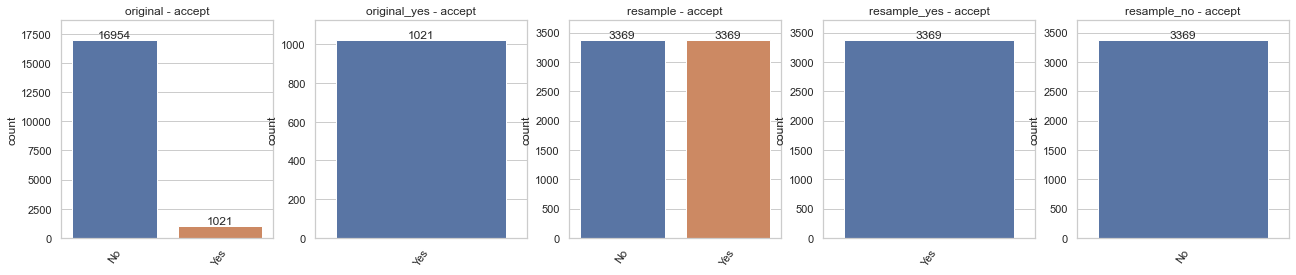

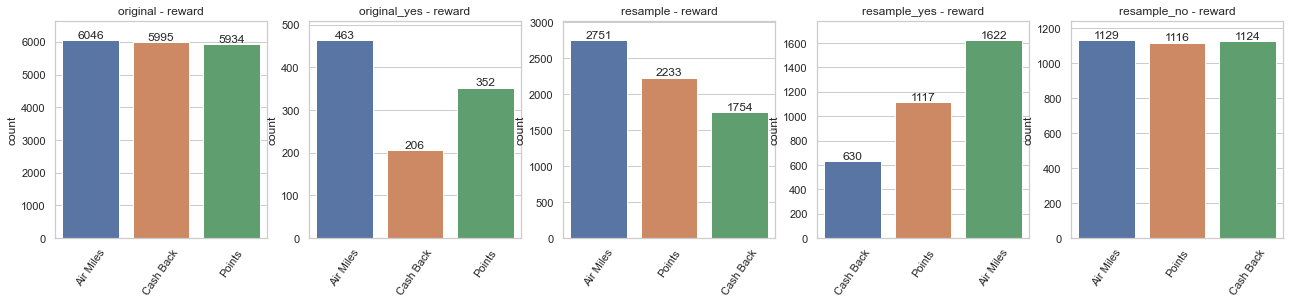

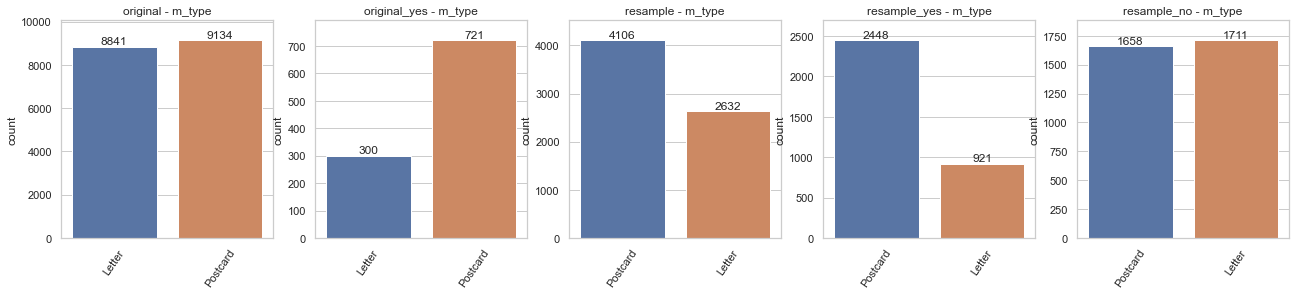

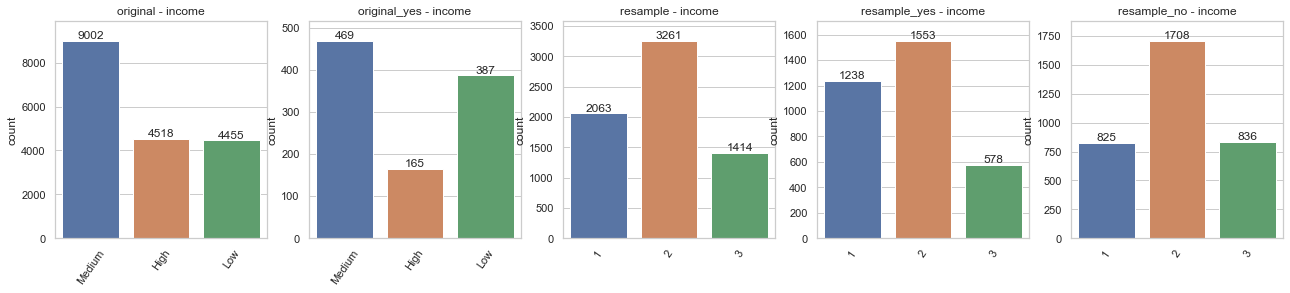

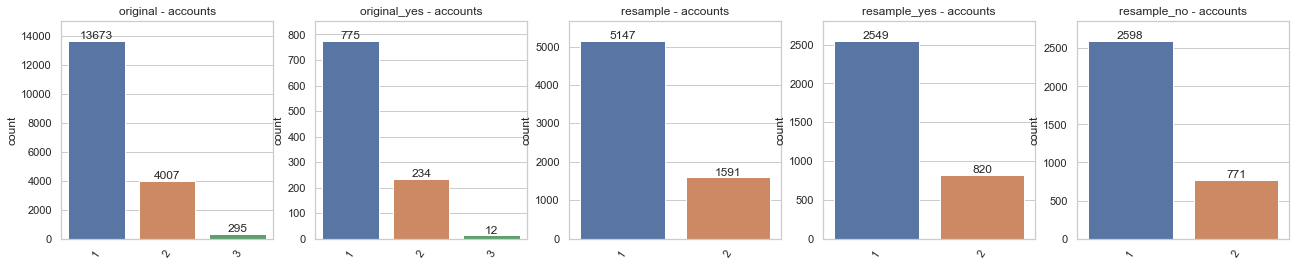

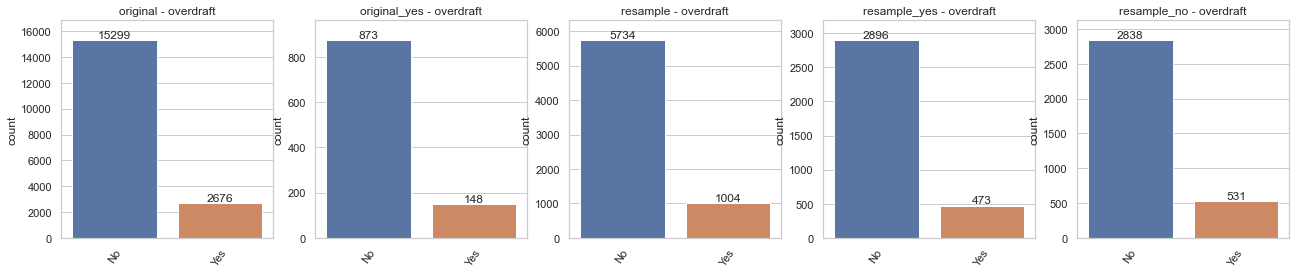

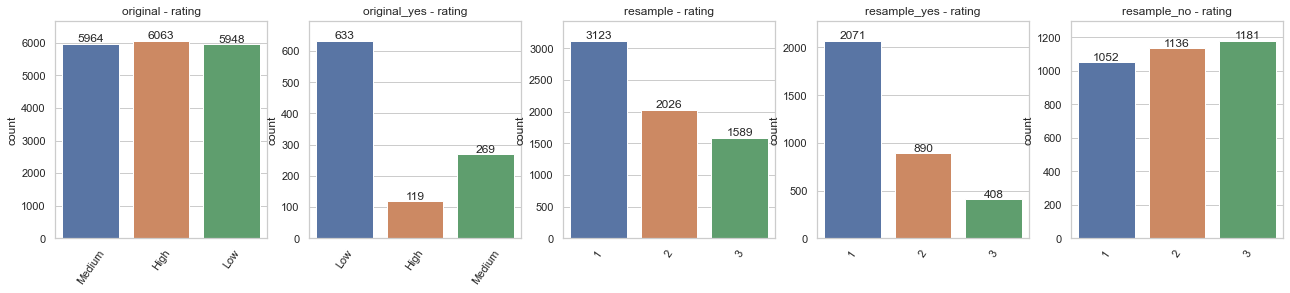

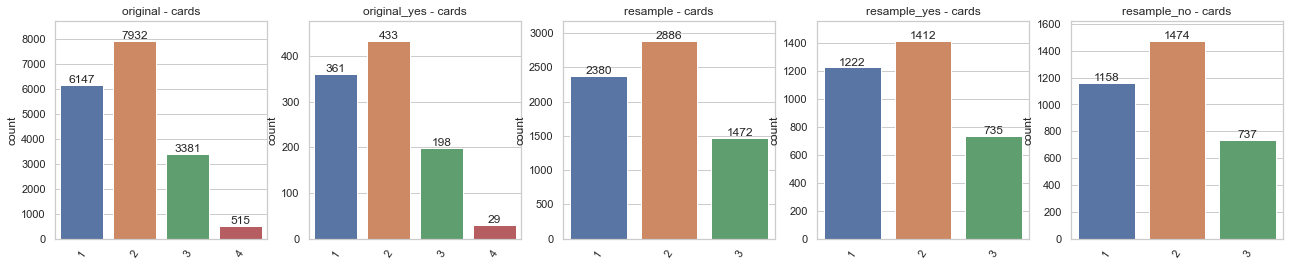

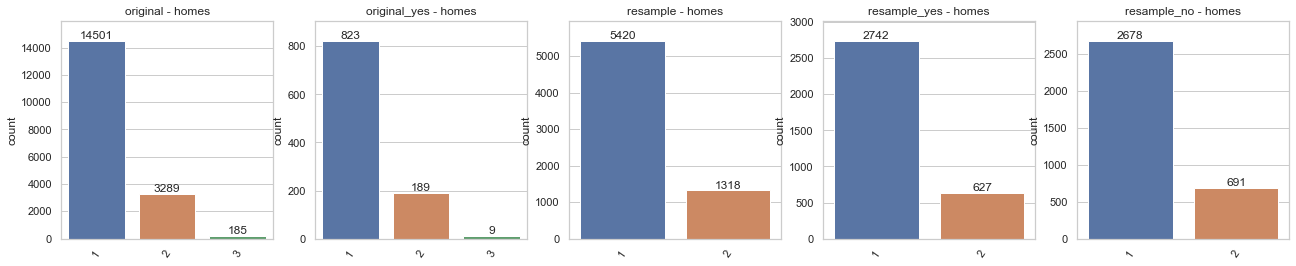

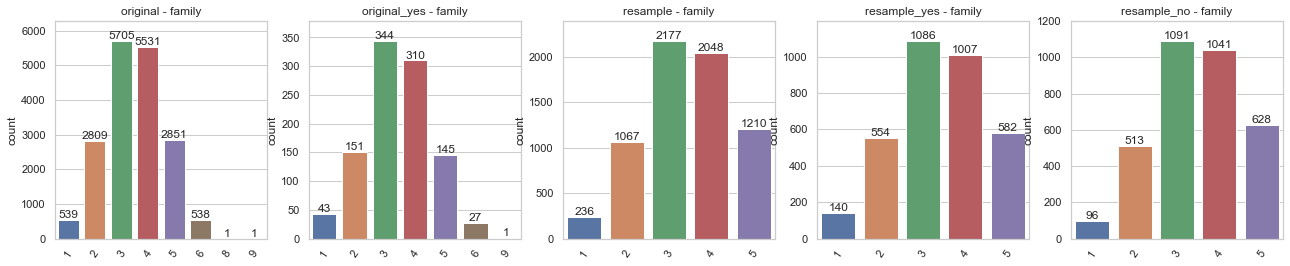

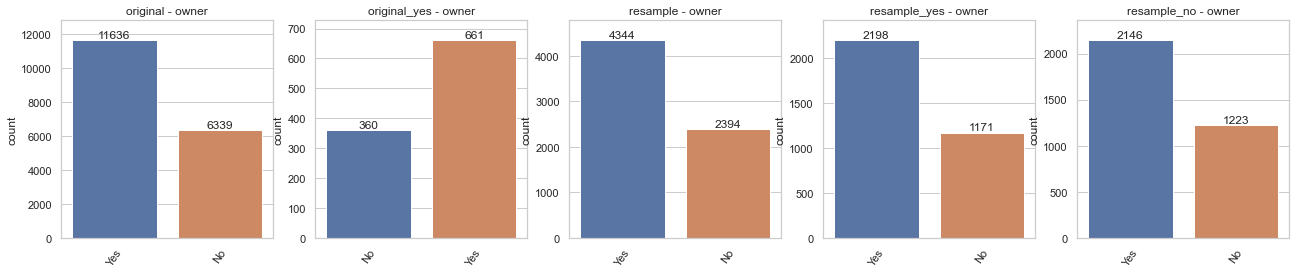

In [167]:
plotCompareResample(disc, pd.concat([y_train_man,X_train_man.iloc[:,:-1]],axis=1), 
                    'accept', pos_label = 'Yes')


## Finish preprocessing

In [287]:
X_train_man_p, X_test_man_p, y_train_man_p, y_test_man_p = preprocess(X_train_man, X_test, y_train_man, y_test)



In [ ]:
# Check

In [288]:
X_train_man.shape

(6738, 11)

In [289]:
X_train_man_p.shape

(6738, 12)

## Evaluate Manual Logistic Regression

The accuracy in the TRAIN set is: 69.5
The precision in the TRAIN set is: 68.66
The recall in the TRAIN set is: 71.71
The F1 in the TRAIN set is: 70.15
The Kappa in the TRAIN set is: 38.97

The accuracy in the TEST set is: 66.22
The precision in the TEST set is: 11.55
The recall in the TEST set is: 70.68
The F1 in the TEST set is: 19.85
The Kappa in the TEST set is: 10.77


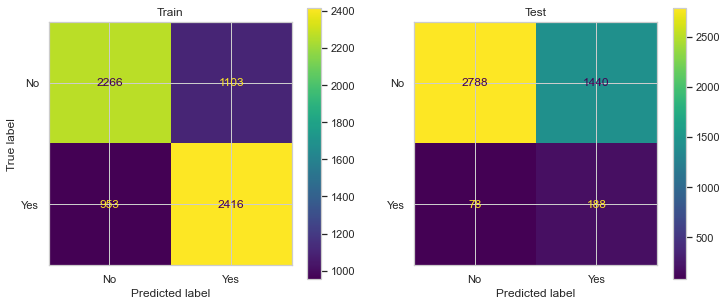

In [296]:
lr_man = evaluateLogistic(X_train_man_p, X_test_man_p, y_train_man_p, y_test_man_p, class_weight=None)

## Evaluate lr_man_balanced

The accuracy in the TRAIN set is: 69.5
The precision in the TRAIN set is: 68.66
The recall in the TRAIN set is: 71.71
The F1 in the TRAIN set is: 70.15
The Kappa in the TRAIN set is: 38.97

The accuracy in the TEST set is: 66.22
The precision in the TEST set is: 11.55
The recall in the TEST set is: 70.68
The F1 in the TEST set is: 19.85
The Kappa in the TEST set is: 10.77


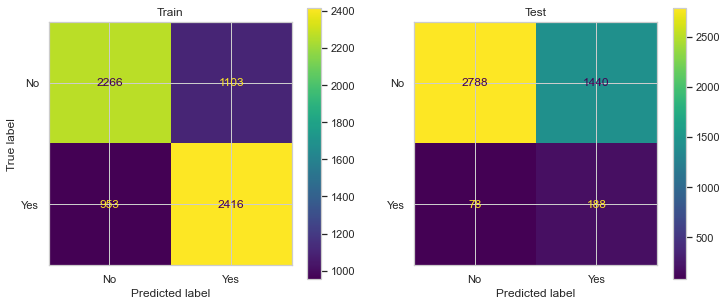

In [295]:
lr_man_balanced = evaluateLogistic(X_train_man_p, X_test_man_p, y_train_man_p, y_test_man_p, class_weight='balanced')


# Manually Balance Resampling

In [ ]:
# X_train_man, X_test, y_train_man, y_test

In [203]:
# Check shape
X_train_man.shape

(6738, 11)

In [204]:
y_train_man.shape

(6738,)

In [205]:
manual_resample = pd.concat([X_train_man,y_train_man],axis=1)
manual_resample.shape

(6738, 12)

In [206]:
manual_resample.columns

Index(['reward', 'm_type', 'income', 'accounts', 'overdraft', 'rating',
       'cards', 'homes', 'family', 'owner', 'balance', 'accept'],
      dtype='object')

In [195]:
imbalance_columns = ['reward','m_type', 'rating','accept']
# imbalance_columns = ['reward','Owner', 'family', 'homes', 'cards', 'overdraft', 'accounts', 'income', 'accept']
# imbalance_columns = ['homes','accounts','income', 'accept']

In [207]:
manual_grouped = manual_resample.groupby(imbalance_columns)[imbalance_columns]

In [208]:
manual_grouped2 = manual_resample.groupby(imbalance_columns)

In [299]:
manual_grouped3 = X_train.groupby('reward')

In [183]:
#manual_grouped_rating = manual_resample.groupby('rating')['rating']

In [209]:
manual_grouped.head()

reward    m_type rating accept
15076  Air Miles  Postcard      3     No
7205      Points  Postcard      2     No
7904   Air Miles  Postcard      2     No
5810      Points    Letter      1     No
8145   Cash Back    Letter      2     No
...          ...       ...    ...    ...
13759  Cash Back    Letter      3    Yes
13759  Cash Back    Letter      3    Yes
6659   Cash Back    Letter      2    Yes
4761   Cash Back    Letter      2    Yes
13759  Cash Back    Letter      3    Yes

[178 rows x 4 columns]

In [210]:
manual_grouped2.head()

reward    m_type income accounts overdraft rating cards homes  \
15076  Air Miles  Postcard      1        2        No      3     3     1   
7205      Points  Postcard      2        1        No      2     3     1   
7904   Air Miles  Postcard      2        1        No      2     1     2   
5810      Points    Letter      3        1        No      1     3     1   
8145   Cash Back    Letter      3        1        No      2     1     1   
...          ...       ...    ...      ...       ...    ...   ...   ...   
13759  Cash Back    Letter      1        1        No      3     1     1   
13759  Cash Back    Letter      1        1        No      3     1     1   
6659   Cash Back    Letter      2        2        No      2     2     1   
4761   Cash Back    Letter      1        1        No      2     1     1   
13759  Cash Back    Letter      1        1        No      3     1     1   

      family owner   balance accept  
15076      3   Yes  1.017280     No  
7205       5   Yes  0.706893     No  
7904       3   Yes  0.699716     No  
5810       3   Yes  0.249386     No  
8145       4    No  1.844380     No  
...      ...   ...       ...    ...  
13759      4   Yes  0.566949    Yes  
13759      4   Yes  0.566949    Yes  
6659       2   Yes  0.484419    Yes  
4761       5   Yes  0.529272    Yes  
13759      4   Yes  0.566949    Yes  

[178 rows x 12 columns]

In [300]:
manual_grouped3.head()

reward    m_type income accounts overdraft rating cards homes  \
7175   Air Miles  Postcard      1        1        No      2     1     1   
6165   Cash Back  Postcard      1        1        No      3     1     1   
11252     Points  Postcard      2        1        No      1     2     1   
11893  Cash Back  Postcard      2        2        No      2     2     1   
13645     Points    Letter      2        1        No      1     2     1   
7552   Air Miles  Postcard      2        1        No      1     2     1   
7345   Cash Back    Letter      3        2       Yes      2     2     1   
15140  Air Miles  Postcard      3        2        No      1     1     1   
11431  Cash Back    Letter      2        1        No      3     2     1   
15482  Air Miles    Letter      2        1        No      1     2     1   
1815      Points  Postcard      1        1       Yes      1     2     1   
7093      Points  Postcard      2        1        No      1     3     2   
3391      Points  Postcard      3        1        No      2     1     1   
6975   Cash Back  Postcard      3        2        No      3     3     1   
8782   Air Miles  Postcard      2        1        No      3     3     1   

      family owner   balance  
7175       4   Yes  2.300879  
6165       4    No  2.191399  
11252      5    No  0.586886  
11893      4   Yes  2.609577  
13645      3   Yes  0.780720  
7552       5    No  2.282932  
7345       1   Yes  2.593425  
15140      4   Yes  2.467792  
11431      3    No  2.412154  
15482      3   Yes  0.913532  
1815       3    No  0.556375  
7093       3   Yes  2.738800  
3391       4   Yes  3.840781  
6975       5   Yes  1.663740  
8782       3   Yes  0.132812

In [151]:
# df_balanced = df_groupby.apply(lambda x: x.sample(df_groupby.size().min()).reset_index(drop=True))

In [198]:
manual_grouped = manual_grouped.apply(lambda x: x.sample(manual_grouped.size().min()).reset_index(drop=True))

In [211]:
manual_grouped2 = manual_grouped2.apply(lambda x: x.sample(manual_grouped2.size().min()).reset_index(drop=True))

In [189]:
#sns.countplot(data=df_balanced, x='accept', hue= 'rating')

NameError: name 'df_balanced' is not defined

In [216]:
sns.countplot(data=manual_grouped, x='accept', hue= 'rating')

AttributeError: 'DataFrameGroupBy' object has no attribute 'get'

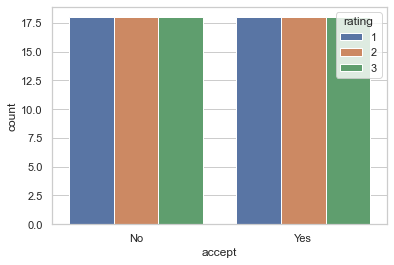

In [215]:
sns.countplot(data=manual_grouped2, x='accept', hue= 'rating');

In [213]:
manual_grouped.head(50)

reward    m_type rating accept
15076  Air Miles  Postcard      3     No
7205      Points  Postcard      2     No
7904   Air Miles  Postcard      2     No
5810      Points    Letter      1     No
8145   Cash Back    Letter      2     No
...          ...       ...    ...    ...
12831     Points    Letter      3    Yes
7487      Points    Letter      3    Yes
4761   Cash Back    Letter      2    Yes
1593      Points    Letter      3    Yes
709    Cash Back  Postcard      3    Yes

[1659 rows x 4 columns]

In [219]:
manual_grouped2.head(20)

reward    m_type income accounts  \
reward    m_type   rating accept                                          
Air Miles Letter   1      No     0  Air Miles    Letter      2        1   
                                 1  Air Miles    Letter      3        2   
                                 2  Air Miles    Letter      1        1   
                          Yes    0  Air Miles    Letter      2        1   
                                 1  Air Miles    Letter      2        1   
                                 2  Air Miles    Letter      2        1   
                   2      No     0  Air Miles    Letter      1        1   
                                 1  Air Miles    Letter      2        1   
                                 2  Air Miles    Letter      3        1   
                          Yes    0  Air Miles    Letter      2        1   
                                 1  Air Miles    Letter      3        1   
                                 2  Air Miles    Letter      2        1   
                   3      No     0  Air Miles    Letter      2        2   
                                 1  Air Miles    Letter      3        1   
                                 2  Air Miles    Letter      2        1   
                          Yes    0  Air Miles    Letter      2        1   
                                 1  Air Miles    Letter      2        1   
                                 2  Air Miles    Letter      1        1   
          Postcard 1      No     0  Air Miles  Postcard      2        1   
                                 1  Air Miles  Postcard      1        1   

                                   overdraft rating cards homes family owner  \
reward    m_type   rating accept                                               
Air Miles Letter   1      No     0        No      1     1     2      3    No   
                                 1        No      1     3     2      4    No   
                                 2       Yes      1     2     1      4    No   
                          Yes    0        No      1     1     1      1   Yes   
                                 1        No      1     2     1      2   Yes   
                                 2        No      1     1     2      4   Yes   
                   2      No     0        No      2     1     1      4   Yes   
                                 1        No      2     1     1      2   Yes   
                                 2        No      2     2     1      3   Yes   
                          Yes    0        No      2     2     2      5    No   
                                 1        No      2     1     1      3   Yes   
                                 2        No      2     2     1      2   Yes   
                   3      No     0       Yes      3     2     2      5   Yes   
                                 1        No      3     2     1      3   Yes   
                                 2        No      3     3     1      5    No   
                          Yes    0        No      3     1     1      3   Yes   
                                 1        No      3     2     2      4    No   
                                 2        No      3     2     1      5   Yes   
          Postcard 1      No     0        No      1     2     1      4   Yes   
                                 1       Yes      1     1     1      4   Yes   

                                     balance accept  
reward    m_type   rating accept                     
Air Miles Letter   1      No     0  0.279886     No  
                                 1  0.852218     No  
                                 2  0.798394     No  
                          Yes    0  0.116619    Yes  
                                 1  2.377241    Yes  
                                 2  1.564493    Yes  
                   2      No     0  0.703304     No  
                                 1  0.292445     No  
                                 2  1.175164     No  
                          Yes    

In [201]:
manual_grouped.shape

(108, 4)

In [217]:
manual_grouped2.shape

(108, 12)

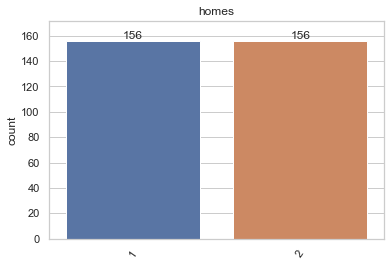

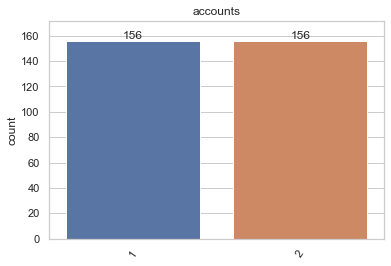

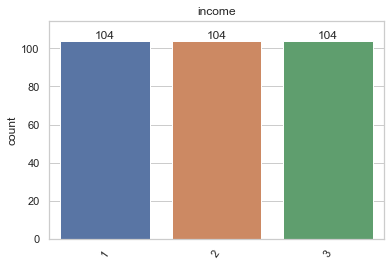

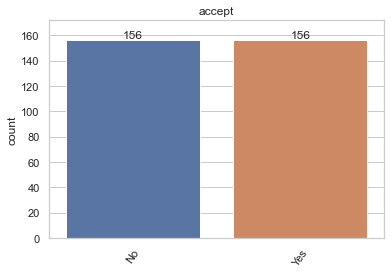

In [154]:
plotDiscrete(df_balanced)

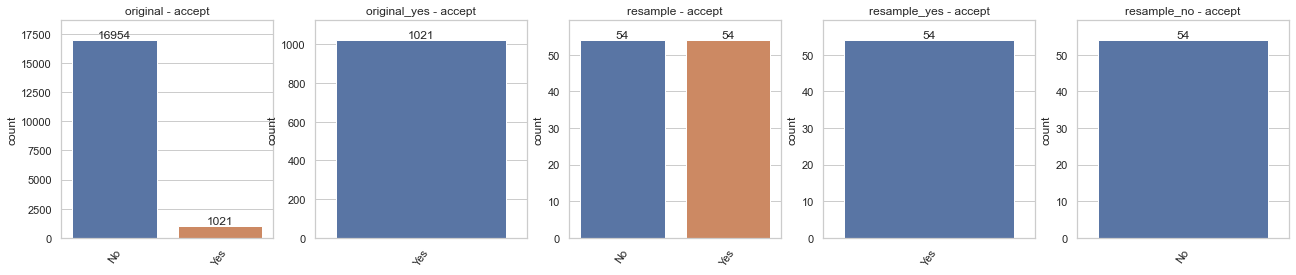

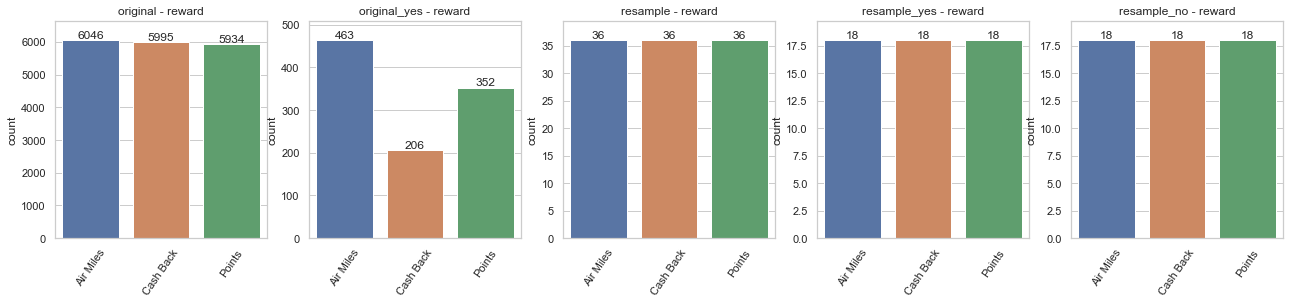

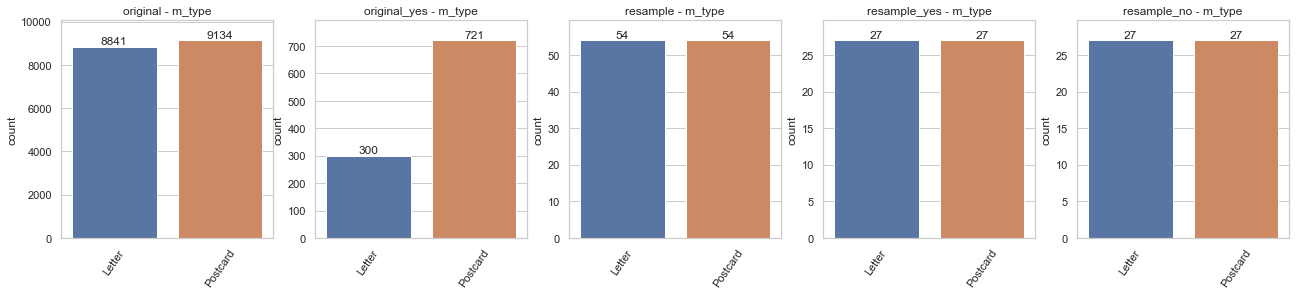

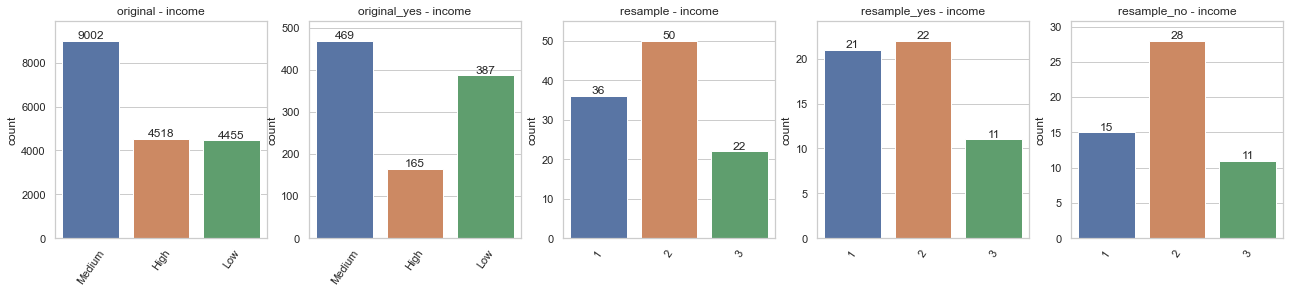

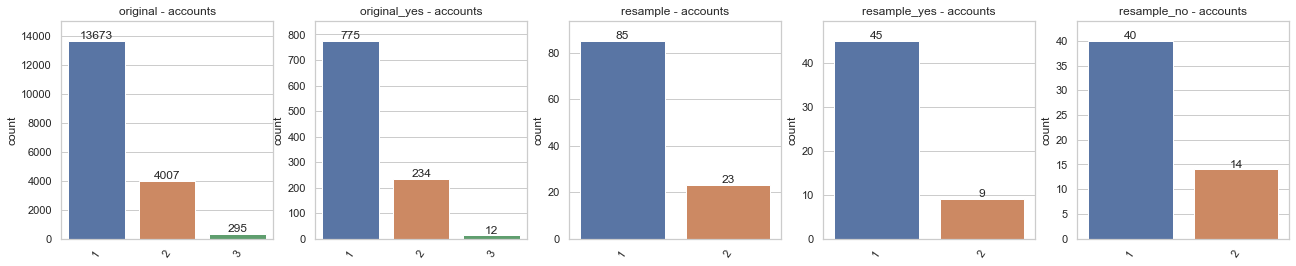

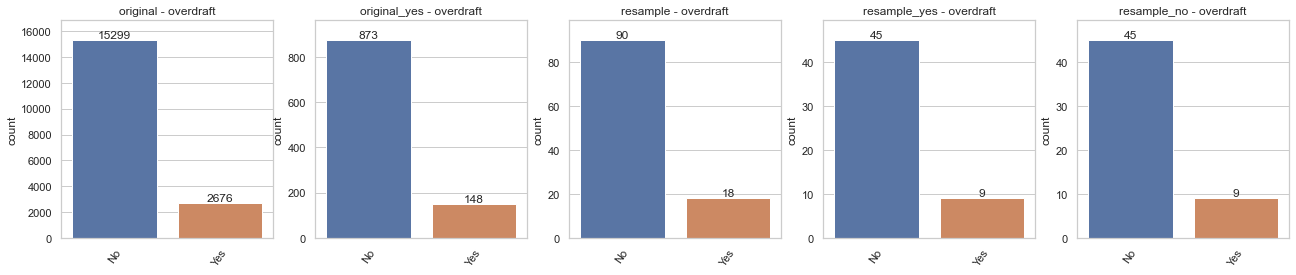

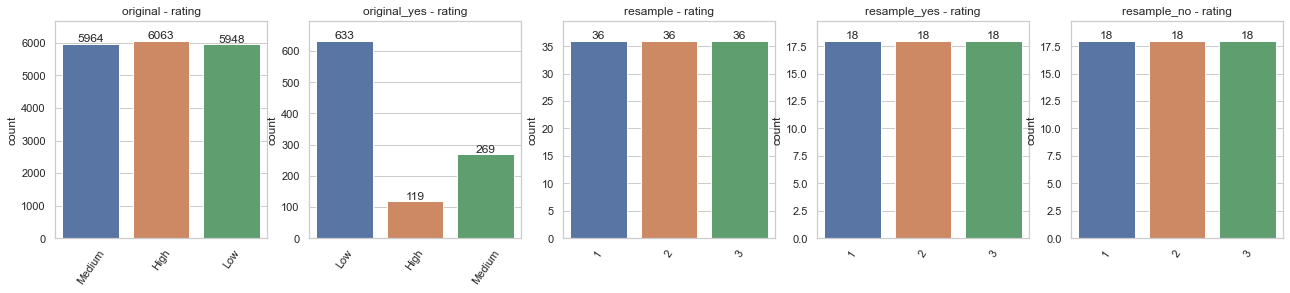

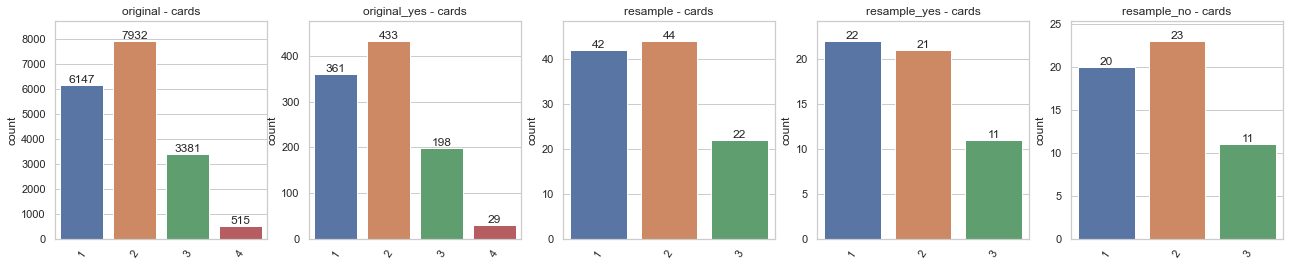

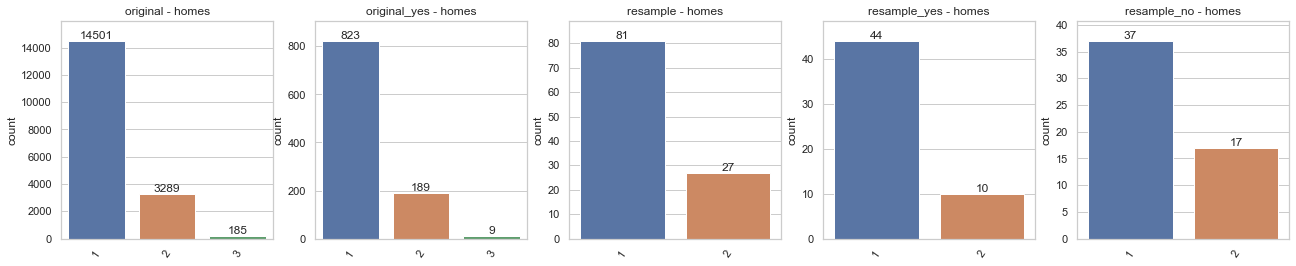

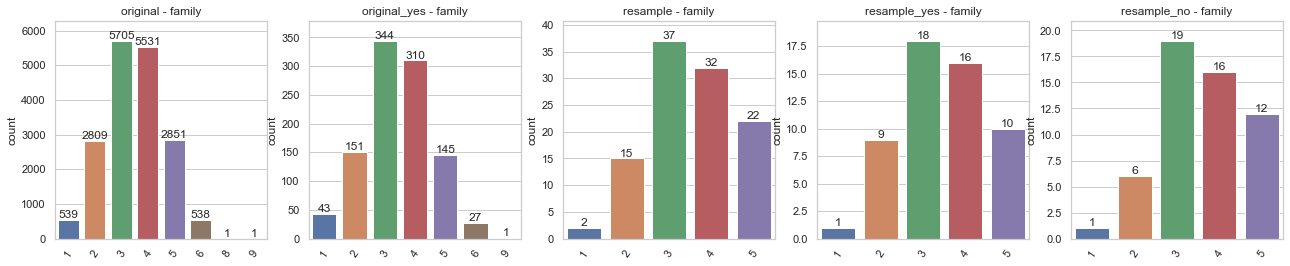

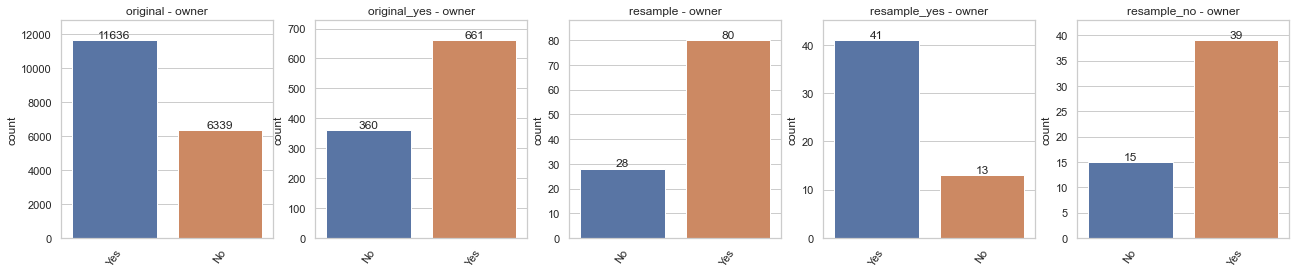

In [218]:
plotCompareResample(disc, manual_grouped2, 'accept', pos_label = 'Yes')

In [ ]:
# Split X-y train manual resampled balanced

In [230]:
X_train_mbal = manual_grouped2.iloc[:,:-1].reset_index(drop=True)

In [231]:
X_train_mbal.shape

(108, 11)

In [232]:
y_train_mbal = manual_grouped2.iloc[:,[-1]].reset_index(drop=True)

In [233]:
y_train_mbal.shape

(108, 1)

## finish preprocessing

In [234]:
X_train_mbal_p, X_test_mbal_p, y_train_mbal_p, y_test_mbal_p = preprocess(X_train_mbal, X_test, y_train_mbal, y_test)

## Manual Balanced Evaluate Logistic Regression

/Users/albertomengual/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The accuracy in the TRAIN set is: 56.5
The precision in the TRAIN set is: 55.56
The recall in the TRAIN set is: 64.81
The F1 in the TRAIN set is: 59.83
The Kappa in the TRAIN set is: 12.96

The accuracy in the TEST set is: 41.10
The precision in the TEST set is: 5.79
The recall in the TEST set is: 58.65
The F1 in the TEST set is: 10.54
The Kappa in the TEST set is: -0.26


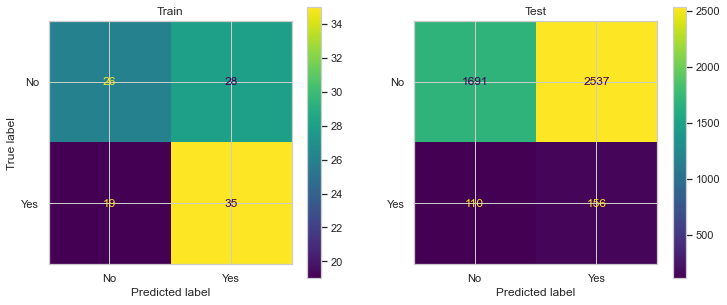

In [363]:
lr_mabl = evaluateLogistic(X_train_mbal_p, X_test_mbal_p, y_train_mbal_p, y_test_mbal_p, class_weight=None)

/Users/albertomengual/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The accuracy in the TRAIN set is: 56.5
The precision in the TRAIN set is: 55.56
The recall in the TRAIN set is: 64.81
The F1 in the TRAIN set is: 59.83
The Kappa in the TRAIN set is: 12.96

The accuracy in the TEST set is: 41.10
The precision in the TEST set is: 5.79
The recall in the TEST set is: 58.65
The F1 in the TEST set is: 10.54
The Kappa in the TEST set is: -0.26


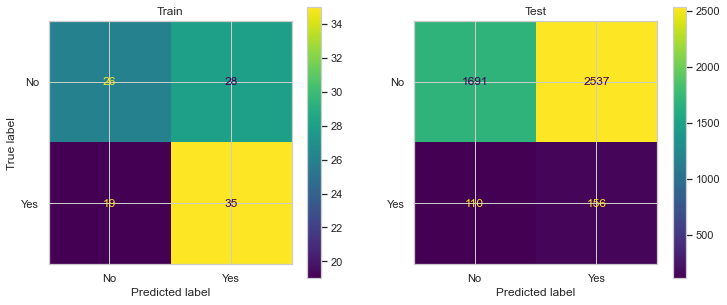

In [362]:
lr_mabl = evaluateLogistic(X_train_mbal_p, X_test_mbal_p, y_train_mbal_p, y_test_mbal_p, class_weight='balanced')

# Manual Balance 2

In [ ]:
# Firstly I am going to split by accept
# Then I am going to check the imbalanced features
# The imbalanced features in positive must be balanced in negative
# Apply feature selection???

In [ ]:
# Create a train set

In [318]:
df_train = pd.concat([X_train,y_train],axis=1)

In [ ]:
# Split positive and negative

In [320]:
positive = df_train[df_train.accept == 'Yes']
negative = df_train[df_train.accept == 'No']

In [321]:
positive.shape

(755, 12)

In [322]:
negative.shape

(12724, 12)

In [ ]:
# Features to balance in negative
# imbalance_columns

In [332]:
f2bal = ['reward', 'm_type', 'income','rating']
f2bal2 = list(disc.columns[1:])

In [ ]:
# Group negative by imbalanced columns

In [323]:
negative_group = negative.groupby(f2bal)

In [ ]:
# Select samples of each grouped feature with the same number of observations per imbalance_class
# each x seems to be a grouped series

In [324]:
negative_group = negative_group.apply(lambda x: x.sample(negative_group.size().min())).reset_index(drop=True)

In [325]:
negative_group

reward    m_type income accounts overdraft rating cards homes family  \
0     Air Miles    Letter      1        2       Yes      1     2     1      3   
1     Air Miles    Letter      1        2        No      1     1     1      4   
2     Air Miles    Letter      1        2        No      1     1     2      3   
3     Air Miles    Letter      1        1        No      1     2     1      2   
4     Air Miles    Letter      1        1        No      1     3     1      5   
...         ...       ...    ...      ...       ...    ...   ...   ...    ...   
7663     Points  Postcard      3        1        No      3     2     1      4   
7664     Points  Postcard      3        1       Yes      3     1     1      5   
7665     Points  Postcard      3        1       Yes      3     2     1      5   
7666     Points  Postcard      3        1        No      3     2     1      5   
7667     Points  Postcard      3        1        No      3     2     2      4   

     owner   balance accept  
0      Yes  3.262869     No  
1      Yes  3.894624     No  
2      Yes  1.593745     No  
3      Yes  0.364336     No  
4      Yes  1.360426     No  
...    ...       ...    ...  
7663   Yes  0.574322     No  
7664   Yes  3.440550     No  
7665   Yes  0.330235     No  
7666   Yes  1.213256     No  
7667   Yes  0.147170     No  

[7668 rows x 12 columns]

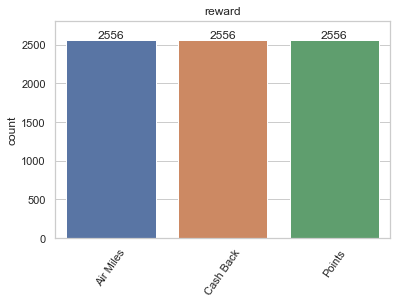

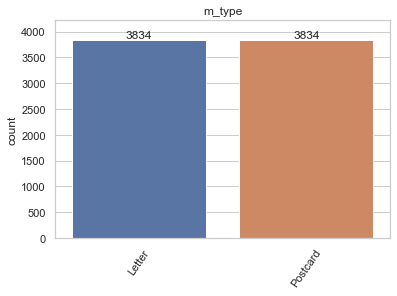

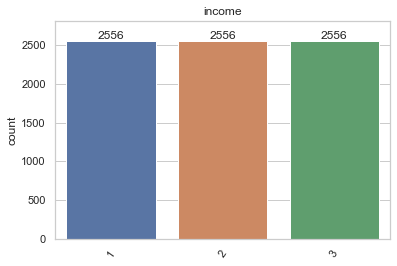

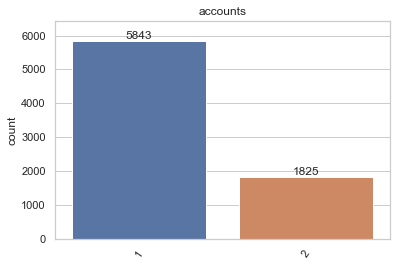

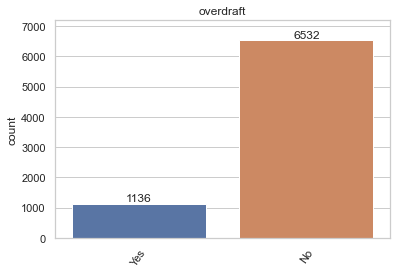

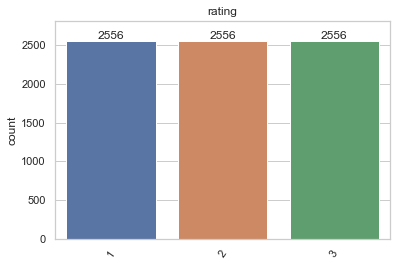

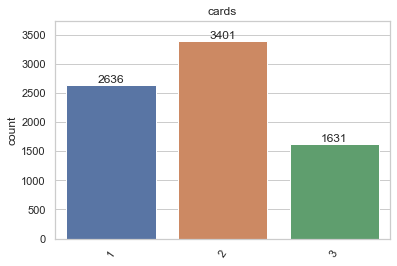

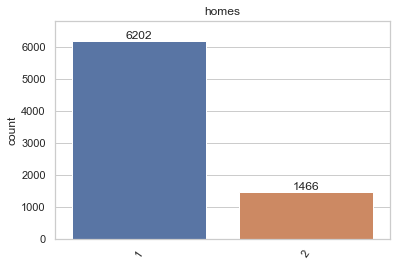

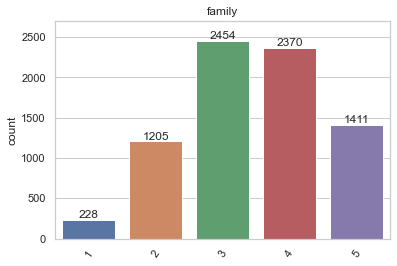

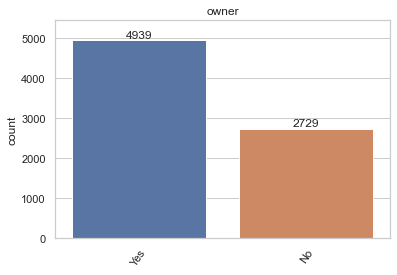

In [326]:
plotDiscrete(negative_group.iloc[:,:-2])

In [ ]:
# Let's try with all the discrete columns

In [335]:
negative_group2 = negative.groupby(f2bal2)

In [336]:
negative_group2 = negative_group2.apply(lambda x: x.sample(negative_group2.size().min())).reset_index(drop=True)
# KeyboardInterrupt

KeyboardInterrupt: 

In [ ]:
negative_group2

In [337]:
train_resampled = pd.concat([positive, negative_group], axis = 0)

In [338]:
train_resampled.shape

(8423, 12)

In [339]:
train_resampled.isna().sum()

reward       0
m_type       0
income       0
accounts     0
overdraft    0
rating       0
cards        0
homes        0
family       0
owner        0
balance      0
accept       0
dtype: int64

In [340]:
train_resampled.head()

reward    m_type income accounts overdraft rating cards homes  \
7552   Air Miles  Postcard      2        1        No      1     2     1   
7093      Points  Postcard      2        1        No      1     3     2   
11859  Cash Back  Postcard      1        2        No      1     1     1   
13373  Cash Back  Postcard      2        1        No      1     1     1   
11218  Cash Back  Postcard      2        1       Yes      1     2     2   

      family owner   balance accept  
7552       5    No  2.282932    Yes  
7093       3   Yes  2.738800    Yes  
11859      2   Yes  2.071150    Yes  
13373      2   Yes  0.285366    Yes  
11218      4    No  0.890200    Yes

## Plots

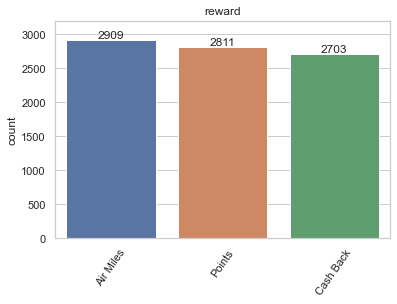

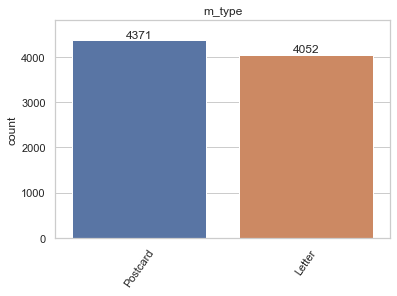

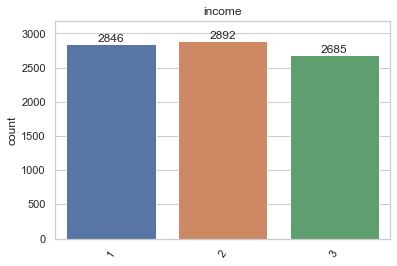

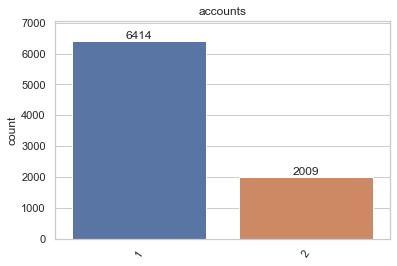

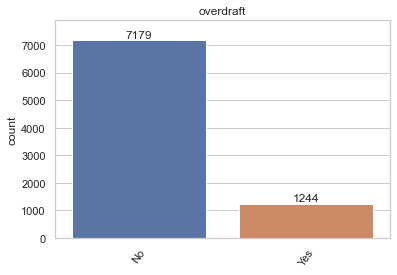

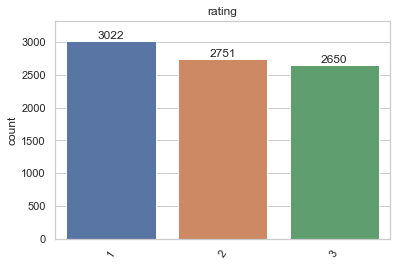

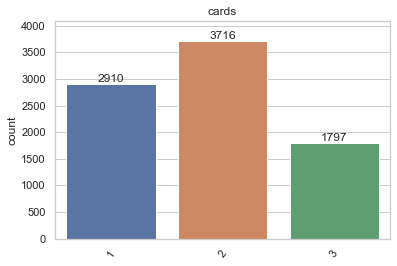

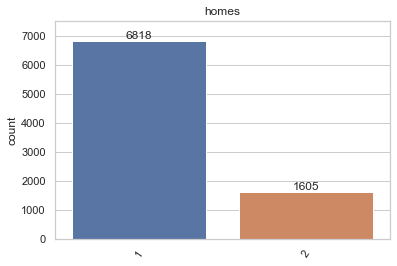

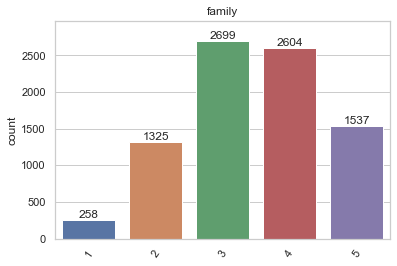

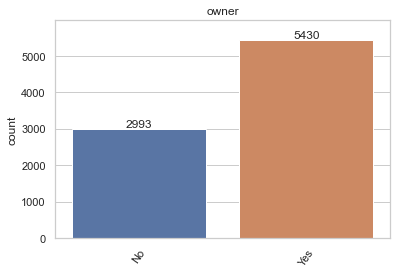

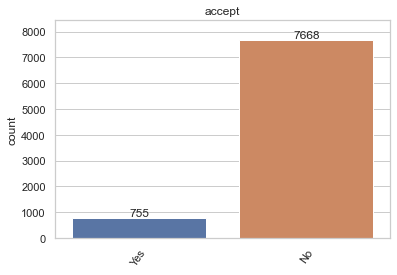

In [345]:
plotDiscrete(train_resampled.drop(columns='balance')) # .iloc[:,:-2+-1]

In [ ]:
# plotCompareResample

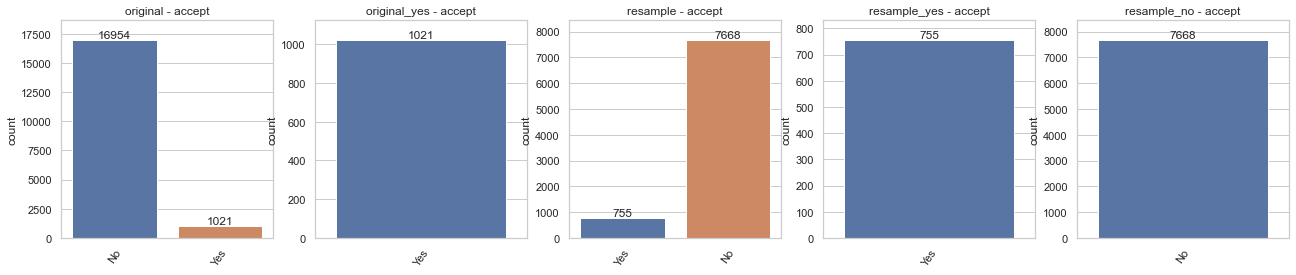

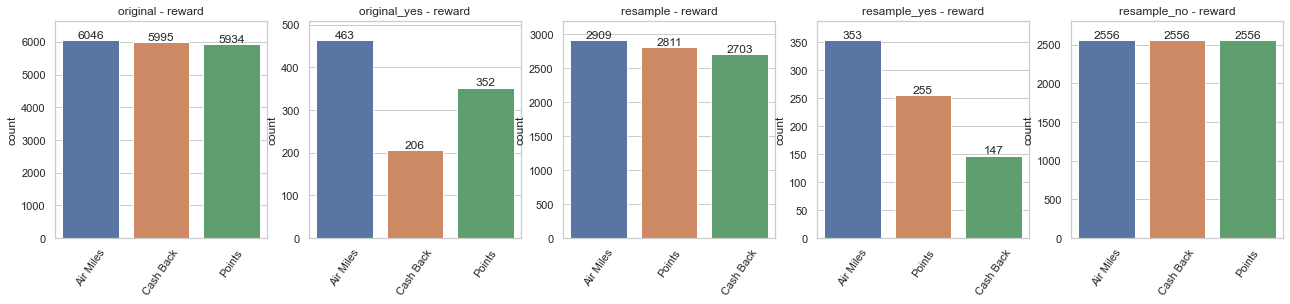

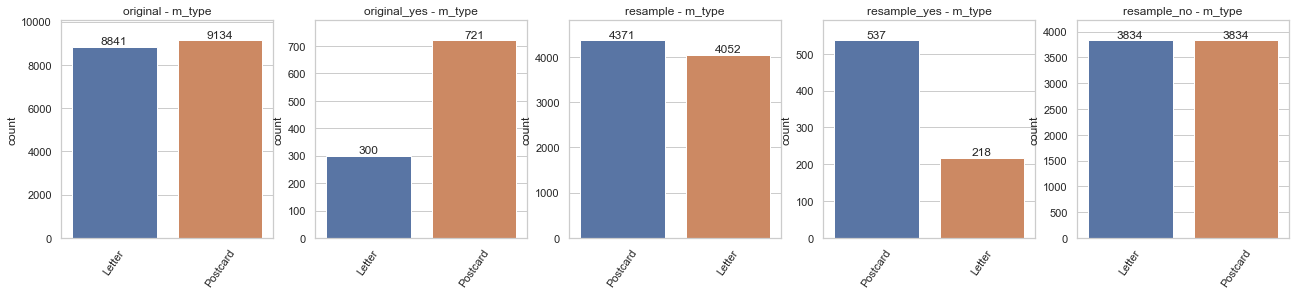

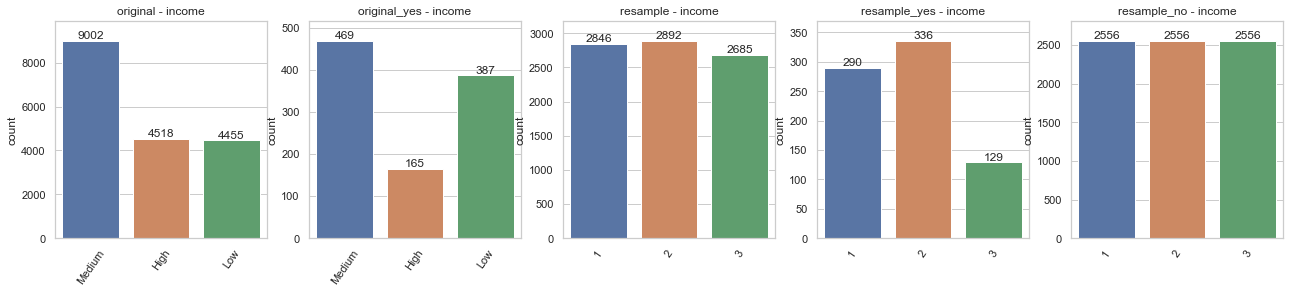

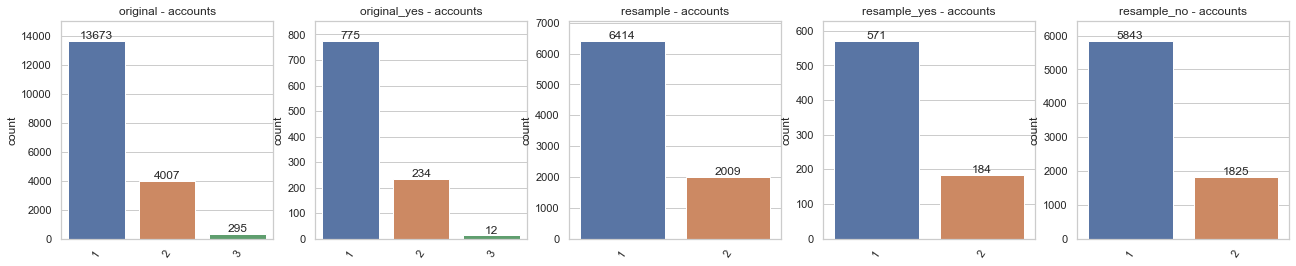

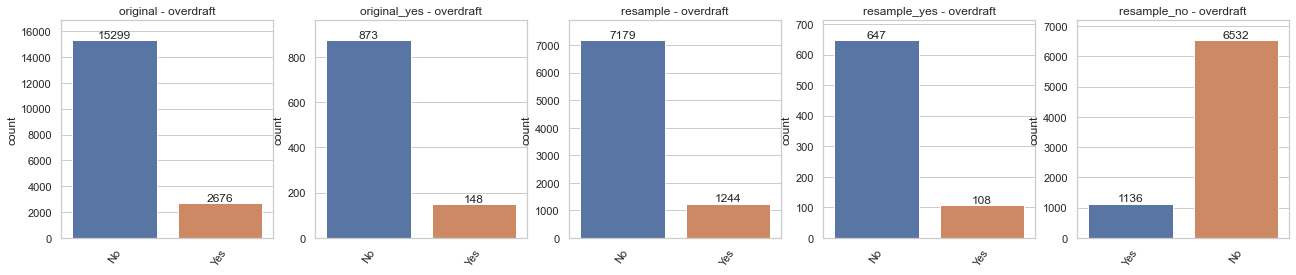

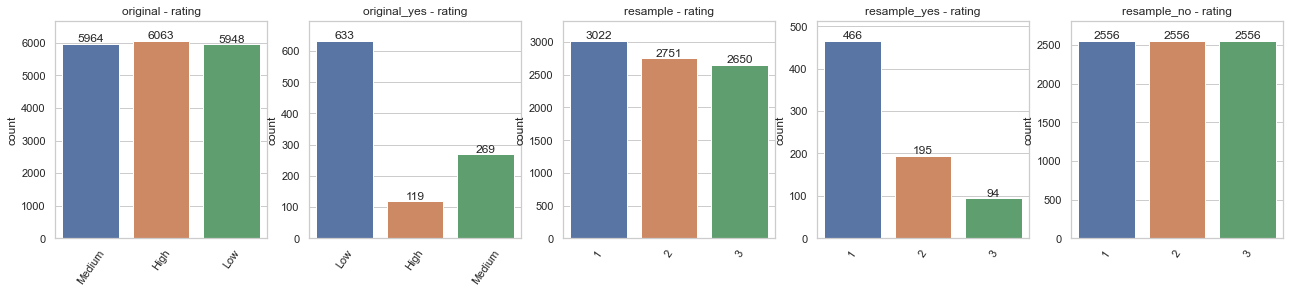

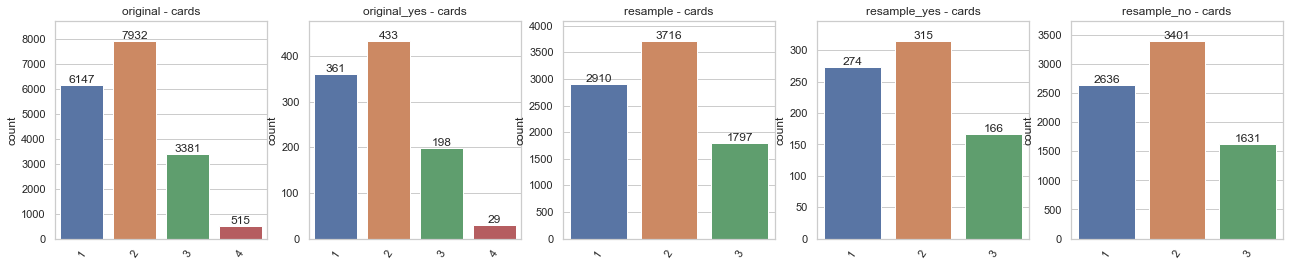

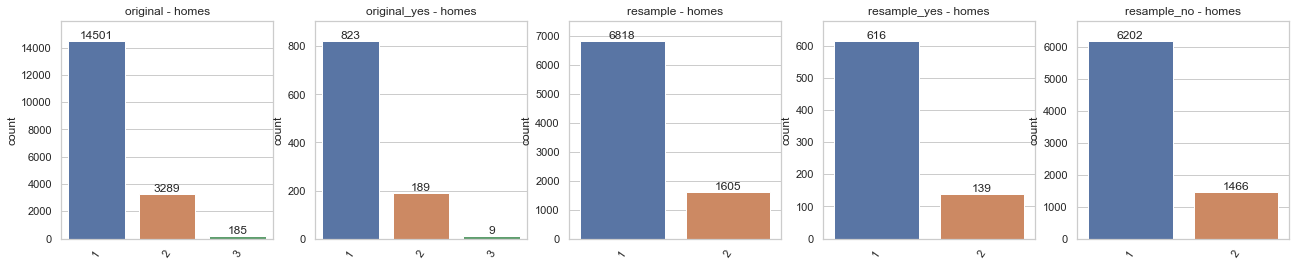

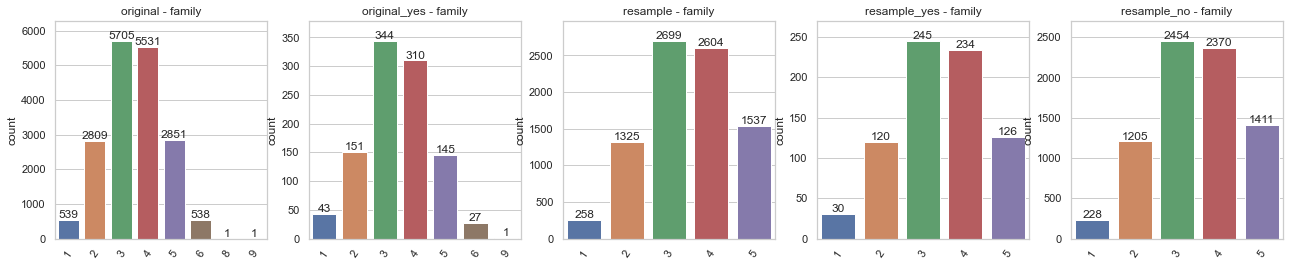

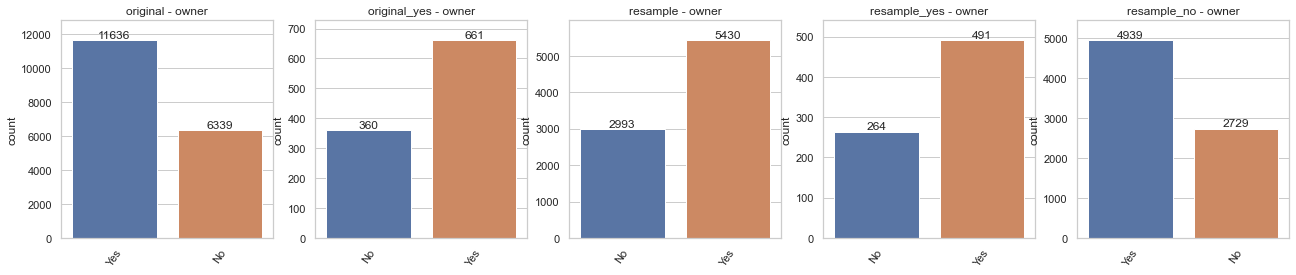

In [354]:
plotCompareResample(disc, train_resampled[disc.columns], 'accept')

In [ ]:
# plot continuous

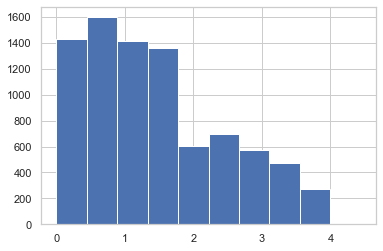

In [361]:
train_resampled.balance.hist();

sns.histplot(x='balance',data=train_resampled, kde=True)
plt.title('balance')
plt.xlabel(None)
plt.tick_params(axis='balance', labelrotation=55)
plt.show()
ValueError: cannot reindex from a duplicate axis

## preprocess

In [ ]:
# Split X-y train resampled

In [346]:
X_train_res = train_resampled.iloc[:,:-1]

In [347]:
y_train_res = train_resampled.accept

In [ ]:
# preprocess

In [350]:
X_train_res_p, X_test_res_p, y_train_res_p, y_test_res_p = preprocess(X_train_res, X_test, y_train_res, y_test)



## Evaluate lr_res

The accuracy in the TRAIN set is: 91.0
The precision in the TRAIN set is: 0.00
The recall in the TRAIN set is: 0.00
The F1 in the TRAIN set is: 0.00
The Kappa in the TRAIN set is: 0.00

The accuracy in the TEST set is: 94.08


/Users/albertomengual/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/albertomengual/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The precision in the TEST set is: 0.00
The recall in the TEST set is: 0.00
The F1 in the TEST set is: 0.00
The Kappa in the TEST set is: 0.00


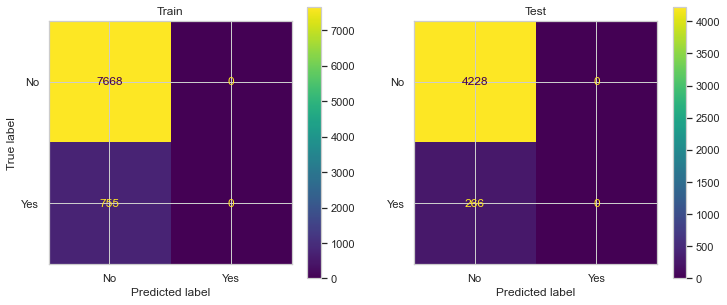

In [351]:
lr_res = evaluateLogistic(X_train_res_p, X_test_res_p, y_train_res_p, y_test_res_p, class_weight=None)

The accuracy in the TRAIN set is: 66.0
The precision in the TRAIN set is: 16.86
The recall in the TRAIN set is: 71.13
The F1 in the TRAIN set is: 27.26
The Kappa in the TRAIN set is: 14.93

The accuracy in the TEST set is: 66.42
The precision in the TEST set is: 11.52
The recall in the TEST set is: 69.92
The F1 in the TEST set is: 19.78
The Kappa in the TEST set is: 10.70


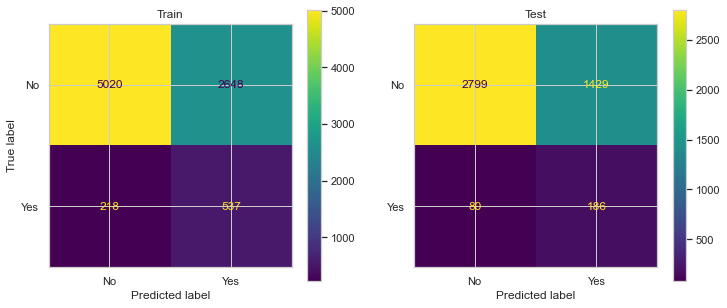

In [353]:
lr_res_balanced = evaluateLogistic(X_train_res_p, X_test_res_p, y_train_res_p, y_test_res_p, class_weight='balanced')

# Random Over Sampler

In [ ]:
# Over the manually resampled 2
# X_train_res, y_train_res 

In [385]:
X_train_res

reward    m_type income accounts overdraft rating cards homes  \
7552   Air Miles  Postcard      2        1        No      1     2     1   
7093      Points  Postcard      2        1        No      1     3     2   
11859  Cash Back  Postcard      1        2        No      1     1     1   
13373  Cash Back  Postcard      2        1        No      1     1     1   
11218  Cash Back  Postcard      2        1       Yes      1     2     2   
...          ...       ...    ...      ...       ...    ...   ...   ...   
7663      Points  Postcard      3        1        No      3     2     1   
7664      Points  Postcard      3        1       Yes      3     1     1   
7665      Points  Postcard      3        1       Yes      3     2     1   
7666      Points  Postcard      3        1        No      3     2     1   
7667      Points  Postcard      3        1        No      3     2     2   

      family owner   balance  
7552       5    No  2.275338  
7093       3   Yes  2.729690  
11859      2   Yes  2.064261  
13373      2   Yes  0.284417  
11218      4    No  0.887239  
...      ...   ...       ...  
7663       4   Yes  0.572412  
7664       5   Yes  3.429106  
7665       5   Yes  0.329137  
7666       5   Yes  1.209221  
7667       4   Yes  0.146681  

[8423 rows x 11 columns]

In [ ]:
# Oversampling

In [387]:
ros = RandomOverSampler(sampling_strategy= 0.5, random_state=0)

In [388]:
X_train_ros, y_train_ros = ros.fit_resample(X_train_res, y_train_res)

In [389]:
X_train_ros

reward    m_type income accounts overdraft rating cards homes  \
0      Air Miles  Postcard      2        1        No      1     2     1   
1         Points  Postcard      2        1        No      1     3     2   
2      Cash Back  Postcard      1        2        No      1     1     1   
3      Cash Back  Postcard      2        1        No      1     1     1   
4      Cash Back  Postcard      2        1       Yes      1     2     2   
...          ...       ...    ...      ...       ...    ...   ...   ...   
11497     Points  Postcard      3        1        No      3     2     2   
11498     Points  Postcard      2        1        No      3     1     1   
11499     Points  Postcard      1        1       Yes      1     1     1   
11500     Points  Postcard      2        1        No      2     2     2   
11501  Air Miles  Postcard      1        1        No      3     2     1   

      family owner   balance  
0          5    No  2.275338  
1          3   Yes  2.729690  
2          2   Yes  2.064261  
3          2   Yes  0.284417  
4          4    No  0.887239  
...      ...   ...       ...  
11497      4   Yes  1.776266  
11498      2   Yes  0.917648  
11499      5    No  1.110837  
11500      3   Yes  0.999932  
11501      3    No  0.747713  

[11502 rows x 11 columns]

## Plots

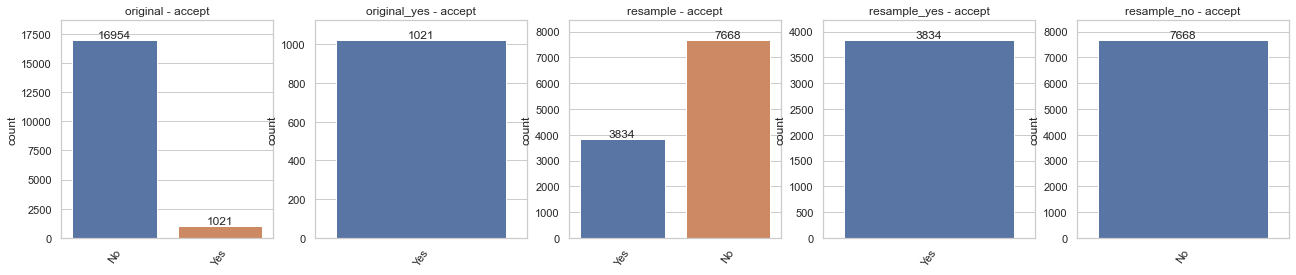

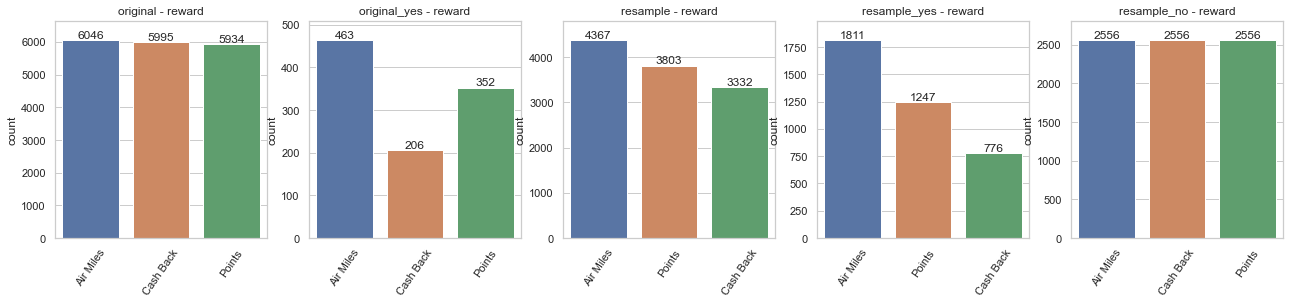

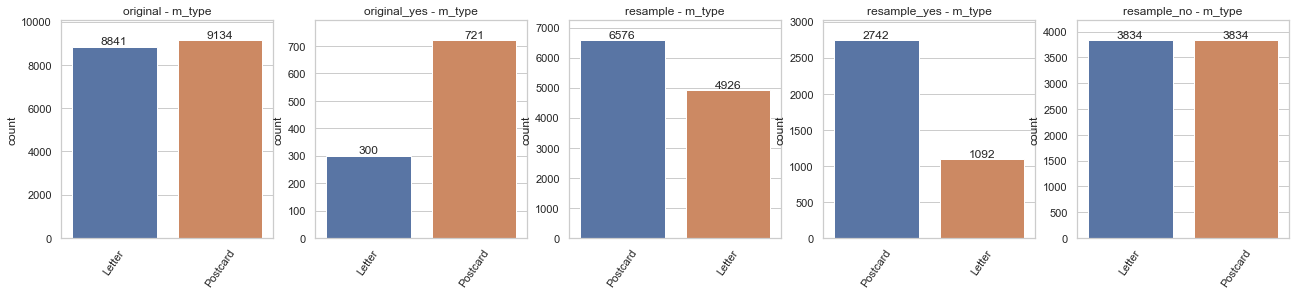

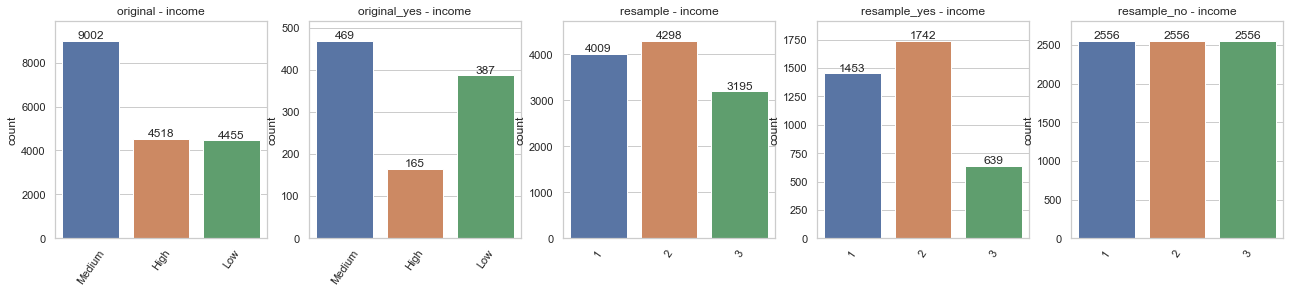

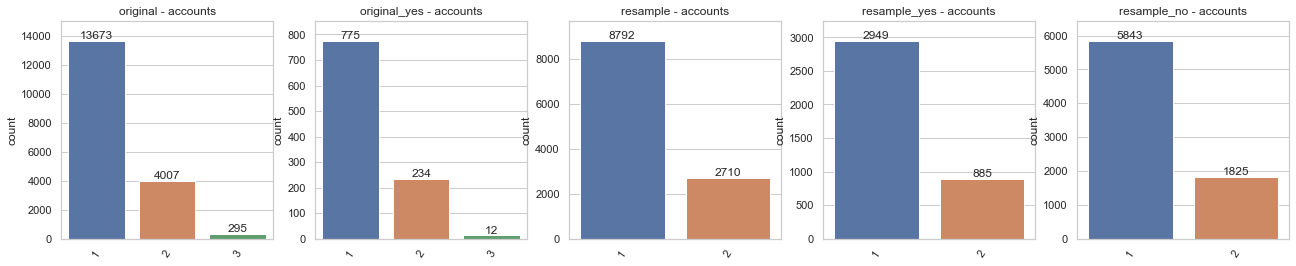

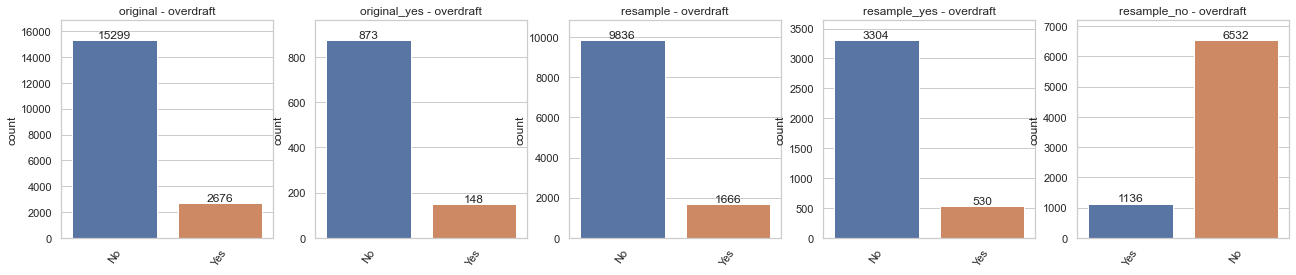

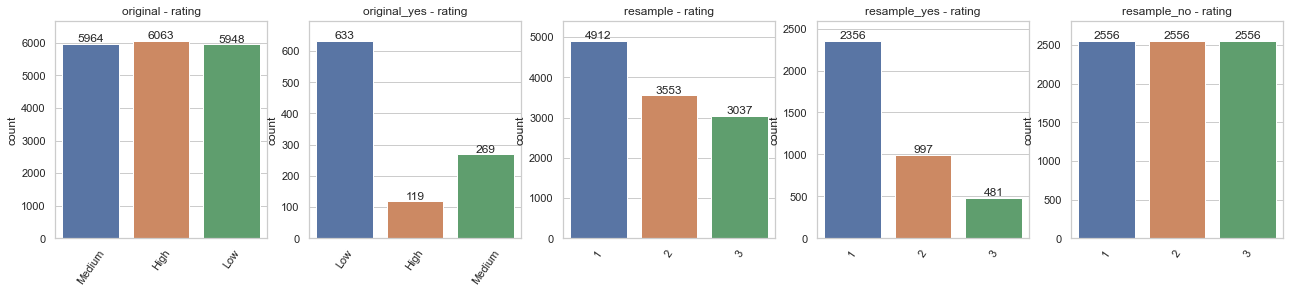

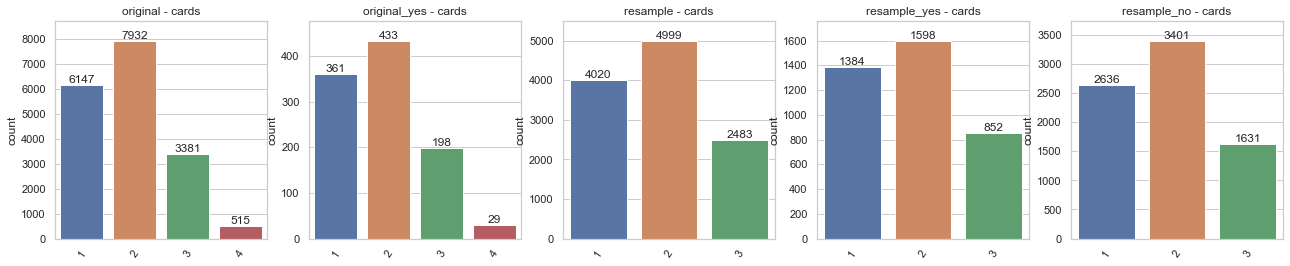

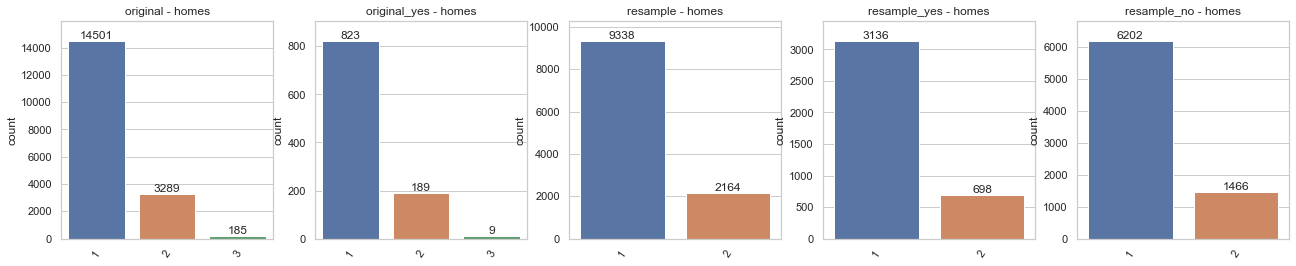

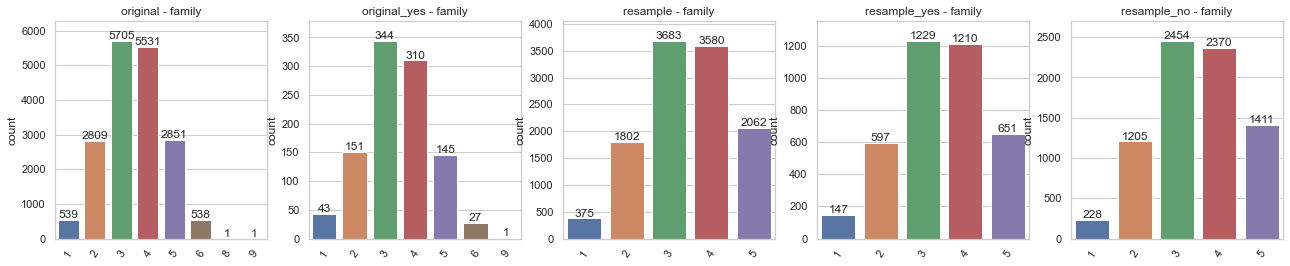

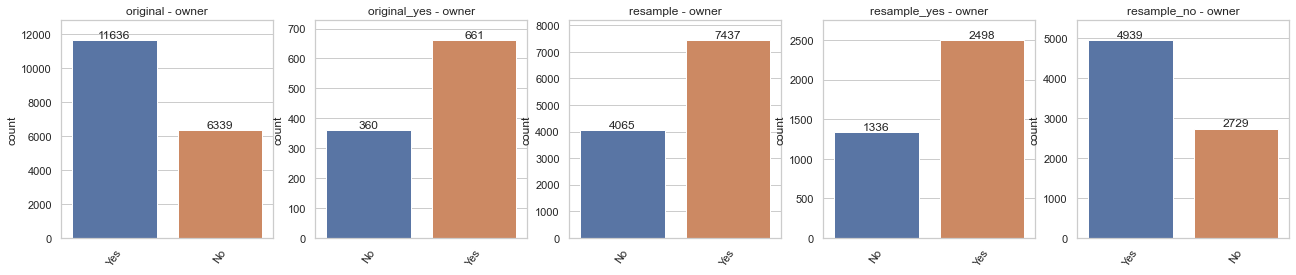

In [390]:
plotCompareResample(disc, pd.concat([X_train_ros,y_train_ros], axis=1)[disc.columns], 'accept')

In [391]:
# Bug
plotContinuous(X_train_ros.balance)

AttributeError: 'Series' object has no attribute 'columns'

In [ ]:
# Preprocess

In [396]:
X_train_ros_p, X_test_ros_p, y_train_ros_p, y_test_ros_p = preprocess(X_train_ros, X_test, y_train_ros, y_test)

## Logistic Regression on ros

The accuracy in the TRAIN set is: 69.4
The precision in the TRAIN set is: 56.34
The recall in the TRAIN set is: 36.96
The F1 in the TRAIN set is: 44.64
The Kappa in the TRAIN set is: 24.77

The accuracy in the TEST set is: 84.89
The precision in the TEST set is: 16.96
The recall in the TEST set is: 39.85
The F1 in the TEST set is: 23.79
The Kappa in the TEST set is: 16.89


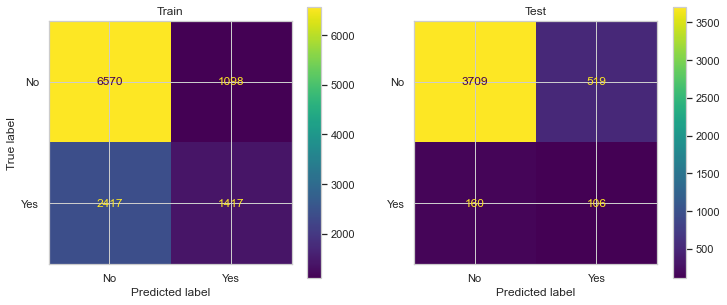

In [397]:
lr_ros = evaluateLogistic(X_train_ros_p, X_test_ros_p, y_train_ros_p, y_test_ros_p, class_weight=None)

The accuracy in the TRAIN set is: 67.7
The precision in the TRAIN set is: 51.10
The recall in the TRAIN set is: 71.41
The F1 in the TRAIN set is: 59.57
The Kappa in the TRAIN set is: 33.88

The accuracy in the TEST set is: 66.82
The precision in the TEST set is: 11.45
The recall in the TEST set is: 68.42
The F1 in the TEST set is: 19.62
The Kappa in the TEST set is: 10.55


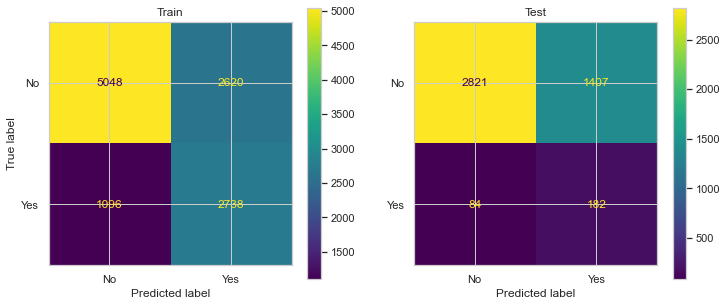

In [398]:
lr_ros_balanced = evaluateLogistic(X_train_ros_p, X_test_ros_p, y_train_ros_p, y_test_ros_p, class_weight='balanced')

## KNN Classifier ros

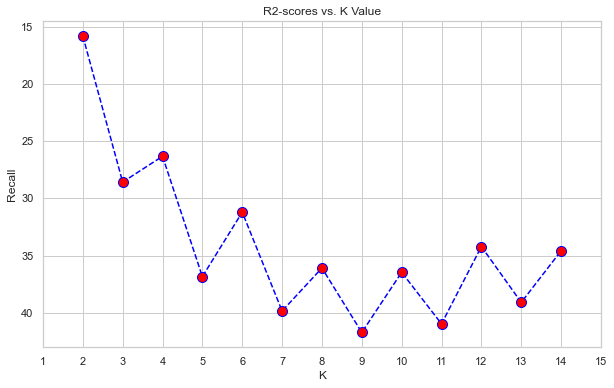

In [399]:
elbowClassifier(X_train_ros_p, X_test_ros_p, y_train_ros_p, y_test_ros_p)

In [400]:
clf_ros = KNeighborsClassifier(n_neighbors=7)
clf_ros.fit(X_train_ros_p, y_train_ros_p)
y_pred_train_clf_ros = clf_ros.predict(X_train_ros_p)
y_pred_test_clf_ros = clf_ros.predict(X_test_ros_p)
train_score_clf_ros = clf_ros.score(X_train_ros_p, y_train_ros_p)

The accuracy in the TRAIN set is: 94.4
The precision in the TRAIN set is: 71.98
The recall in the TRAIN set is: 92.93
The F1 in the TRAIN set is: 81.12
The Kappa in the TRAIN set is: 69.77

The accuracy in the TEST set is: 74.88
The precision in the TEST set is: 9.86
The recall in the TEST set is: 39.85
The F1 in the TEST set is: 15.81
The Kappa in the TEST set is: 6.98


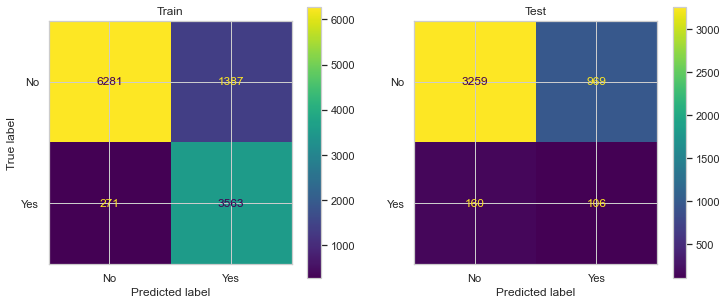

In [401]:
classifierMetrics(clf_ros, y_train_ros_p, y_test_ros_p, y_pred_train_clf_ros, y_pred_test_clf_ros)

# AllKnn undersampling

In [ ]:
# it requires encoding

## Processing

In [242]:
# Done above
# X_train_p, X_test_p, y_train_p, y_test_p = preprocess(X_train, X_test, y_train, y_test)

In [122]:
X_train_p.head()

balance  income  accounts  rating  cards  homes  family  reward_Cash Back  \
0  0.400500     0.0       0.0     0.5    0.0    0.0    0.75               0.0   
1  0.381443     0.0       0.0     1.0    0.0    0.0    0.75               1.0   
2  0.102156     0.5       0.0     0.0    0.5    0.0    1.00               0.0   
3  0.454233     0.5       1.0     0.5    0.5    0.0    0.75               1.0   
4  0.135895     0.5       0.0     0.0    0.5    0.0    0.50               0.0   

   reward_Points  m_type_Postcard  overdraft_Yes  owner_Yes  
0            0.0              1.0            0.0        1.0  
1            0.0              1.0            0.0        0.0  
2            1.0              1.0            0.0        0.0  
3            0.0              1.0            0.0        1.0  
4            1.0              0.0            0.0        1.0

In [123]:
y_train_p.head()

7175     No
6165     No
11252    No
11893    No
13645    No
Name: accept, dtype: object

In [124]:
X_train_p.dtypes

balance             float64
income              float64
accounts            float64
rating              float64
cards               float64
homes               float64
family              float64
reward_Cash Back    float64
reward_Points       float64
m_type_Postcard     float64
overdraft_Yes       float64
owner_Yes           float64
dtype: object

In [125]:
for c in X_train_p.columns:
    print(X_train_p[c].nunique(), c)

2149 balance
3 income
2 accounts
3 rating
3 cards
2 homes
5 family
2 reward_Cash Back
2 reward_Points
2 m_type_Postcard
2 overdraft_Yes
2 owner_Yes


In [126]:
y_train_p

7175     No
6165     No
11252    No
11893    No
13645    No
         ..
9237     No
13140    No
9857     No
10812    No
2733     No
Name: accept, Length: 13481, dtype: object

In [127]:
discrete_processed = pd.concat([y_train_p, X_train_p.loc[:,'income':'owner_Yes']],axis=1)

In [ ]:
# plot processed

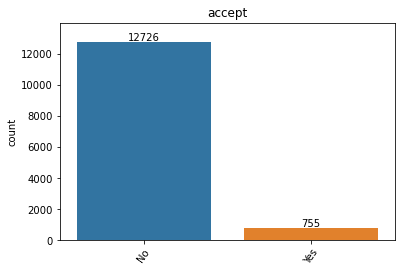

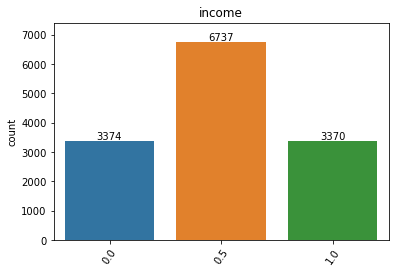

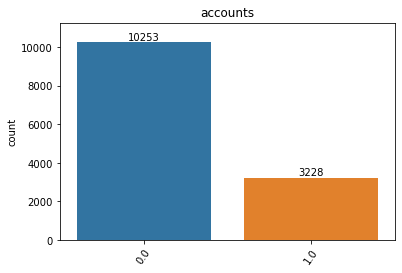

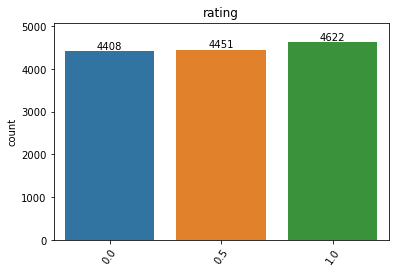

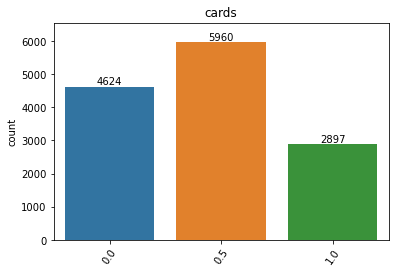

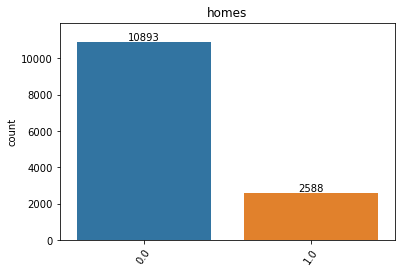

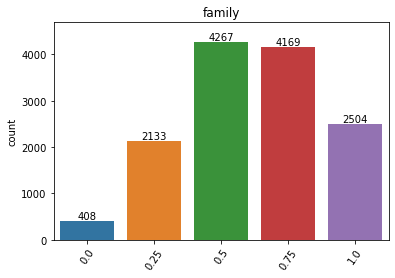

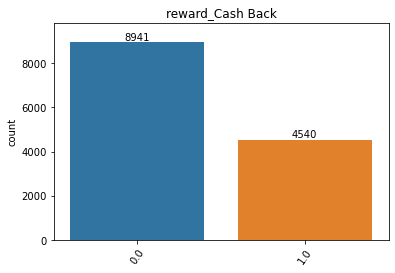

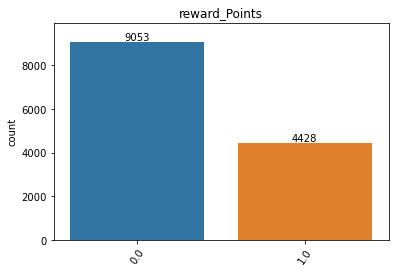

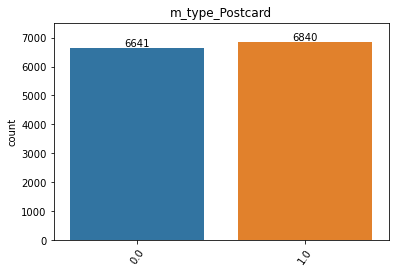

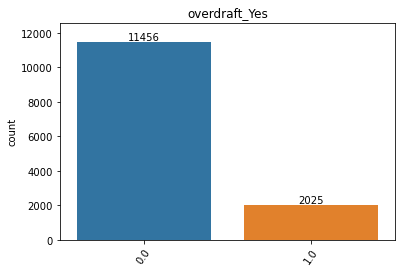

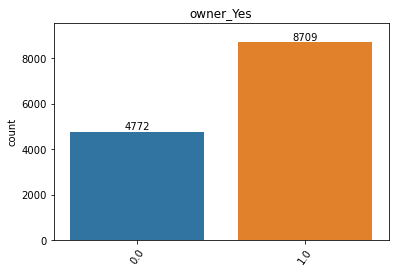

In [128]:
plotDiscrete(discrete_processed)

## AllKNN Undersampling

In [129]:
allknn = AllKNN(n_neighbors=15)

In [130]:
X_train_ak, y_train_ak = allknn.fit_resample(X_train_p, y_train_p)

In [131]:
X_train_ak.shape

(5526, 12)

In [132]:
X_train_ak.head()

balance  income  accounts  rating  cards  homes  family  reward_Cash Back  \
0  0.381443     0.0       0.0     1.0    0.0    0.0    0.75               1.0   
1  0.454233     0.5       1.0     0.5    0.5    0.0    0.75               1.0   
2  0.451421     1.0       1.0     0.5    0.5    0.0    0.00               1.0   
3  0.419869     0.5       0.0     1.0    0.5    0.0    0.50               1.0   
4  0.106529     0.0       1.0     1.0    0.5    0.0    0.75               1.0   

   reward_Points  m_type_Postcard  overdraft_Yes  owner_Yes  
0            0.0              1.0            0.0        0.0  
1            0.0              1.0            0.0        1.0  
2            0.0              0.0            1.0        1.0  
3            0.0              0.0            0.0        0.0  
4            0.0              0.0            0.0        1.0

In [141]:
resample_ak_discrete = pd.concat([y_train_ak, X_train_ak.loc[:,'income':'owner_Yes']],axis=1)

In [142]:
resample_ak_discrete

accept  income  accounts  rating  cards  homes  family  reward_Cash Back  \
0        No     0.0       0.0     1.0    0.0    0.0    0.75               1.0   
1        No     0.5       1.0     0.5    0.5    0.0    0.75               1.0   
2        No     1.0       1.0     0.5    0.5    0.0    0.00               1.0   
3        No     0.5       0.0     1.0    0.5    0.0    0.50               1.0   
4        No     0.0       1.0     1.0    0.5    0.0    0.75               1.0   
...     ...     ...       ...     ...    ...    ...     ...               ...   
5521    Yes     0.5       1.0     0.5    0.0    0.0    0.75               0.0   
5522    Yes     0.5       0.0     0.0    0.5    1.0    0.50               0.0   
5523    Yes     0.0       1.0     0.0    0.5    1.0    0.75               0.0   
5524    Yes     0.0       0.0     0.0    0.0    1.0    1.00               1.0   
5525    Yes     0.5       0.0     0.5    0.5    0.0    0.75               0.0   

      reward_Points  m_type_Postcard  overdraft_Yes  owner_Yes  
0               0.0              1.0            0.0        0.0  
1               0.0              1.0            0.0        1.0  
2               0.0              0.0            1.0        1.0  
3               0.0              0.0            0.0        0.0  
4               0.0              0.0            0.0        1.0  
...             ...              ...            ...        ...  
5521            0.0              0.0            0.0        1.0  
5522            0.0              0.0            0.0        1.0  
5523            0.0              1.0            0.0        1.0  
5524            0.0              0.0            0.0        0.0  
5525            1.0              1.0            0.0        0.0  

[5526 rows x 12 columns]

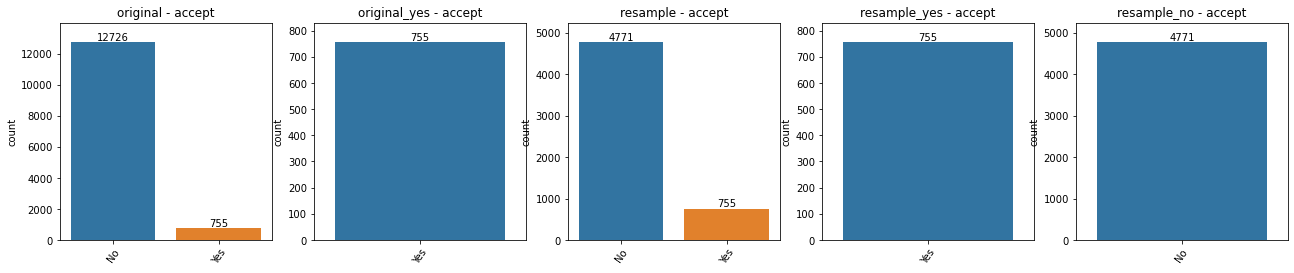

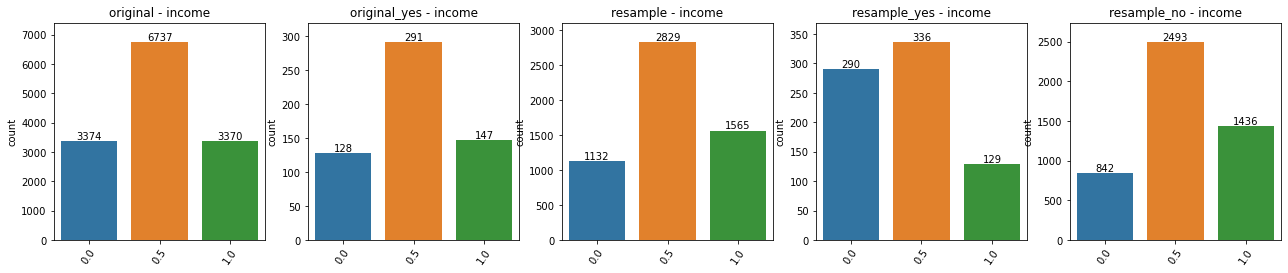

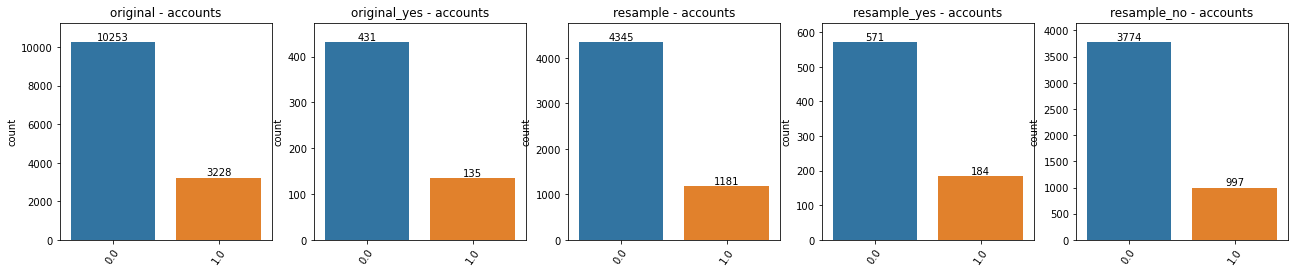

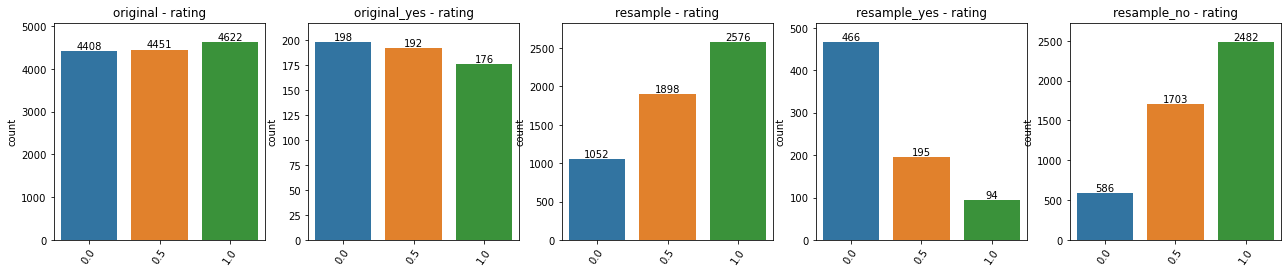

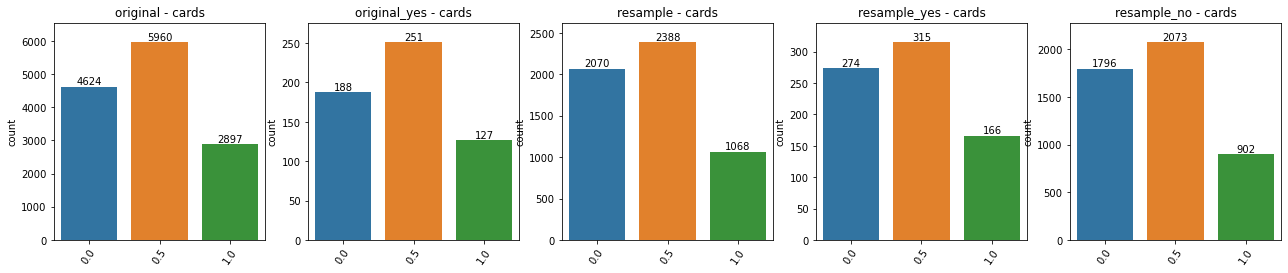

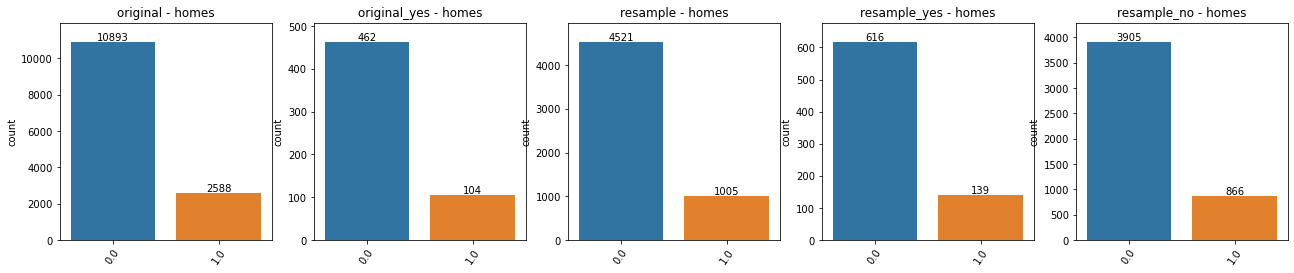

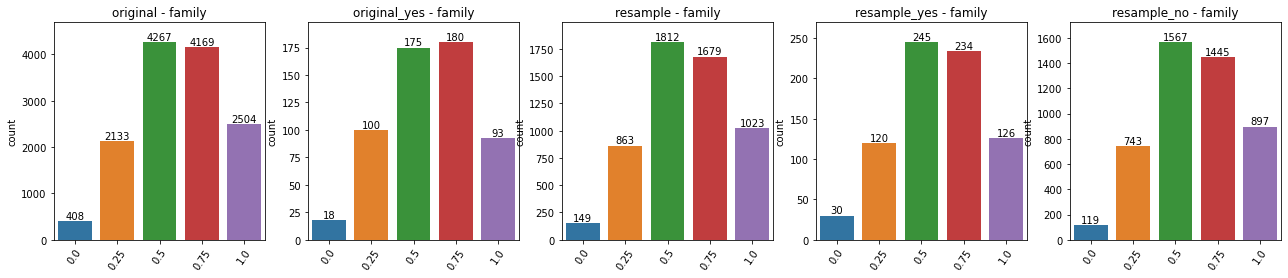

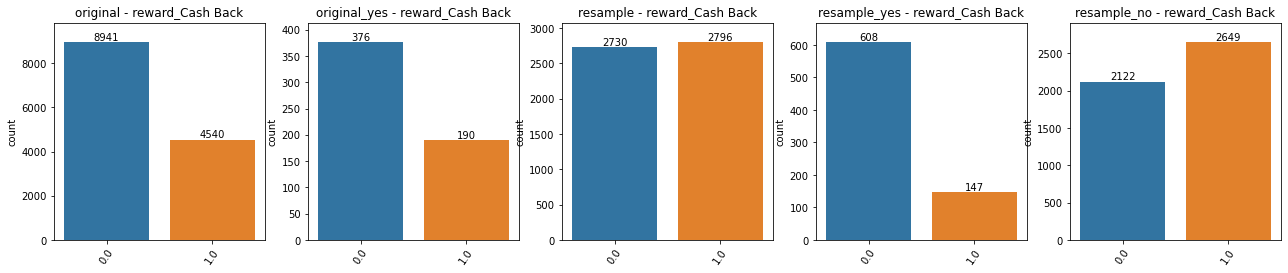

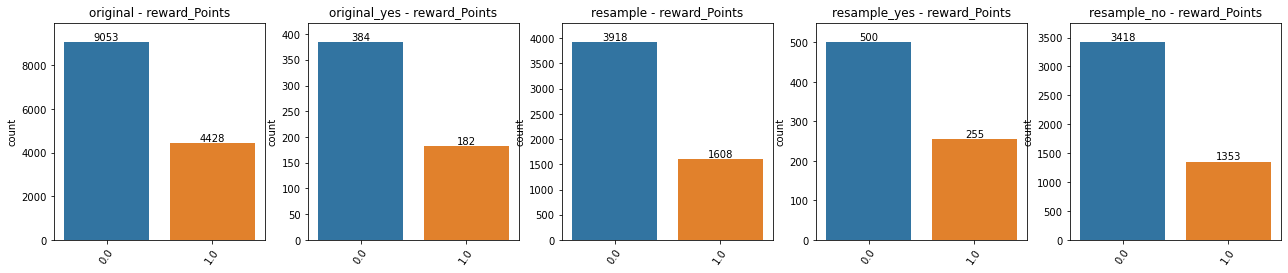

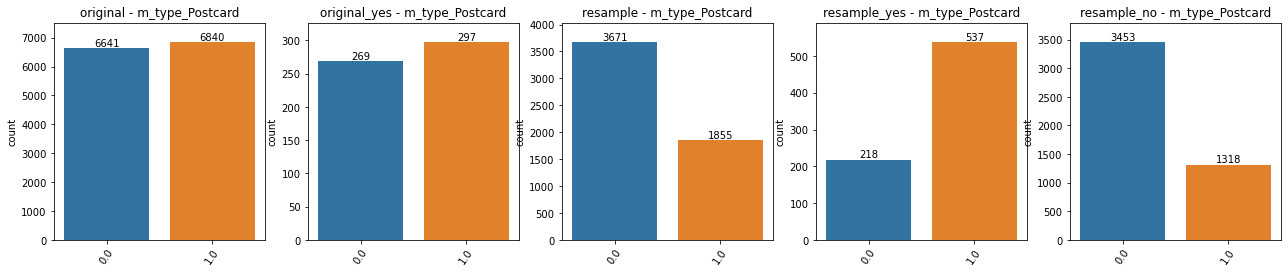

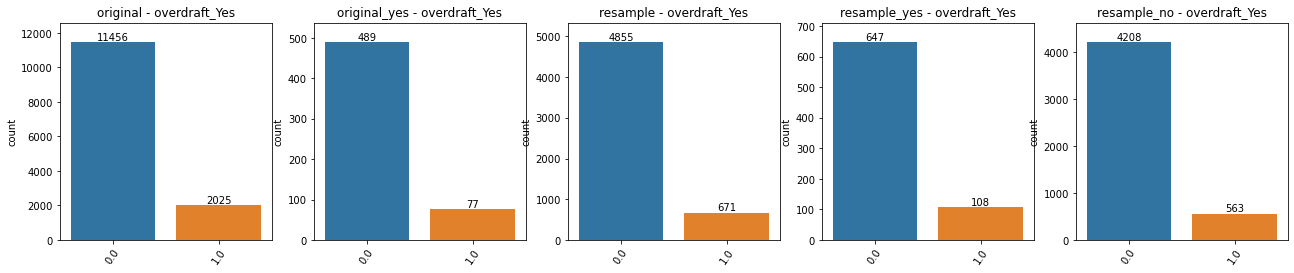

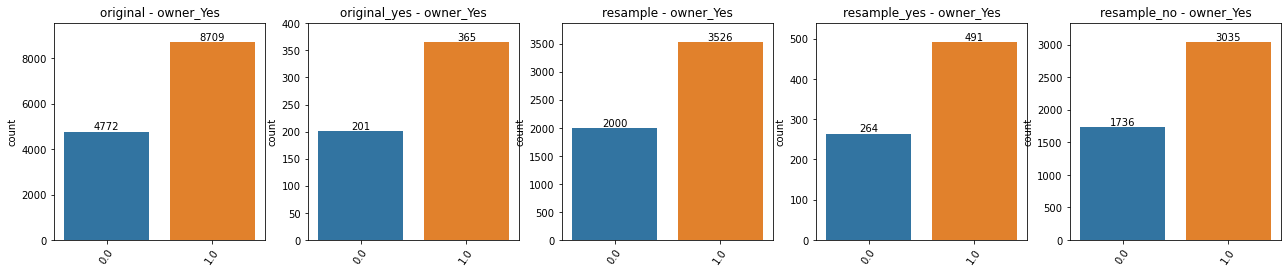

In [143]:
plotCompareResample(discrete_processed, resample_ak_discrete, 'accept')

## AllKNN resample LR Evaluation

The accuracy in the TRAIN set is: 92.2
The precision in the TRAIN set is: 77.99
The recall in the TRAIN set is: 59.60
The F1 in the TRAIN set is: 67.57
The Kappa in the TRAIN set is: 63.21

The accuracy in the TEST set is: 73.39
The precision in the TEST set is: 12.44
The recall in the TEST set is: 57.89
The F1 in the TEST set is: 20.48
The Kappa in the TEST set is: 11.89


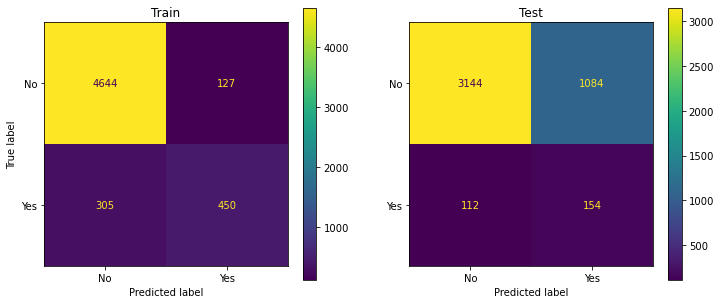

In [137]:
lr_ak = evaluateLogistic(X_train_ak, X_test_p, y_train_ak, y_test_p)

## AllKNN resample - LR balanced Evaluation

The accuracy in the TRAIN set is: 87.7
The precision in the TRAIN set is: 52.97
The recall in the TRAIN set is: 86.09
The F1 in the TRAIN set is: 65.59
The Kappa in the TRAIN set is: 58.58

The accuracy in the TEST set is: 51.62
The precision in the TEST set is: 9.47
The recall in the TEST set is: 83.83
The F1 in the TEST set is: 17.02
The Kappa in the TEST set is: 7.15


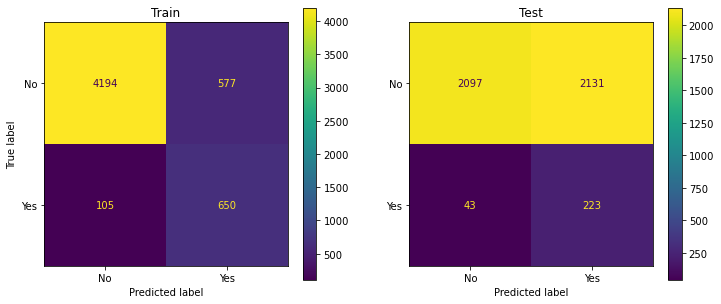

In [138]:
lr_ak_balanced = evaluateLogistic(X_train_ak, X_test_p, y_train_ak, y_test_p, class_weight='balanced')

## KNN Classifier

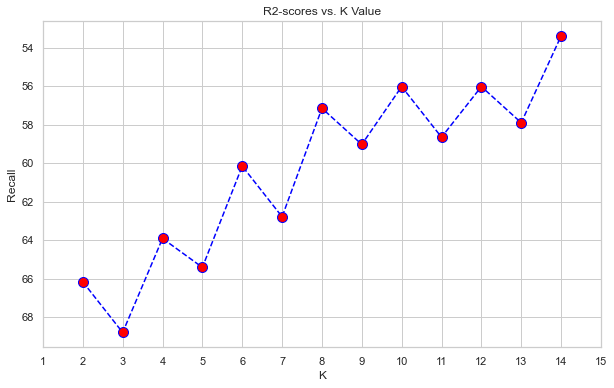

In [377]:
elbowClassifier(X_train_ak, X_test_p, y_train_ak, y_test_p)

In [378]:
cls_ak = KNeighborsClassifier(n_neighbors=3)
cls_ak.fit(X_train_ak, y_train_ak)
y_pred_train_cls_ak = cls_ak.predict(X_train_ak)
y_pred_test_cls_ak = cls_ak.predict(X_test_p)
train_score_cls_ak = cls_ak.score(X_train_ak, y_train_ak)

The accuracy in the TRAIN set is: 94.4
The precision in the TRAIN set is: 100.00
The recall in the TRAIN set is: 89.14
The F1 in the TRAIN set is: 94.26
The Kappa in the TRAIN set is: 93.38

The accuracy in the TEST set is: 57.77
The precision in the TEST set is: 9.16
The recall in the TEST set is: 68.80
The F1 in the TEST set is: 16.17
The Kappa in the TEST set is: 6.39


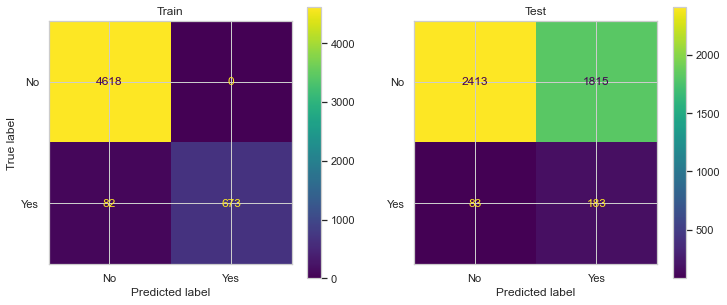

In [379]:
classifierMetrics(cls_ak, y_train_ak, y_test_p, y_pred_train_cls_ak, y_pred_test_cls_ak)

## Random Forest

In [381]:
# Ajustar el clasificador  Random Forest en el Conjunto de Entrenamiento
rf_ak = RandomForestClassifier(n_estimators = 10, criterion = "entropy", random_state = 0)
rf_ak.fit(X_train_ak, y_train_ak)



RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [382]:
# Predicción de los resultados con el Conjunto de Testing
y_pred_test_rf_ak  = rf_ak.predict(X_test_p)
y_pred_train_rf_ak  = rf_ak.predict(X_train_ak)

The accuracy in the TRAIN set is: 94.4
The precision in the TRAIN set is: 100.00
The recall in the TRAIN set is: 96.95
The F1 in the TRAIN set is: 98.45
The Kappa in the TRAIN set is: 98.20

The accuracy in the TEST set is: 62.06
The precision in the TEST set is: 9.83
The recall in the TEST set is: 66.17
The F1 in the TEST set is: 17.11
The Kappa in the TEST set is: 7.59


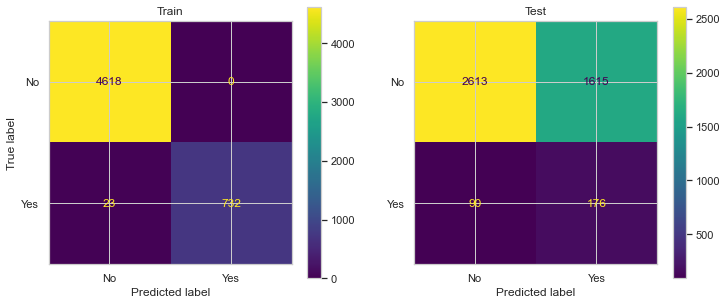

In [383]:
classifierMetrics(rf_ak, y_train_ak, y_test_p, y_pred_train_rf_ak, y_pred_test_rf_ak)

# Results AllKNN

In [139]:
X_test

reward    m_type income accounts overdraft rating cards homes  \
10162  Air Miles    Letter      3        1        No      1     1     1   
14730     Points  Postcard      1        1        No      1     2     1   
15798     Points  Postcard      3        1        No      3     2     2   
6200      Points    Letter      2        1        No      3     2     1   
12510  Cash Back    Letter      1        1        No      3     2     1   
...          ...       ...    ...      ...       ...    ...   ...   ...   
15592     Points  Postcard      3        1        No      2     2     1   
7865      Points    Letter      2        1        No      3     2     2   
2916   Air Miles  Postcard      2        1        No      3     2     1   
2228   Air Miles    Letter      1        1        No      3     2     1   
6537   Cash Back  Postcard      1        1        No      1     3     1   

      family owner   balance  
10162      2    No  0.832326  
14730      5    No  1.515261  
15798      2    No  1.015509  
6200       4   Yes  0.764744  
12510      5   Yes  1.495698  
...      ...   ...       ...  
15592      5   Yes  2.625029  
7865       2   Yes  2.512985  
2916       5   Yes  2.833111  
2228       5   Yes  3.594298  
6537       5   Yes  0.597568  

[4494 rows x 11 columns]

In [ ]:
# Evaluate Resample Imbalance
# Evaluate X_test with results

## Class imbalance in resample

In [145]:
resample_ak = pd.concat([y_train_ak, X_train_ak],axis=1)

In [146]:
resample_ak

accept   balance  income  accounts  rating  cards  homes  family  \
0        No  0.381443     0.0       0.0     1.0    0.0    0.0    0.75   
1        No  0.454233     0.5       1.0     0.5    0.5    0.0    0.75   
2        No  0.451421     1.0       1.0     0.5    0.5    0.0    0.00   
3        No  0.419869     0.5       0.0     1.0    0.5    0.0    0.50   
4        No  0.106529     0.0       1.0     1.0    0.5    0.0    0.75   
...     ...       ...     ...       ...     ...    ...    ...     ...   
5521    Yes  0.201812     0.5       1.0     0.5    0.0    0.0    0.75   
5522    Yes  0.166823     0.5       0.0     0.0    0.5    1.0    0.50   
5523    Yes  0.214933     0.0       1.0     0.0    0.5    1.0    0.75   
5524    Yes  0.420181     0.0       0.0     0.0    0.0    1.0    1.00   
5525    Yes  0.495158     0.5       0.0     0.5    0.5    0.0    0.75   

      reward_Cash Back  reward_Points  m_type_Postcard  overdraft_Yes  \
0                  1.0            0.0              1.0            0.0   
1                  1.0            0.0              1.0            0.0   
2                  1.0            0.0              0.0            1.0   
3                  1.0            0.0              0.0            0.0   
4                  1.0            0.0              0.0            0.0   
...                ...            ...              ...            ...   
5521               0.0            0.0              0.0            0.0   
5522               0.0            0.0              0.0            0.0   
5523               0.0            0.0              1.0            0.0   
5524               1.0            0.0              0.0            0.0   
5525               0.0            1.0              1.0            0.0   

      owner_Yes  
0           0.0  
1           1.0  
2           1.0  
3           0.0  
4           1.0  
...         ...  
5521        1.0  
5522        1.0  
5523        1.0  
5524        0.0  
5525        0.0  

[5526 rows x 13 columns]

## Save resample to csv

In [163]:
# resample_ak.to_csv('../datasets/resample_ak.csv')

In [147]:
# Count acceptance
resample_count = resample_ak.accept.value_counts()
resample_count

No     4771
Yes     755
Name: accept, dtype: int64

In [148]:
# Percentage of acceptance
100*(resample_count/len(resample_ak))

No     86.337315
Yes    13.662685
Name: accept, dtype: float64

In [149]:
print("The class imbalance ratio is: {:.2f}".format((resample_count[0]-resample_count[1])/(resample_count[0]+resample_count[1])))



The class imbalance ratio is: 0.73


## EDA Results

In [151]:
y_pred_results = lr_ak_balanced.predict(X_test_p)
y_pred_results

array(['Yes', 'Yes', 'No', ..., 'Yes', 'No', 'Yes'], dtype=object)

In [153]:
len(y_pred_results) == len(X_test)

True

In [156]:
X_test.index

Int64Index([10162, 14730, 15798,  6200, 12510, 14152,  9641,  3602,  6191,
            12371,
            ...
            12599,  5996, 15587, 11677, 13731, 15592,  7865,  2916,  2228,
             6537],
           dtype='int64', length=4494)

In [157]:
X_test_indices = X_test.index
X_test_indices

Int64Index([10162, 14730, 15798,  6200, 12510, 14152,  9641,  3602,  6191,
            12371,
            ...
            12599,  5996, 15587, 11677, 13731, 15592,  7865,  2916,  2228,
             6537],
           dtype='int64', length=4494)

In [158]:
X_test_resutls = X_test.reset_index()
X_test_resutls.index

RangeIndex(start=0, stop=4494, step=1)

In [159]:
#y_pred_results.index

AttributeError: 'numpy.ndarray' object has no attribute 'index'

In [172]:
test_results = pd.concat([X_test_resutls, pd.Series(y_pred_results)], axis=1).rename(columns={0:'accept'})\
.set_index(X_test_indices)
test_results

index     reward    m_type income accounts overdraft rating cards  \
10162  10162  Air Miles    Letter      3        1        No      1     1   
14730  14730     Points  Postcard      1        1        No      1     2   
15798  15798     Points  Postcard      3        1        No      3     2   
6200    6200     Points    Letter      2        1        No      3     2   
12510  12510  Cash Back    Letter      1        1        No      3     2   
...      ...        ...       ...    ...      ...       ...    ...   ...   
15592  15592     Points  Postcard      3        1        No      2     2   
7865    7865     Points    Letter      2        1        No      3     2   
2916    2916  Air Miles  Postcard      2        1        No      3     2   
2228    2228  Air Miles    Letter      1        1        No      3     2   
6537    6537  Cash Back  Postcard      1        1        No      1     3   

      homes family owner   balance accept  
10162     1      2    No  0.832326    Yes  
14730     1      5    No  1.515261    Yes  
15798     2      2    No  1.015509     No  
6200      1      4   Yes  0.764744     No  
12510     1      5   Yes  1.495698     No  
...     ...    ...   ...       ...    ...  
15592     1      5   Yes  2.625029    Yes  
7865      2      2   Yes  2.512985     No  
2916      1      5   Yes  2.833111    Yes  
2228      1      5   Yes  3.594298     No  
6537      1      5   Yes  0.597568    Yes  

[4494 rows x 13 columns]

### Save test results to csv

In [173]:
#test_results.to_csv('../datasets/test_results.csv')

### Plots EDA results

In [ ]:
# Count

In [174]:
for c in test_results.columns:
    print(test_results[c].nunique(), c)

4494 index
3 reward
2 m_type
3 income
2 accounts
2 overdraft
3 rating
3 cards
2 homes
5 family
2 owner
1767 balance
2 accept


In [175]:
results_cont, results_disc = continuous_discrete(test_results)

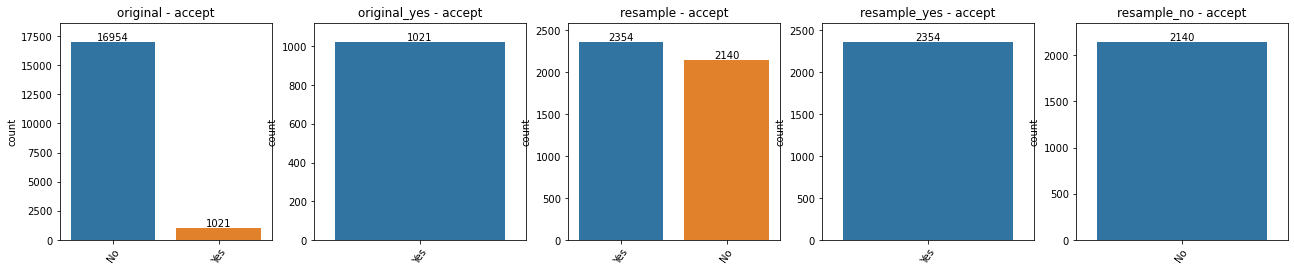

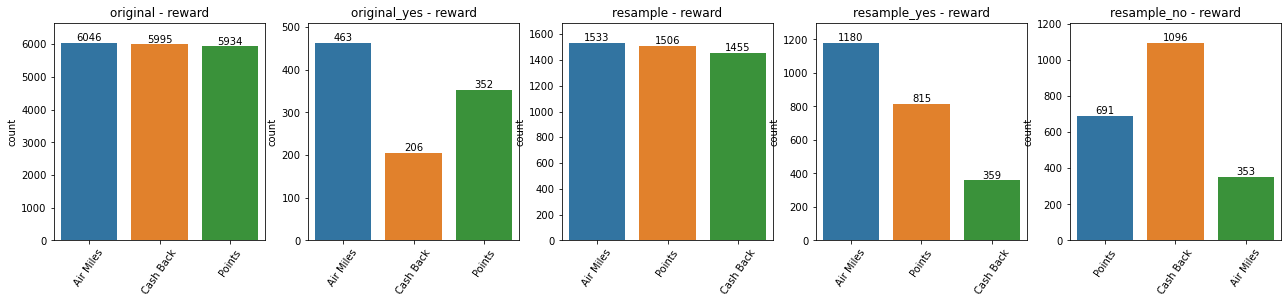

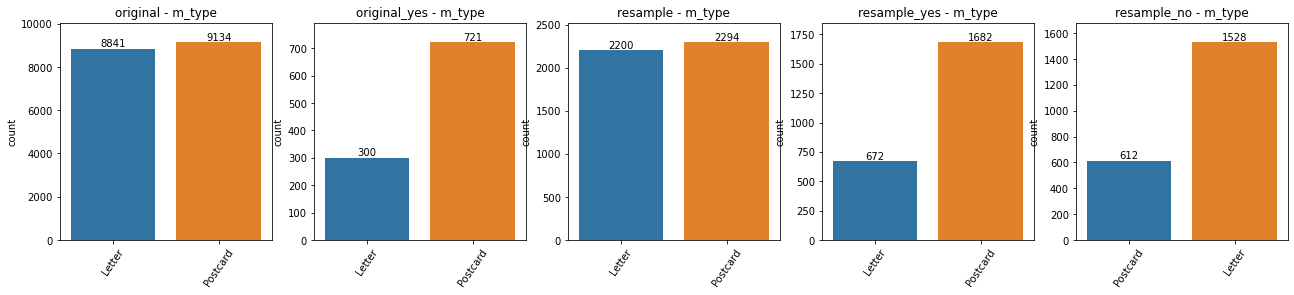

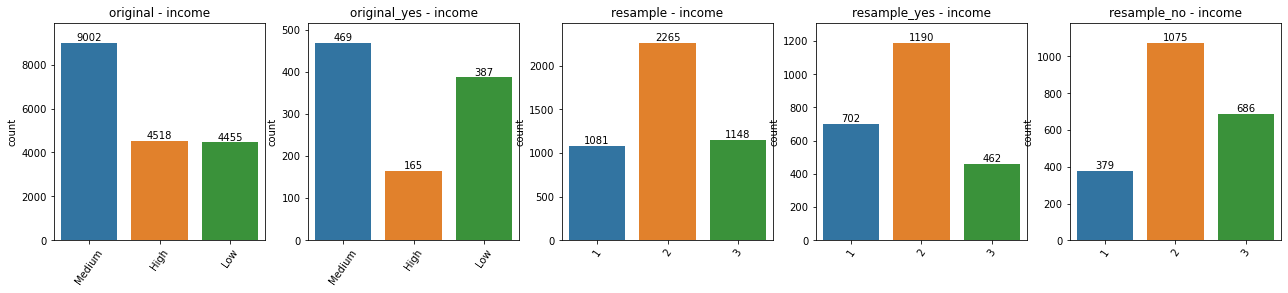

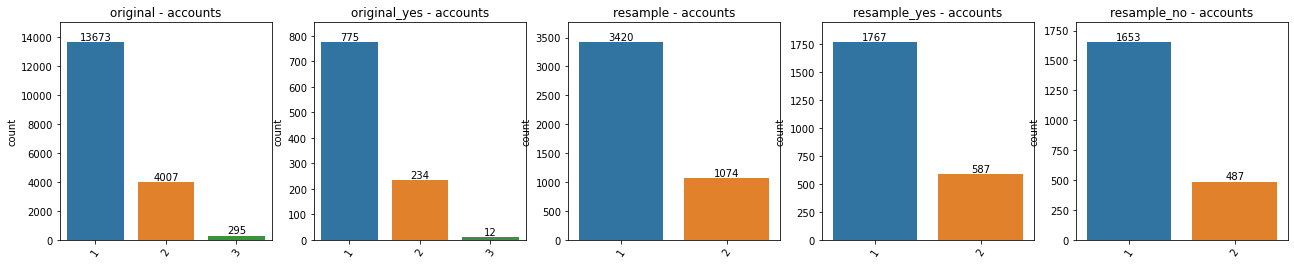

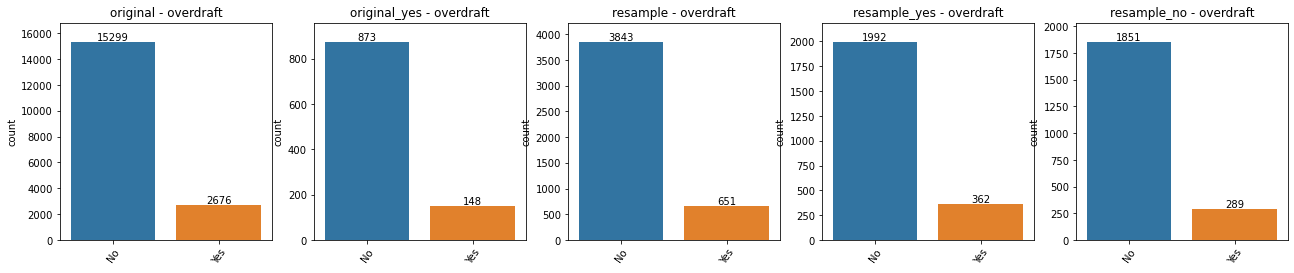

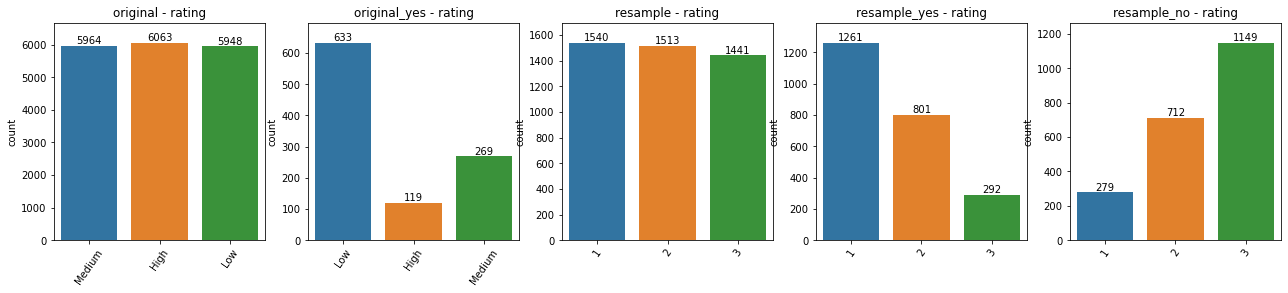

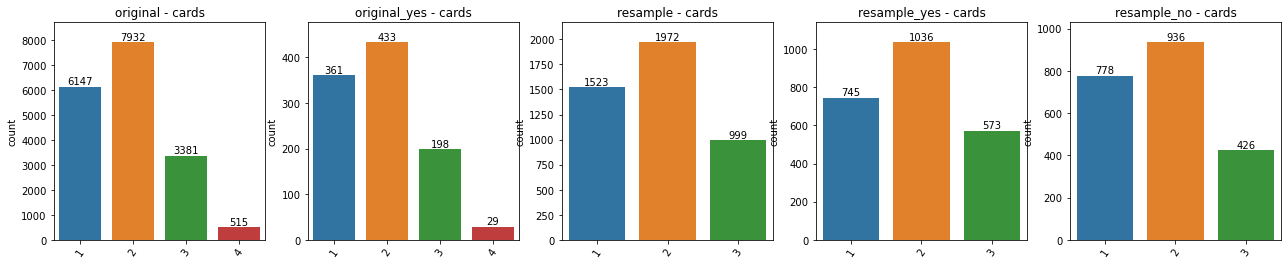

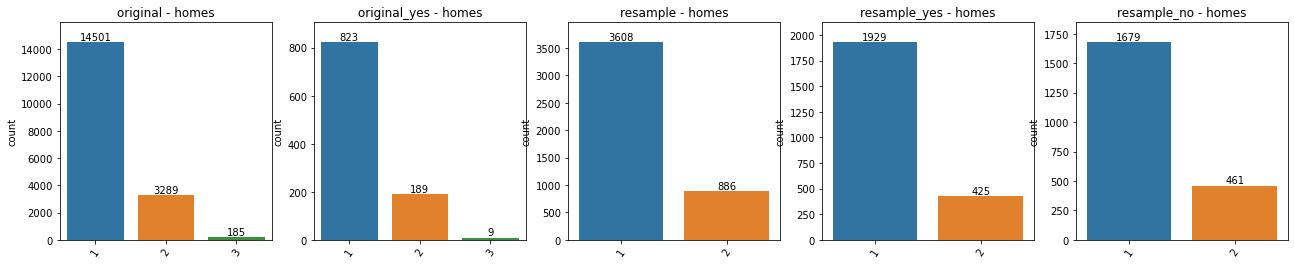

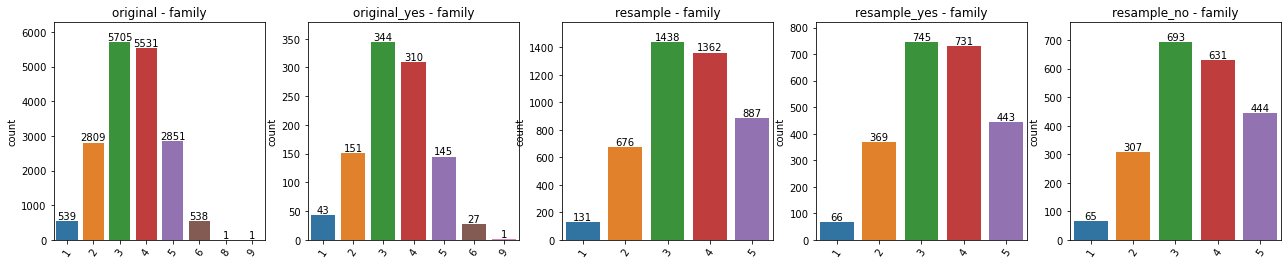

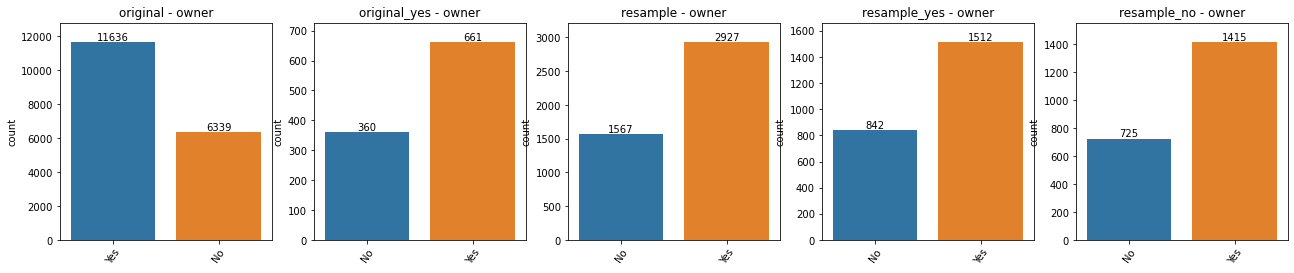

In [176]:
plotCompareResample(disc, results_disc, 'accept', pos_label = 'Yes')

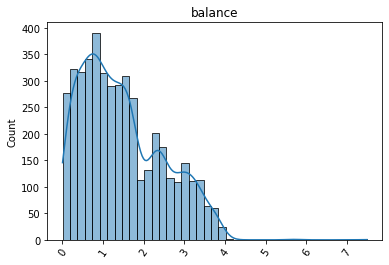

In [180]:
plotContinuous(results_cont.drop(columns='index'))

# Record models

# Funtions' summary

In [ ]:
def independencyTest(df,target,alpha=0.05):
    """Checks if the nominal categorical variables are related (reject the null hypothesis) or are indepedent 
    (accept the null hypothesis) to the target (response) variable.
    Inputs:
        df - nominal variables dataframe (the target is the first column)
        target - dependent variable
    Outputs:
        chi2_data - dataframe with the results of the chi2 test
        related_categories - a list of the categories related to the target
        independent_categories - a list of the categories without relation to the target"""
    
    chi2_data = {'nominal':[],'test_result':[], 'significance':[], 'chi2_st':[]}
    related_categories = []
    independent_categories = []

    for c in df.iloc[:,1:].columns:
        p_value = chi2_contingency(pd.crosstab(df[target], df[c]))[1]
        chi2 = chi2_contingency(pd.crosstab(df[target], df[c]))[0]

        chi2_data['nominal'].append(c)
        chi2_data['significance'].append(p_value)
        chi2_data['chi2_st'].append(chi2)

        if p_value <= 0.05:        
            chi2_data['test_result'].append('Reject Null Hypothesis')
            related_categories.append(c)

        else:
            chi2_data['test_result'].append('Fail to Reject Null Hypothesis')
            independent_categories.append(c)

    chi2_data = pd.DataFrame(chi2_data)
    
    return related_categories, independent_categories, chi2_data
    

In [ ]:
def plotCompareDiscrete(disc, sub_disc):
    """Compare the distributions of classes of two dataframes with the same discrete variables"""
    
    for i,c in enumerate(disc.columns):
        f, ax = plt.subplots(1,2, figsize=(12,5))
        sns.countplot(x=c,data=disc, ax=ax[0])
        sns.countplot(x=c,data=sub_disc,ax=ax[1])


        ax[0].set_title('original_%s' %(c))
        ax[0].set_xlabel(None)
        ax[0].tick_params(axis='x', labelrotation=55)

        ax[1].set_title('compared_%s' %(c))
        ax[1].set_xlabel(None)
        ax[1].tick_params(axis='x', labelrotation=55)

            # annotate
        ax[0].bar_label(ax[0].containers[0], label_type='edge')
        ax[1].bar_label(ax[1].containers[0], label_type='edge')

            # pad the spacing between the number and the edge of the figure
        ax[0].margins(y=0.1)
        ax[1].margins(y=0.1)


        plt.show()


In [ ]:
def evaluateLogistic(X_train, X_test, y_train, y_test, pos_label = 'Yes', class_weight=None):
    """Creates a Logistic Regression and evaluates it
    Inputs:
        preprocessed data
        positive label for the metrics
    returns:
        lr - fitted logistic regression"""
    
    # Create the model and predition
    lr = LogisticRegression(max_iter=1000, random_state=0, class_weight=class_weight)
    lr.fit(X_train, y_train)
    y_pred_train = lr.predict(X_train)
    y_pred_test = lr.predict(X_test)
    
    # Compute train score
    train_score = lr.score(X_train,y_train)
    
    # Print the Train Metrics
    print("The accuracy in the TRAIN set is: {:.1f}".format(100*train_score))
    print("The precision in the TRAIN set is: {:.2f}".format(100*precision_score(y_train,y_pred_train, pos_label = pos_label)))
    print("The recall in the TRAIN set is: {:.2f}".format(100*recall_score(y_train,y_pred_train, pos_label = pos_label)))
    print("The F1 in the TRAIN set is: {:.2f}".format(100*f1_score(y_train,y_pred_train, pos_label = pos_label)))
    print("The Kappa in the TRAIN set is: {:.2f}".format(100*cohen_kappa_score(y_train,y_pred_train)))
    
    # Print the Test Metrics
    print()
    print("The accuracy in the TEST set is: {:.2f}".format(100*accuracy_score(y_test,y_pred_test)))
    print("The precision in the TEST set is: {:.2f}".format(100*precision_score(y_test,y_pred_test, pos_label = pos_label)))
    print("The recall in the TEST set is: {:.2f}".format(100*recall_score(y_test,y_pred_test, pos_label = pos_label)))
    print("The F1 in the TEST set is: {:.2f}".format(100*f1_score(y_test,y_pred_test, pos_label = pos_label)))
    print("The Kappa in the TEST set is: {:.2f}".format(100*cohen_kappa_score(y_test,y_pred_test)))
    
    # Display the two confussion matrices
    f, ax = plt.subplots(1,2, figsize=(12,5))
    cm_train = confusion_matrix(y_train,y_pred_train)
    cm_test = confusion_matrix(y_test,y_pred_test)
    disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=lr.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=lr.classes_)
    disp_train.plot(ax = ax[0])
    disp_train.ax_.set_title('Train')
    disp.plot(ax = ax[1])
    disp.ax_.set_title('Test')
    disp.ax_.set_ylabel(None)
    plt.show()

    
    return lr
    
    

In [ ]:
def plotCompareResample(disc, resample, target, pos_label = 'Yes'):
    """Plot a comparision among the original categorical variables with the resampled
    dataframe and the subsets of the resample with positve and non positive label"""

    disc_pos = disc[disc[target] == pos_label]
    
    resample_pos = resample[resample[target] == pos_label]
    resample_neg = resample[resample[target] != pos_label]


    for i,c in enumerate(disc.columns):
            f, ax = plt.subplots(1,5, figsize=(22,4))

            sns.countplot(x=c,data=disc, ax=ax[0])
            sns.countplot(x=c,data=disc_pos, ax=ax[1])
            sns.countplot(x=c,data=resample,ax=ax[2])
            sns.countplot(x=c,data=resample_pos,ax=ax[3])
            sns.countplot(x=c,data=resample_neg,ax=ax[4])


            ax[0].set_title('original - %s' %(c))
            ax[0].set_xlabel(None)
            ax[0].tick_params(axis='x', labelrotation=55)
            
            ax[1].set_title('original_yes - %s' %(c))
            ax[1].set_xlabel(None)
            ax[1].tick_params(axis='x', labelrotation=55)

            ax[2].set_title('resample - %s' %(c))
            ax[2].set_xlabel(None)
            ax[2].tick_params(axis='x', labelrotation=55)

            ax[3].set_title('resample_yes - %s' %(c))
            ax[3].set_xlabel(None)
            ax[3].tick_params(axis='x', labelrotation=55)

            ax[4].set_title('resample_no - %s' %(c))
            ax[4].set_xlabel(None)
            ax[4].tick_params(axis='x', labelrotation=55)

                # annotate
            ax[0].bar_label(ax[0].containers[0], label_type='edge')
            ax[1].bar_label(ax[1].containers[0], label_type='edge')
            ax[2].bar_label(ax[2].containers[0], label_type='edge')
            ax[3].bar_label(ax[3].containers[0], label_type='edge')
            ax[4].bar_label(ax[4].containers[0], label_type='edge')

                # pad the spacing between the number and the edge of the figure
            ax[0].margins(y=0.1)
            ax[1].margins(y=0.1)
            ax[2].margins(y=0.1)
            ax[3].margins(y=0.1)
            ax[4].margins(y=0.1)


            plt.show()

    return None

In [ ]:
def classifierMetrics(cls, y_train_p, y_test_p, y_pred_train_cls, y_pred_test_cls, pos_label='Yes'):
    """plots the metrics of a classifier model"""
    
    # Print the Train Metrics
    train_precision_cls = 100*precision_score(y_train_p,y_pred_train_cls, pos_label = pos_label)
    train_recall_cls = 100*recall_score(y_train_p,y_pred_train_cls, pos_label = pos_label)
    train_f1_cls = 100*f1_score(y_train_p,y_pred_train_cls, pos_label = pos_label)
    train_kappa_cls = 100*cohen_kappa_score(y_train_p,y_pred_train_cls)
    print("The accuracy in the TRAIN set is: {:.1f}".format(100*train_score_cls))
    print("The precision in the TRAIN set is: {:.2f}".format(train_precision_cls))
    print("The recall in the TRAIN set is: {:.2f}".format(train_recall_cls))
    print("The F1 in the TRAIN set is: {:.2f}".format(train_f1_cls))
    print("The Kappa in the TRAIN set is: {:.2f}".format(train_kappa_cls))

    # Print the Test Metrics
    print()
    test_score_cls = 100*accuracy_score(y_test_p,y_pred_test_cls)
    test_precision_cls = 100*precision_score(y_test_p,y_pred_test_cls, pos_label = pos_label)
    test_recall_cls = 100*recall_score(y_test_p,y_pred_test_cls, pos_label = pos_label)
    test_f1_cls = 100*f1_score(y_test_p,y_pred_test_cls, pos_label = pos_label)
    test_kappa_cls = 100*cohen_kappa_score(y_test_p,y_pred_test_cls)
    print("The accuracy in the TEST set is: {:.2f}".format(test_score_cls))
    print("The precision in the TEST set is: {:.2f}".format(test_precision_cls))
    print("The recall in the TEST set is: {:.2f}".format(test_recall_cls))
    print("The F1 in the TEST set is: {:.2f}".format(test_f1_cls))
    print("The Kappa in the TEST set is: {:.2f}".format(test_kappa_cls))


    # Display the two confussion matrices
    f, ax = plt.subplots(1,2, figsize=(12,5))
    cm_train_cls = confusion_matrix(y_train_p,y_pred_train_cls)
    cm_test_cls = confusion_matrix(y_test_p,y_pred_test_cls)
    disp_train_cls = ConfusionMatrixDisplay(confusion_matrix=cm_train_cls, display_labels=cls.classes_)
    disp_cls = ConfusionMatrixDisplay(confusion_matrix=cm_test_cls, display_labels=cls.classes_)
    disp_train_cls.plot(ax = ax[0])
    disp_train_cls.ax_.set_title('Train')
    disp_cls.plot(ax = ax[1])
    disp_cls.ax_.set_title('Test')
    disp_cls.ax_.set_ylabel(None)
    plt.show()
    

In [ ]:
def preprocess(X_train, X_test, y_train, y_test, drop_feat=[], add_feat=[], categories = 'auto'):
    """Based on processData.Preprocess Data after resampling.
    Inputs: 
        X_train, X_test, y_train, y_test
        drop_feat: list of features to be dropped
        add_feat: (time-like feature to be merged after logTransform and normalize)
        categories
    Sub-functions:
        numericCategorical
        removeOutliers
        logTransform
        normalize
        encodeCategoricals
    Returns: 
        X_train (without outliers) (normalized, encoded and scaled) 
        X_test (normalized, encoded and scaled)
        y_train (without outliers)
        y_test
    """
    
    # Train test split
    #X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)
    
    
    # Drop some features
    if len(drop_feat)>0:
        X_train.drop(columns=drop_feat, inplace=True, errors='ignore')
        X_test.drop(columns=drop_feat, inplace=True, errors='ignore')
    
    # Split X_train and X_test into continuous and categorical
    X_train_continuous, X_train_categorical = numericCategorical(X_train)
    X_test_continuous, X_test_categorical = numericCategorical(X_test)
    
    # Remove outliers from train set (reduce skewness - logTransform)
    #X_train_continuous, X_train_categorical, y_train = removeOutliers(X_train_continuous, X_train_categorical, y_train)
    
    # LogTransform X_test
    X_train_continuous = logTransform(X_train_continuous) # !!! This transformation was include in removeOutliers
    X_test_continuous = logTransform(X_test_continuous)
    
    # Normalize continuos train and test
    X_train_continuous = normalize(X_train_continuous)
    X_test_continuous = normalize(X_test_continuous)
    
    
    # Encode X_train_categorical
    X_train_categorical = encodeCategoricals(X_train_categorical, fit=True, categories=categories)
    # Encode X_test_categorical
    X_test_categorical = encodeCategoricals(X_test_categorical)
    
    
    # Concat continuous and categorical
    X_train = pd.concat([X_train_continuous,X_train_categorical], axis=1)
    X_test = pd.concat([X_test_continuous,X_test_categorical], axis=1)
    
    # Merge Additional Features
    if len(add_feat)>0:
        X_train = pd.merge(X_train, add_feat,how='left',left_index=True, right_index=True)
        X_test = pd.merge(X_test, add_feat, how='left',left_index=True, right_index=True)
    
    # MinMax Scale
    scaler = MinMaxScaler()
    scaler.fit(X_train)
    features = scaler.get_feature_names_out()
    X_train = scaler.transform(X_train)
    X_train = pd.DataFrame(X_train, columns=features)
    X_test = scaler.transform(X_test)
    X_test = pd.DataFrame(X_test, columns = features)
    
    return X_train, X_test, y_train, y_test
    

In [118]:
def elbowClassifier(X_train, X_test, y_train, y_test, weights, metrics):
    """Elbow test for Classfier
    Inputs: 
        weights: possible distances for the KNN classifier: 'uniform' (default), 'distance'
        metrics: metric to be displayed in y axis: 'precision', 'recal', 'accuracy'
        """
    
    knn_models = []
    scores = []
    
    for k in range(2,15):
        cls = KNeighborsClassifier(n_neighbors=k, weights = weights)
        # print("Training the k-NN model with {} neihgbours...".format(k))
        cls.fit(X_train, y_train)
        y_pred_test = cls.predict(X_test)
        #knn_models.append(cls)

        if metrics.lower() == 'precision':
            test_precision = 100*precision_score(y_test,y_pred_test, pos_label = 'Yes')
            scores.append(test_precision)
            
        elif metrics.lower() == 'recall':
            test_recall = 100*recall_score(y_test,y_pred_test, pos_label = 'Yes')
            scores.append(test_recall)
            
        else: # Accuracy
            scores.append(cls.score(X_test, y_test))
        #print()
    
    
    plt.figure(figsize=(10,6))
    plt.plot(range(2,15),scores,color = 'blue', linestyle='dashed',
             marker='o', markerfacecolor='red', markersize=10)
    plt.title('%s vs. K Value' %(metrics))
    plt.xticks(range(1,16))
    plt.gca().invert_yaxis()
    plt.xlabel('K')
    # plt.ylabel('Accuracy')
    # plt.ylabel('Precision')
    plt.ylabel('Recall')
    plt.show()
    

# End